In [3]:
!nvidia-smi

Wed Feb 16 01:39:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   29C    P8    21W / 310W |   3255MiB /  7979MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [4]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [5]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)

In [6]:
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [7]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,1,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,1,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [8]:
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])

In [9]:
df.head()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,1,12,4.605299e+10,1.948099e+10,30.0,1.701630e+11,1.599950e+11,41389198,46.109810,9954.009766,3416326.0,7657
1,1,36,2.284420e+11,1.948099e+10,0.0,1.329190e+12,1.208850e+12,24601860,80.223690,8329.652344,438747025.0,5294788
2,1,40,1.664750e+11,1.948099e+10,0.0,4.172380e+11,3.955690e+11,8797566,78.856460,8289.029297,453206357.0,335818
3,1,56,4.064120e+11,1.948099e+10,0.0,5.026980e+11,4.757400e+11,11375158,72.409200,8722.114258,706524512.0,173709
4,1,76,1.507490e+11,1.948099e+10,18.0,2.062830e+12,1.795700e+12,207833831,55.382403,18364.505860,31329648.0,122850


<AxesSubplot:>

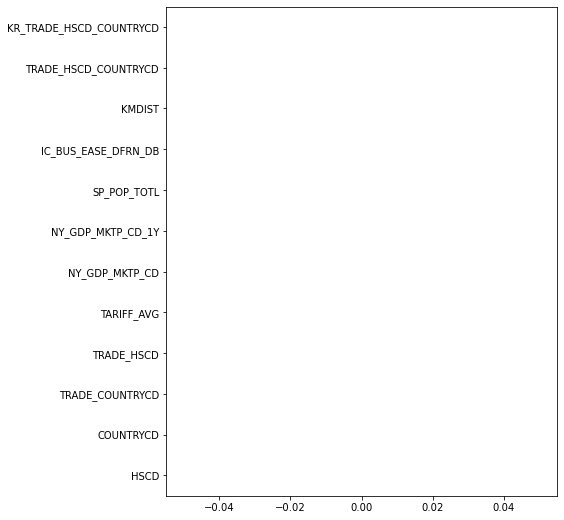

In [10]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [11]:
df.shape


(20713, 12)

In [12]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
2        0.074098
3        0.024586
4        0.392121
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 20713, dtype: float64

In [13]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,12,4.605299e+10,1.948099e+10,30.0,1.701630e+11,1.599950e+11,41389198,46.109810,9954.009766,3416326.0,7657,0.007418,0.017537,106.355199,0.224130
1,1,36,2.284420e+11,1.948099e+10,0.0,1.329190e+12,1.208850e+12,24601860,80.223690,8329.652344,438747025.0,5294788,0.192061,2.252181,109.954916,1.206797
2,1,40,1.664750e+11,1.948099e+10,0.0,4.172380e+11,3.955690e+11,8797566,78.856460,8289.029297,453206357.0,335818,0.272237,2.326404,105.477932,0.074098
3,1,56,4.064120e+11,1.948099e+10,0.0,5.026980e+11,4.757400e+11,11375158,72.409200,8722.114258,706524512.0,173709,0.173844,3.626739,105.666541,0.024586
4,1,76,1.507490e+11,1.948099e+10,18.0,2.062830e+12,1.795700e+12,207833831,55.382403,18364.505860,31329648.0,122850,0.020783,0.160822,114.876093,0.392121


In [14]:
df['KMDIST'] = df['KMDIST']/100
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,12,30.0,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,36,0.0,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
2,1,40,0.0,78.856460,82.890293,0.272237,2.326404,105.477932,0.074098
3,1,56,0.0,72.409200,87.221143,0.173844,3.626739,105.666541,0.024586
4,1,76,18.0,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121


In [16]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,0.30,0.461098,0.995401,0.007418,0.017537,1.063552,0.224130
1,1,2,0.00,0.802237,0.832965,0.192061,2.252181,1.099549,1.206797
2,1,3,0.00,0.788565,0.828903,0.272237,2.326404,1.054779,0.074098
3,1,4,0.00,0.724092,0.872211,0.173844,3.626739,1.056665,0.024586
4,1,5,0.18,0.553824,1.836451,0.020783,0.160822,1.148761,0.392121


In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(20713, 9)
12427 4143 4143


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
len(df)

20713

In [21]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([16570, 8])
torch.Size([16570, 1])


In [22]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = F.relu(self.bn2(self.layer2(x)))
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(8, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [210]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-3)

In [211]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/259  cost : 259.15966796875
Ep 0/100  Batch 2/259  cost : 56.163726806640625
Ep 0/100  Batch 3/259  cost : 588.9022827148438
Ep 0/100  Batch 4/259  cost : 430.5666198730469
Ep 0/100  Batch 5/259  cost : 98.97992706298828
Ep 0/100  Batch 6/259  cost : 114.12080383300781
Ep 0/100  Batch 7/259  cost : 113.39867401123047
Ep 0/100  Batch 8/259  cost : 11.666927337646484
Ep 0/100  Batch 9/259  cost : 87.65534210205078
Ep 0/100  Batch 10/259  cost : 114.6416015625
Ep 0/100  Batch 11/259  cost : 197.03565979003906
Ep 0/100  Batch 12/259  cost : 221.48487854003906
Ep 0/100  Batch 13/259  cost : 120.22193145751953
Ep 0/100  Batch 14/259  cost : 47.15306854248047
Ep 0/100  Batch 15/259  cost : 489.191162109375
Ep 0/100  Batch 16/259  cost : 151.2628631591797
Ep 0/100  Batch 17/259  cost : 93.6288833618164
Ep 0/100  Batch 18/259  cost : 41.13469314575195
Ep 0/100  Batch 19/259  cost : 343.8835144042969
Ep 0/100  Batch 20/259  cost : 52.318328857421875
Ep 0/100  Batch 21/259  cost

Ep 0/100  Batch 242/259  cost : 390.80755615234375
Ep 0/100  Batch 243/259  cost : 94367.5546875
Ep 0/100  Batch 244/259  cost : 79.02806091308594
Ep 0/100  Batch 245/259  cost : 12.859798431396484
Ep 0/100  Batch 246/259  cost : 46.50572204589844
Ep 0/100  Batch 247/259  cost : 28.94216537475586
Ep 0/100  Batch 248/259  cost : 175.89019775390625
Ep 0/100  Batch 249/259  cost : 1305.030029296875
Ep 0/100  Batch 250/259  cost : 2369.9453125
Ep 0/100  Batch 251/259  cost : 173.93817138671875
Ep 0/100  Batch 252/259  cost : 68.12380981445312
Ep 0/100  Batch 253/259  cost : 14.169631958007812
Ep 0/100  Batch 254/259  cost : 117.669921875
Ep 0/100  Batch 255/259  cost : 29.004940032958984
Ep 0/100  Batch 256/259  cost : 43.61396789550781
Ep 0/100  Batch 257/259  cost : 27.45184326171875
Ep 0/100  Batch 258/259  cost : 222.77125549316406
Ep 0/100  Batch 259/259  cost : 59.550838470458984
Ep 1/100  Batch 1/259  cost : 29.680904388427734
Ep 1/100  Batch 2/259  cost : 305.1920166015625
Ep 1/100

Ep 1/100  Batch 226/259  cost : 67.08650207519531
Ep 1/100  Batch 227/259  cost : 60.15394973754883
Ep 1/100  Batch 228/259  cost : 48.53933334350586
Ep 1/100  Batch 229/259  cost : 198.86495971679688
Ep 1/100  Batch 230/259  cost : 88.4239273071289
Ep 1/100  Batch 231/259  cost : 91.60672760009766
Ep 1/100  Batch 232/259  cost : 304.17706298828125
Ep 1/100  Batch 233/259  cost : 34.59958267211914
Ep 1/100  Batch 234/259  cost : 45.12520980834961
Ep 1/100  Batch 235/259  cost : 438.38092041015625
Ep 1/100  Batch 236/259  cost : 76.60157775878906
Ep 1/100  Batch 237/259  cost : 136.48104858398438
Ep 1/100  Batch 238/259  cost : 118.2227783203125
Ep 1/100  Batch 239/259  cost : 70.88333129882812
Ep 1/100  Batch 240/259  cost : 62.98004913330078
Ep 1/100  Batch 241/259  cost : 85.79076385498047
Ep 1/100  Batch 242/259  cost : 57.90290832519531
Ep 1/100  Batch 243/259  cost : 514.7053833007812
Ep 1/100  Batch 244/259  cost : 75.70024108886719
Ep 1/100  Batch 245/259  cost : 149.96556091308

Ep 2/100  Batch 193/259  cost : 35.347320556640625
Ep 2/100  Batch 194/259  cost : 55.1034049987793
Ep 2/100  Batch 195/259  cost : 124.38552856445312
Ep 2/100  Batch 196/259  cost : 129.8731689453125
Ep 2/100  Batch 197/259  cost : 52.674346923828125
Ep 2/100  Batch 198/259  cost : 29.244916915893555
Ep 2/100  Batch 199/259  cost : 14949.23828125
Ep 2/100  Batch 200/259  cost : 52.357505798339844
Ep 2/100  Batch 201/259  cost : 46.469810485839844
Ep 2/100  Batch 202/259  cost : 72.32616424560547
Ep 2/100  Batch 203/259  cost : 64.55717468261719
Ep 2/100  Batch 204/259  cost : 1268.516357421875
Ep 2/100  Batch 205/259  cost : 64.08613586425781
Ep 2/100  Batch 206/259  cost : 65.93997955322266
Ep 2/100  Batch 207/259  cost : 261.83349609375
Ep 2/100  Batch 208/259  cost : 89.67235565185547
Ep 2/100  Batch 209/259  cost : 242.0303497314453
Ep 2/100  Batch 210/259  cost : 111.16716003417969
Ep 2/100  Batch 211/259  cost : 189.20437622070312
Ep 2/100  Batch 212/259  cost : 52.6228561401367

Ep 3/100  Batch 168/259  cost : 418.2134094238281
Ep 3/100  Batch 169/259  cost : 37.718509674072266
Ep 3/100  Batch 170/259  cost : 949.3313598632812
Ep 3/100  Batch 171/259  cost : 32.192359924316406
Ep 3/100  Batch 172/259  cost : 43.12031555175781
Ep 3/100  Batch 173/259  cost : 91.30656433105469
Ep 3/100  Batch 174/259  cost : 303.4708251953125
Ep 3/100  Batch 175/259  cost : 37.65708541870117
Ep 3/100  Batch 176/259  cost : 41.35628128051758
Ep 3/100  Batch 177/259  cost : 135.9340057373047
Ep 3/100  Batch 178/259  cost : 152.06707763671875
Ep 3/100  Batch 179/259  cost : 182.28884887695312
Ep 3/100  Batch 180/259  cost : 38.392730712890625
Ep 3/100  Batch 181/259  cost : 63.10402297973633
Ep 3/100  Batch 182/259  cost : 37.68463134765625
Ep 3/100  Batch 183/259  cost : 88.25057983398438
Ep 3/100  Batch 184/259  cost : 119.73819732666016
Ep 3/100  Batch 185/259  cost : 219.38951110839844
Ep 3/100  Batch 186/259  cost : 16.982227325439453
Ep 3/100  Batch 187/259  cost : 28.8875942

Ep 4/100  Batch 142/259  cost : 38.197845458984375
Ep 4/100  Batch 143/259  cost : 73.33196258544922
Ep 4/100  Batch 144/259  cost : 323.1544494628906
Ep 4/100  Batch 145/259  cost : 232.49911499023438
Ep 4/100  Batch 146/259  cost : 615.484375
Ep 4/100  Batch 147/259  cost : 68.50434112548828
Ep 4/100  Batch 148/259  cost : 67.54824829101562
Ep 4/100  Batch 149/259  cost : 4369.2099609375
Ep 4/100  Batch 150/259  cost : 48.012245178222656
Ep 4/100  Batch 151/259  cost : 38.198822021484375
Ep 4/100  Batch 152/259  cost : 38.682899475097656
Ep 4/100  Batch 153/259  cost : 140.41197204589844
Ep 4/100  Batch 154/259  cost : 273.8494873046875
Ep 4/100  Batch 155/259  cost : 414.0038757324219
Ep 4/100  Batch 156/259  cost : 509.7357482910156
Ep 4/100  Batch 157/259  cost : 447.4068908691406
Ep 4/100  Batch 158/259  cost : 39.332542419433594
Ep 4/100  Batch 159/259  cost : 50.495445251464844
Ep 4/100  Batch 160/259  cost : 75.64170837402344
Ep 4/100  Batch 161/259  cost : 115.73860168457031


Ep 5/100  Batch 114/259  cost : 68.86801147460938
Ep 5/100  Batch 115/259  cost : 109.74900817871094
Ep 5/100  Batch 116/259  cost : 57.56499099731445
Ep 5/100  Batch 117/259  cost : 35.291748046875
Ep 5/100  Batch 118/259  cost : 36.78657913208008
Ep 5/100  Batch 119/259  cost : 23.946308135986328
Ep 5/100  Batch 120/259  cost : 25.297225952148438
Ep 5/100  Batch 121/259  cost : 82.73841857910156
Ep 5/100  Batch 122/259  cost : 1855.513671875
Ep 5/100  Batch 123/259  cost : 32.39973831176758
Ep 5/100  Batch 124/259  cost : 69.85735321044922
Ep 5/100  Batch 125/259  cost : 56.55736541748047
Ep 5/100  Batch 126/259  cost : 75.66857147216797
Ep 5/100  Batch 127/259  cost : 32.42653274536133
Ep 5/100  Batch 128/259  cost : 25.58194923400879
Ep 5/100  Batch 129/259  cost : 86.78785705566406
Ep 5/100  Batch 130/259  cost : 36.48575973510742
Ep 5/100  Batch 131/259  cost : 18.73792266845703
Ep 5/100  Batch 132/259  cost : 41.19660568237305
Ep 5/100  Batch 133/259  cost : 167.21795654296875
E

Ep 6/100  Batch 91/259  cost : 5725.8916015625
Ep 6/100  Batch 92/259  cost : 57.85121154785156
Ep 6/100  Batch 93/259  cost : 42.29679870605469
Ep 6/100  Batch 94/259  cost : 25.401107788085938
Ep 6/100  Batch 95/259  cost : 241.5011444091797
Ep 6/100  Batch 96/259  cost : 94051.0390625
Ep 6/100  Batch 97/259  cost : 70.36100769042969
Ep 6/100  Batch 98/259  cost : 43.97711944580078
Ep 6/100  Batch 99/259  cost : 52.97590637207031
Ep 6/100  Batch 100/259  cost : 25.866321563720703
Ep 6/100  Batch 101/259  cost : 87.99081420898438
Ep 6/100  Batch 102/259  cost : 26.55015754699707
Ep 6/100  Batch 103/259  cost : 87.39325714111328
Ep 6/100  Batch 104/259  cost : 1805.4429931640625
Ep 6/100  Batch 105/259  cost : 30.786666870117188
Ep 6/100  Batch 106/259  cost : 67.23036193847656
Ep 6/100  Batch 107/259  cost : 114.02572631835938
Ep 6/100  Batch 108/259  cost : 52.389984130859375
Ep 6/100  Batch 109/259  cost : 55.26715087890625
Ep 6/100  Batch 110/259  cost : 71.3091049194336
Ep 6/100  

Ep 7/100  Batch 67/259  cost : 51.5526237487793
Ep 7/100  Batch 68/259  cost : 68.50755310058594
Ep 7/100  Batch 69/259  cost : 134.38946533203125
Ep 7/100  Batch 70/259  cost : 264.544921875
Ep 7/100  Batch 71/259  cost : 238.36819458007812
Ep 7/100  Batch 72/259  cost : 195.72067260742188
Ep 7/100  Batch 73/259  cost : 74.657958984375
Ep 7/100  Batch 74/259  cost : 80.57384490966797
Ep 7/100  Batch 75/259  cost : 181.227783203125
Ep 7/100  Batch 76/259  cost : 251.19729614257812
Ep 7/100  Batch 77/259  cost : 81.88931274414062
Ep 7/100  Batch 78/259  cost : 30.441207885742188
Ep 7/100  Batch 79/259  cost : 193.4032440185547
Ep 7/100  Batch 80/259  cost : 89.01988983154297
Ep 7/100  Batch 81/259  cost : 85.66510009765625
Ep 7/100  Batch 82/259  cost : 109.6004867553711
Ep 7/100  Batch 83/259  cost : 422.6623229980469
Ep 7/100  Batch 84/259  cost : 64.34503173828125
Ep 7/100  Batch 85/259  cost : 241.35543823242188
Ep 7/100  Batch 86/259  cost : 32.66712951660156
Ep 7/100  Batch 87/259

Ep 8/100  Batch 52/259  cost : 53.28019714355469
Ep 8/100  Batch 53/259  cost : 171.58258056640625
Ep 8/100  Batch 54/259  cost : 287.65545654296875
Ep 8/100  Batch 55/259  cost : 123.60139465332031
Ep 8/100  Batch 56/259  cost : 1529.432373046875
Ep 8/100  Batch 57/259  cost : 122.76994323730469
Ep 8/100  Batch 58/259  cost : 44.02500915527344
Ep 8/100  Batch 59/259  cost : 1101.6484375
Ep 8/100  Batch 60/259  cost : 33.77696228027344
Ep 8/100  Batch 61/259  cost : 521.5274658203125
Ep 8/100  Batch 62/259  cost : 27.111095428466797
Ep 8/100  Batch 63/259  cost : 297.1695556640625
Ep 8/100  Batch 64/259  cost : 89.08611297607422
Ep 8/100  Batch 65/259  cost : 78.2878189086914
Ep 8/100  Batch 66/259  cost : 146.1348114013672
Ep 8/100  Batch 67/259  cost : 21.47395896911621
Ep 8/100  Batch 68/259  cost : 55.508522033691406
Ep 8/100  Batch 69/259  cost : 40.998374938964844
Ep 8/100  Batch 70/259  cost : 27.32855796813965
Ep 8/100  Batch 71/259  cost : 45.78712463378906
Ep 8/100  Batch 72/

Ep 9/100  Batch 34/259  cost : 94196.8828125
Ep 9/100  Batch 35/259  cost : 59.471397399902344
Ep 9/100  Batch 36/259  cost : 297.55499267578125
Ep 9/100  Batch 37/259  cost : 44.888221740722656
Ep 9/100  Batch 38/259  cost : 211.42718505859375
Ep 9/100  Batch 39/259  cost : 263.3155517578125
Ep 9/100  Batch 40/259  cost : 43.25591278076172
Ep 9/100  Batch 41/259  cost : 94.1640396118164
Ep 9/100  Batch 42/259  cost : 31.07254409790039
Ep 9/100  Batch 43/259  cost : 35.04911804199219
Ep 9/100  Batch 44/259  cost : 204.15130615234375
Ep 9/100  Batch 45/259  cost : 79.23617553710938
Ep 9/100  Batch 46/259  cost : 74.32744598388672
Ep 9/100  Batch 47/259  cost : 33.76642990112305
Ep 9/100  Batch 48/259  cost : 340.0303039550781
Ep 9/100  Batch 49/259  cost : 76.75720977783203
Ep 9/100  Batch 50/259  cost : 67.2184829711914
Ep 9/100  Batch 51/259  cost : 30.268844604492188
Ep 9/100  Batch 52/259  cost : 338.2406311035156
Ep 9/100  Batch 53/259  cost : 1462.4381103515625
Ep 9/100  Batch 54/

Ep 10/100  Batch 18/259  cost : 102.1467514038086
Ep 10/100  Batch 19/259  cost : 124.40031433105469
Ep 10/100  Batch 20/259  cost : 77.0899658203125
Ep 10/100  Batch 21/259  cost : 550.4998168945312
Ep 10/100  Batch 22/259  cost : 78.76068878173828
Ep 10/100  Batch 23/259  cost : 177.96133422851562
Ep 10/100  Batch 24/259  cost : 128.6509552001953
Ep 10/100  Batch 25/259  cost : 61.90650939941406
Ep 10/100  Batch 26/259  cost : 58.88936996459961
Ep 10/100  Batch 27/259  cost : 38.58442306518555
Ep 10/100  Batch 28/259  cost : 118.34013366699219
Ep 10/100  Batch 29/259  cost : 25.476205825805664
Ep 10/100  Batch 30/259  cost : 27.724348068237305
Ep 10/100  Batch 31/259  cost : 148.0380401611328
Ep 10/100  Batch 32/259  cost : 22.856996536254883
Ep 10/100  Batch 33/259  cost : 173.79759216308594
Ep 10/100  Batch 34/259  cost : 94.11347198486328
Ep 10/100  Batch 35/259  cost : 77.24595642089844
Ep 10/100  Batch 36/259  cost : 70.13390350341797
Ep 10/100  Batch 37/259  cost : 89.443313598

Ep 10/100  Batch 182/259  cost : 38.0879020690918
Ep 10/100  Batch 183/259  cost : 222.36607360839844
Ep 10/100  Batch 184/259  cost : 50.968772888183594
Ep 10/100  Batch 185/259  cost : 44.243873596191406
Ep 10/100  Batch 186/259  cost : 243.69126892089844
Ep 10/100  Batch 187/259  cost : 320.148193359375
Ep 10/100  Batch 188/259  cost : 22.149656295776367
Ep 10/100  Batch 189/259  cost : 73.71887969970703
Ep 10/100  Batch 190/259  cost : 29.453636169433594
Ep 10/100  Batch 191/259  cost : 54.728179931640625
Ep 10/100  Batch 192/259  cost : 60.297996520996094
Ep 10/100  Batch 193/259  cost : 28.244731903076172
Ep 10/100  Batch 194/259  cost : 86.54676818847656
Ep 10/100  Batch 195/259  cost : 18981.095703125
Ep 10/100  Batch 196/259  cost : 68.0132827758789
Ep 10/100  Batch 197/259  cost : 28.07834243774414
Ep 10/100  Batch 198/259  cost : 1032.0489501953125
Ep 10/100  Batch 199/259  cost : 35.644927978515625
Ep 10/100  Batch 200/259  cost : 240.4387969970703
Ep 10/100  Batch 201/259 

Ep 11/100  Batch 161/259  cost : 210.3121337890625
Ep 11/100  Batch 162/259  cost : 117.81109619140625
Ep 11/100  Batch 163/259  cost : 89.52023315429688
Ep 11/100  Batch 164/259  cost : 86.87236022949219
Ep 11/100  Batch 165/259  cost : 5662.7314453125
Ep 11/100  Batch 166/259  cost : 110.5009994506836
Ep 11/100  Batch 167/259  cost : 167.963134765625
Ep 11/100  Batch 168/259  cost : 983.56591796875
Ep 11/100  Batch 169/259  cost : 683.274658203125
Ep 11/100  Batch 170/259  cost : 178.17300415039062
Ep 11/100  Batch 171/259  cost : 93985.984375
Ep 11/100  Batch 172/259  cost : 61.29595947265625
Ep 11/100  Batch 173/259  cost : 52.467674255371094
Ep 11/100  Batch 174/259  cost : 252.921142578125
Ep 11/100  Batch 175/259  cost : 53.67892837524414
Ep 11/100  Batch 176/259  cost : 67.25296020507812
Ep 11/100  Batch 177/259  cost : 350.8976745605469
Ep 11/100  Batch 178/259  cost : 41.40467071533203
Ep 11/100  Batch 179/259  cost : 51.44938278198242
Ep 11/100  Batch 180/259  cost : 53.7397

Ep 12/100  Batch 142/259  cost : 1776.1219482421875
Ep 12/100  Batch 143/259  cost : 104.87725067138672
Ep 12/100  Batch 144/259  cost : 61.598297119140625
Ep 12/100  Batch 145/259  cost : 109.28673553466797
Ep 12/100  Batch 146/259  cost : 47.203556060791016
Ep 12/100  Batch 147/259  cost : 408.1649475097656
Ep 12/100  Batch 148/259  cost : 1321.1812744140625
Ep 12/100  Batch 149/259  cost : 18.165287017822266
Ep 12/100  Batch 150/259  cost : 35.565834045410156
Ep 12/100  Batch 151/259  cost : 263.7899169921875
Ep 12/100  Batch 152/259  cost : 41.834590911865234
Ep 12/100  Batch 153/259  cost : 46.264801025390625
Ep 12/100  Batch 154/259  cost : 329.9267578125
Ep 12/100  Batch 155/259  cost : 35.03794860839844
Ep 12/100  Batch 156/259  cost : 34.821590423583984
Ep 12/100  Batch 157/259  cost : 39.709327697753906
Ep 12/100  Batch 158/259  cost : 82.62476348876953
Ep 12/100  Batch 159/259  cost : 1659.2279052734375
Ep 12/100  Batch 160/259  cost : 22.28527069091797
Ep 12/100  Batch 161/

Ep 13/100  Batch 119/259  cost : 1727.051513671875
Ep 13/100  Batch 120/259  cost : 136.89154052734375
Ep 13/100  Batch 121/259  cost : 231.466064453125
Ep 13/100  Batch 122/259  cost : 54.32449722290039
Ep 13/100  Batch 123/259  cost : 48.92622375488281
Ep 13/100  Batch 124/259  cost : 122.41007995605469
Ep 13/100  Batch 125/259  cost : 45.0443000793457
Ep 13/100  Batch 126/259  cost : 1455.3331298828125
Ep 13/100  Batch 127/259  cost : 123.84701538085938
Ep 13/100  Batch 128/259  cost : 528.3829956054688
Ep 13/100  Batch 129/259  cost : 321.767333984375
Ep 13/100  Batch 130/259  cost : 1740.2169189453125
Ep 13/100  Batch 131/259  cost : 73.78312683105469
Ep 13/100  Batch 132/259  cost : 571.9603881835938
Ep 13/100  Batch 133/259  cost : 517.245849609375
Ep 13/100  Batch 134/259  cost : 40.829097747802734
Ep 13/100  Batch 135/259  cost : 59.85801315307617
Ep 13/100  Batch 136/259  cost : 143.72915649414062
Ep 13/100  Batch 137/259  cost : 80.88763427734375
Ep 13/100  Batch 138/259  co

Ep 14/100  Batch 100/259  cost : 46.46751403808594
Ep 14/100  Batch 101/259  cost : 86.92252349853516
Ep 14/100  Batch 102/259  cost : 76.38307189941406
Ep 14/100  Batch 103/259  cost : 569.1741943359375
Ep 14/100  Batch 104/259  cost : 28.222360610961914
Ep 14/100  Batch 105/259  cost : 60.99477767944336
Ep 14/100  Batch 106/259  cost : 17.31268882751465
Ep 14/100  Batch 107/259  cost : 22.438669204711914
Ep 14/100  Batch 108/259  cost : 136.79730224609375
Ep 14/100  Batch 109/259  cost : 32.57181930541992
Ep 14/100  Batch 110/259  cost : 91.58238220214844
Ep 14/100  Batch 111/259  cost : 127.25386047363281
Ep 14/100  Batch 112/259  cost : 48.99237060546875
Ep 14/100  Batch 113/259  cost : 56.02507781982422
Ep 14/100  Batch 114/259  cost : 53.461795806884766
Ep 14/100  Batch 115/259  cost : 30.964797973632812
Ep 14/100  Batch 116/259  cost : 246.43614196777344
Ep 14/100  Batch 117/259  cost : 82.01864624023438
Ep 14/100  Batch 118/259  cost : 25.456436157226562
Ep 14/100  Batch 119/25

Ep 15/100  Batch 77/259  cost : 28.525300979614258
Ep 15/100  Batch 78/259  cost : 83.85539245605469
Ep 15/100  Batch 79/259  cost : 30.62392807006836
Ep 15/100  Batch 80/259  cost : 45.478904724121094
Ep 15/100  Batch 81/259  cost : 54.73847961425781
Ep 15/100  Batch 82/259  cost : 21.48149871826172
Ep 15/100  Batch 83/259  cost : 105.34854888916016
Ep 15/100  Batch 84/259  cost : 143.4378662109375
Ep 15/100  Batch 85/259  cost : 37.45307922363281
Ep 15/100  Batch 86/259  cost : 140.31736755371094
Ep 15/100  Batch 87/259  cost : 1871.7288818359375
Ep 15/100  Batch 88/259  cost : 172387.921875
Ep 15/100  Batch 89/259  cost : 93878.9375
Ep 15/100  Batch 90/259  cost : 244.29830932617188
Ep 15/100  Batch 91/259  cost : 154.12460327148438
Ep 15/100  Batch 92/259  cost : 45.390480041503906
Ep 15/100  Batch 93/259  cost : 37.94126892089844
Ep 15/100  Batch 94/259  cost : 62.83625030517578
Ep 15/100  Batch 95/259  cost : 147.72471618652344
Ep 15/100  Batch 96/259  cost : 97.93705749511719
Ep

Ep 15/100  Batch 242/259  cost : 201.12887573242188
Ep 15/100  Batch 243/259  cost : 34.44102478027344
Ep 15/100  Batch 244/259  cost : 24.079727172851562
Ep 15/100  Batch 245/259  cost : 104.62603759765625
Ep 15/100  Batch 246/259  cost : 1015.3416748046875
Ep 15/100  Batch 247/259  cost : 318.1518859863281
Ep 15/100  Batch 248/259  cost : 1850.1649169921875
Ep 15/100  Batch 249/259  cost : 62.040340423583984
Ep 15/100  Batch 250/259  cost : 128.07496643066406
Ep 15/100  Batch 251/259  cost : 102.69379425048828
Ep 15/100  Batch 252/259  cost : 972.5621948242188
Ep 15/100  Batch 253/259  cost : 80.69247436523438
Ep 15/100  Batch 254/259  cost : 210.08216857910156
Ep 15/100  Batch 255/259  cost : 240.02566528320312
Ep 15/100  Batch 256/259  cost : 126.31927490234375
Ep 15/100  Batch 257/259  cost : 30.534420013427734
Ep 15/100  Batch 258/259  cost : 136.71401977539062
Ep 15/100  Batch 259/259  cost : 69.26629638671875
Ep 16/100  Batch 1/259  cost : 203.20254516601562
Ep 16/100  Batch 2/

Ep 16/100  Batch 147/259  cost : 132.6491241455078
Ep 16/100  Batch 148/259  cost : 144.9799041748047
Ep 16/100  Batch 149/259  cost : 53.73850631713867
Ep 16/100  Batch 150/259  cost : 227.21463012695312
Ep 16/100  Batch 151/259  cost : 76.78544616699219
Ep 16/100  Batch 152/259  cost : 387.89373779296875
Ep 16/100  Batch 153/259  cost : 246.69981384277344
Ep 16/100  Batch 154/259  cost : 181.1479034423828
Ep 16/100  Batch 155/259  cost : 21.896352767944336
Ep 16/100  Batch 156/259  cost : 24.461833953857422
Ep 16/100  Batch 157/259  cost : 18.854793548583984
Ep 16/100  Batch 158/259  cost : 232.12814331054688
Ep 16/100  Batch 159/259  cost : 195.1117401123047
Ep 16/100  Batch 160/259  cost : 158.99180603027344
Ep 16/100  Batch 161/259  cost : 27.97124481201172
Ep 16/100  Batch 162/259  cost : 21.603910446166992
Ep 16/100  Batch 163/259  cost : 104.10713195800781
Ep 16/100  Batch 164/259  cost : 108.51437377929688
Ep 16/100  Batch 165/259  cost : 565.8825073242188
Ep 16/100  Batch 166

Ep 17/100  Batch 129/259  cost : 48.642967224121094
Ep 17/100  Batch 130/259  cost : 57.01958465576172
Ep 17/100  Batch 131/259  cost : 39.01691436767578
Ep 17/100  Batch 132/259  cost : 1449.90087890625
Ep 17/100  Batch 133/259  cost : 115.42500305175781
Ep 17/100  Batch 134/259  cost : 83.6448745727539
Ep 17/100  Batch 135/259  cost : 193.76803588867188
Ep 17/100  Batch 136/259  cost : 89.50794219970703
Ep 17/100  Batch 137/259  cost : 1714.7530517578125
Ep 17/100  Batch 138/259  cost : 119.81244659423828
Ep 17/100  Batch 139/259  cost : 26.923519134521484
Ep 17/100  Batch 140/259  cost : 207.42788696289062
Ep 17/100  Batch 141/259  cost : 53.78807067871094
Ep 17/100  Batch 142/259  cost : 46.18383026123047
Ep 17/100  Batch 143/259  cost : 33.1772575378418
Ep 17/100  Batch 144/259  cost : 77.7511215209961
Ep 17/100  Batch 145/259  cost : 30.329790115356445
Ep 17/100  Batch 146/259  cost : 169.2019500732422
Ep 17/100  Batch 147/259  cost : 228.91537475585938
Ep 17/100  Batch 148/259  

Ep 18/100  Batch 109/259  cost : 83.10594177246094
Ep 18/100  Batch 110/259  cost : 4069.753662109375
Ep 18/100  Batch 111/259  cost : 93474.59375
Ep 18/100  Batch 112/259  cost : 83.38992309570312
Ep 18/100  Batch 113/259  cost : 200.47927856445312
Ep 18/100  Batch 114/259  cost : 70.1170883178711
Ep 18/100  Batch 115/259  cost : 517.3678588867188
Ep 18/100  Batch 116/259  cost : 225.09286499023438
Ep 18/100  Batch 117/259  cost : 222.2613067626953
Ep 18/100  Batch 118/259  cost : 77.79706573486328
Ep 18/100  Batch 119/259  cost : 110.24429321289062
Ep 18/100  Batch 120/259  cost : 108.96051788330078
Ep 18/100  Batch 121/259  cost : 159.59336853027344
Ep 18/100  Batch 122/259  cost : 295.3384704589844
Ep 18/100  Batch 123/259  cost : 116.18766784667969
Ep 18/100  Batch 124/259  cost : 280.23504638671875
Ep 18/100  Batch 125/259  cost : 951.5595703125
Ep 18/100  Batch 126/259  cost : 198.44728088378906
Ep 18/100  Batch 127/259  cost : 103.12727355957031
Ep 18/100  Batch 128/259  cost :

Ep 19/100  Batch 91/259  cost : 58.016849517822266
Ep 19/100  Batch 92/259  cost : 208.45436096191406
Ep 19/100  Batch 93/259  cost : 50.099491119384766
Ep 19/100  Batch 94/259  cost : 137.80459594726562
Ep 19/100  Batch 95/259  cost : 519.2325439453125
Ep 19/100  Batch 96/259  cost : 242.14157104492188
Ep 19/100  Batch 97/259  cost : 1302.316162109375
Ep 19/100  Batch 98/259  cost : 83.24728393554688
Ep 19/100  Batch 99/259  cost : 139.2417755126953
Ep 19/100  Batch 100/259  cost : 170.35003662109375
Ep 19/100  Batch 101/259  cost : 98.3063735961914
Ep 19/100  Batch 102/259  cost : 143.3643341064453
Ep 19/100  Batch 103/259  cost : 425.8818359375
Ep 19/100  Batch 104/259  cost : 1194.6175537109375
Ep 19/100  Batch 105/259  cost : 31.960742950439453
Ep 19/100  Batch 106/259  cost : 65.642333984375
Ep 19/100  Batch 107/259  cost : 72.4655532836914
Ep 19/100  Batch 108/259  cost : 281.6003723144531
Ep 19/100  Batch 109/259  cost : 218.444580078125
Ep 19/100  Batch 110/259  cost : 172.061

Ep 19/100  Batch 252/259  cost : 32.20945739746094
Ep 19/100  Batch 253/259  cost : 98.17028045654297
Ep 19/100  Batch 254/259  cost : 29.452411651611328
Ep 19/100  Batch 255/259  cost : 51.26347351074219
Ep 19/100  Batch 256/259  cost : 59.18335723876953
Ep 19/100  Batch 257/259  cost : 42.388118743896484
Ep 19/100  Batch 258/259  cost : 1132.2464599609375
Ep 19/100  Batch 259/259  cost : 191650.21875
Ep 20/100  Batch 1/259  cost : 558.8992309570312
Ep 20/100  Batch 2/259  cost : 95.8666000366211
Ep 20/100  Batch 3/259  cost : 103.918701171875
Ep 20/100  Batch 4/259  cost : 2081.73583984375
Ep 20/100  Batch 5/259  cost : 49.632591247558594
Ep 20/100  Batch 6/259  cost : 63.961055755615234
Ep 20/100  Batch 7/259  cost : 248.78089904785156
Ep 20/100  Batch 8/259  cost : 89.68670654296875
Ep 20/100  Batch 9/259  cost : 115.05500793457031
Ep 20/100  Batch 10/259  cost : 98.30375671386719
Ep 20/100  Batch 11/259  cost : 67.28379821777344
Ep 20/100  Batch 12/259  cost : 435.8200988769531
Ep

Ep 20/100  Batch 156/259  cost : 222.34017944335938
Ep 20/100  Batch 157/259  cost : 182.4560546875
Ep 20/100  Batch 158/259  cost : 55.26432800292969
Ep 20/100  Batch 159/259  cost : 54.798057556152344
Ep 20/100  Batch 160/259  cost : 46.69683837890625
Ep 20/100  Batch 161/259  cost : 121.82353210449219
Ep 20/100  Batch 162/259  cost : 104.90782165527344
Ep 20/100  Batch 163/259  cost : 229.13722229003906
Ep 20/100  Batch 164/259  cost : 108.80844116210938
Ep 20/100  Batch 165/259  cost : 95.40193176269531
Ep 20/100  Batch 166/259  cost : 68.61476135253906
Ep 20/100  Batch 167/259  cost : 274.78277587890625
Ep 20/100  Batch 168/259  cost : 161.88851928710938
Ep 20/100  Batch 169/259  cost : 68.96406555175781
Ep 20/100  Batch 170/259  cost : 32.24382400512695
Ep 20/100  Batch 171/259  cost : 50.34053039550781
Ep 20/100  Batch 172/259  cost : 266.3255310058594
Ep 20/100  Batch 173/259  cost : 80.63249206542969
Ep 20/100  Batch 174/259  cost : 97.97740173339844
Ep 20/100  Batch 175/259  

Ep 21/100  Batch 59/259  cost : 138.7057342529297
Ep 21/100  Batch 60/259  cost : 105.74934387207031
Ep 21/100  Batch 61/259  cost : 412.17352294921875
Ep 21/100  Batch 62/259  cost : 118.51600646972656
Ep 21/100  Batch 63/259  cost : 49.329830169677734
Ep 21/100  Batch 64/259  cost : 249.1558074951172
Ep 21/100  Batch 65/259  cost : 36.831947326660156
Ep 21/100  Batch 66/259  cost : 191.58995056152344
Ep 21/100  Batch 67/259  cost : 26.437236785888672
Ep 21/100  Batch 68/259  cost : 67.29191589355469
Ep 21/100  Batch 69/259  cost : 594.9202880859375
Ep 21/100  Batch 70/259  cost : 28.403244018554688
Ep 21/100  Batch 71/259  cost : 35.18006134033203
Ep 21/100  Batch 72/259  cost : 118.2064437866211
Ep 21/100  Batch 73/259  cost : 55.592384338378906
Ep 21/100  Batch 74/259  cost : 79.8851547241211
Ep 21/100  Batch 75/259  cost : 275.1210021972656
Ep 21/100  Batch 76/259  cost : 67.88670349121094
Ep 21/100  Batch 77/259  cost : 58.49435806274414
Ep 21/100  Batch 78/259  cost : 68.5159225

Ep 21/100  Batch 224/259  cost : 82.36216735839844
Ep 21/100  Batch 225/259  cost : 68.74696350097656
Ep 21/100  Batch 226/259  cost : 89.82968139648438
Ep 21/100  Batch 227/259  cost : 32.968326568603516
Ep 21/100  Batch 228/259  cost : 27.21385955810547
Ep 21/100  Batch 229/259  cost : 32.36671447753906
Ep 21/100  Batch 230/259  cost : 14696.2919921875
Ep 21/100  Batch 231/259  cost : 35.488525390625
Ep 21/100  Batch 232/259  cost : 64.05732727050781
Ep 21/100  Batch 233/259  cost : 40.50323486328125
Ep 21/100  Batch 234/259  cost : 291.67242431640625
Ep 21/100  Batch 235/259  cost : 92.79586029052734
Ep 21/100  Batch 236/259  cost : 144.35134887695312
Ep 21/100  Batch 237/259  cost : 38.91671371459961
Ep 21/100  Batch 238/259  cost : 114.09224700927734
Ep 21/100  Batch 239/259  cost : 41.64240646362305
Ep 21/100  Batch 240/259  cost : 60.63440704345703
Ep 21/100  Batch 241/259  cost : 88.5916748046875
Ep 21/100  Batch 242/259  cost : 107.61857604980469
Ep 21/100  Batch 243/259  cost

Ep 22/100  Batch 129/259  cost : 76.3868637084961
Ep 22/100  Batch 130/259  cost : 31.604467391967773
Ep 22/100  Batch 131/259  cost : 176505.09375
Ep 22/100  Batch 132/259  cost : 66.95883178710938
Ep 22/100  Batch 133/259  cost : 406.5530090332031
Ep 22/100  Batch 134/259  cost : 207.18963623046875
Ep 22/100  Batch 135/259  cost : 149.52862548828125
Ep 22/100  Batch 136/259  cost : 47.962284088134766
Ep 22/100  Batch 137/259  cost : 65.48957824707031
Ep 22/100  Batch 138/259  cost : 192.0172119140625
Ep 22/100  Batch 139/259  cost : 95.68161010742188
Ep 22/100  Batch 140/259  cost : 58.35774230957031
Ep 22/100  Batch 141/259  cost : 320.8009338378906
Ep 22/100  Batch 142/259  cost : 46.65349578857422
Ep 22/100  Batch 143/259  cost : 77.65745544433594
Ep 22/100  Batch 144/259  cost : 64.31080627441406
Ep 22/100  Batch 145/259  cost : 117.85697937011719
Ep 22/100  Batch 146/259  cost : 78.79959106445312
Ep 22/100  Batch 147/259  cost : 165.45681762695312
Ep 22/100  Batch 148/259  cost 

Ep 23/100  Batch 34/259  cost : 128.2137451171875
Ep 23/100  Batch 35/259  cost : 601.2515869140625
Ep 23/100  Batch 36/259  cost : 78.55259704589844
Ep 23/100  Batch 37/259  cost : 121.23628234863281
Ep 23/100  Batch 38/259  cost : 61.04927062988281
Ep 23/100  Batch 39/259  cost : 81.2033462524414
Ep 23/100  Batch 40/259  cost : 301.8275451660156
Ep 23/100  Batch 41/259  cost : 171334.046875
Ep 23/100  Batch 42/259  cost : 71.76789093017578
Ep 23/100  Batch 43/259  cost : 93.72607421875
Ep 23/100  Batch 44/259  cost : 162.98382568359375
Ep 23/100  Batch 45/259  cost : 71.9785385131836
Ep 23/100  Batch 46/259  cost : 1995.6815185546875
Ep 23/100  Batch 47/259  cost : 41.712032318115234
Ep 23/100  Batch 48/259  cost : 113.49894714355469
Ep 23/100  Batch 49/259  cost : 128.34738159179688
Ep 23/100  Batch 50/259  cost : 76.92582702636719
Ep 23/100  Batch 51/259  cost : 203.2888946533203
Ep 23/100  Batch 52/259  cost : 90.83087158203125
Ep 23/100  Batch 53/259  cost : 101.89735412597656
Ep

Ep 23/100  Batch 197/259  cost : 1315.10498046875
Ep 23/100  Batch 198/259  cost : 43.823917388916016
Ep 23/100  Batch 199/259  cost : 17.06079864501953
Ep 23/100  Batch 200/259  cost : 42.48296356201172
Ep 23/100  Batch 201/259  cost : 28.945005416870117
Ep 23/100  Batch 202/259  cost : 72.63095092773438
Ep 23/100  Batch 203/259  cost : 179.2838592529297
Ep 23/100  Batch 204/259  cost : 1020.7638549804688
Ep 23/100  Batch 205/259  cost : 43.02986145019531
Ep 23/100  Batch 206/259  cost : 80.71182250976562
Ep 23/100  Batch 207/259  cost : 49.078208923339844
Ep 23/100  Batch 208/259  cost : 34.29029846191406
Ep 23/100  Batch 209/259  cost : 30.36261749267578
Ep 23/100  Batch 210/259  cost : 435.1615905761719
Ep 23/100  Batch 211/259  cost : 34.24457931518555
Ep 23/100  Batch 212/259  cost : 157.03787231445312
Ep 23/100  Batch 213/259  cost : 112.30581665039062
Ep 23/100  Batch 214/259  cost : 93749.2265625
Ep 23/100  Batch 215/259  cost : 65.16300964355469
Ep 23/100  Batch 216/259  cost

Ep 24/100  Batch 102/259  cost : 49.171791076660156
Ep 24/100  Batch 103/259  cost : 60.658443450927734
Ep 24/100  Batch 104/259  cost : 4819.80078125
Ep 24/100  Batch 105/259  cost : 541.156005859375
Ep 24/100  Batch 106/259  cost : 216.6926727294922
Ep 24/100  Batch 107/259  cost : 167.2373809814453
Ep 24/100  Batch 108/259  cost : 46.665260314941406
Ep 24/100  Batch 109/259  cost : 131.45758056640625
Ep 24/100  Batch 110/259  cost : 21.18069839477539
Ep 24/100  Batch 111/259  cost : 40.47284698486328
Ep 24/100  Batch 112/259  cost : 52.87561798095703
Ep 24/100  Batch 113/259  cost : 237.20065307617188
Ep 24/100  Batch 114/259  cost : 292.70318603515625
Ep 24/100  Batch 115/259  cost : 67.57240295410156
Ep 24/100  Batch 116/259  cost : 43.25895690917969
Ep 24/100  Batch 117/259  cost : 81.935546875
Ep 24/100  Batch 118/259  cost : 23.088802337646484
Ep 24/100  Batch 119/259  cost : 127.92559051513672
Ep 24/100  Batch 120/259  cost : 108.8516845703125
Ep 24/100  Batch 121/259  cost : 

Ep 25/100  Batch 8/259  cost : 174957.578125
Ep 25/100  Batch 9/259  cost : 168.18118286132812
Ep 25/100  Batch 10/259  cost : 117.29926300048828
Ep 25/100  Batch 11/259  cost : 216.92489624023438
Ep 25/100  Batch 12/259  cost : 160.589599609375
Ep 25/100  Batch 13/259  cost : 43.6872673034668
Ep 25/100  Batch 14/259  cost : 46.72722625732422
Ep 25/100  Batch 15/259  cost : 165.67404174804688
Ep 25/100  Batch 16/259  cost : 172.79788208007812
Ep 25/100  Batch 17/259  cost : 40.030460357666016
Ep 25/100  Batch 18/259  cost : 367.9045104980469
Ep 25/100  Batch 19/259  cost : 96.23124694824219
Ep 25/100  Batch 20/259  cost : 63.925071716308594
Ep 25/100  Batch 21/259  cost : 60.41020965576172
Ep 25/100  Batch 22/259  cost : 192.55490112304688
Ep 25/100  Batch 23/259  cost : 144.2799072265625
Ep 25/100  Batch 24/259  cost : 142.47897338867188
Ep 25/100  Batch 25/259  cost : 63.563411712646484
Ep 25/100  Batch 26/259  cost : 46.317474365234375
Ep 25/100  Batch 27/259  cost : 70.297668457031

Ep 25/100  Batch 172/259  cost : 77.50054931640625
Ep 25/100  Batch 173/259  cost : 15.892633438110352
Ep 25/100  Batch 174/259  cost : 5290.28662109375
Ep 25/100  Batch 175/259  cost : 24.28864288330078
Ep 25/100  Batch 176/259  cost : 97.06887817382812
Ep 25/100  Batch 177/259  cost : 540.6901245117188
Ep 25/100  Batch 178/259  cost : 46.30417251586914
Ep 25/100  Batch 179/259  cost : 27.87362289428711
Ep 25/100  Batch 180/259  cost : 103.90676879882812
Ep 25/100  Batch 181/259  cost : 34.6314582824707
Ep 25/100  Batch 182/259  cost : 230.6951904296875
Ep 25/100  Batch 183/259  cost : 63.56342315673828
Ep 25/100  Batch 184/259  cost : 51.11675262451172
Ep 25/100  Batch 185/259  cost : 49.23572540283203
Ep 25/100  Batch 186/259  cost : 535.0845336914062
Ep 25/100  Batch 187/259  cost : 224.7400665283203
Ep 25/100  Batch 188/259  cost : 238.1183319091797
Ep 25/100  Batch 189/259  cost : 249.50799560546875
Ep 25/100  Batch 190/259  cost : 128.39463806152344
Ep 25/100  Batch 191/259  cos

Ep 26/100  Batch 79/259  cost : 27.310035705566406
Ep 26/100  Batch 80/259  cost : 886.4249877929688
Ep 26/100  Batch 81/259  cost : 145.55836486816406
Ep 26/100  Batch 82/259  cost : 78.1396255493164
Ep 26/100  Batch 83/259  cost : 4714.28515625
Ep 26/100  Batch 84/259  cost : 35.531455993652344
Ep 26/100  Batch 85/259  cost : 58.32293701171875
Ep 26/100  Batch 86/259  cost : 35.96239471435547
Ep 26/100  Batch 87/259  cost : 52.824947357177734
Ep 26/100  Batch 88/259  cost : 40.23193359375
Ep 26/100  Batch 89/259  cost : 92.10577392578125
Ep 26/100  Batch 90/259  cost : 26.00333023071289
Ep 26/100  Batch 91/259  cost : 183.0090789794922
Ep 26/100  Batch 92/259  cost : 59.46796798706055
Ep 26/100  Batch 93/259  cost : 20.720703125
Ep 26/100  Batch 94/259  cost : 69.69622802734375
Ep 26/100  Batch 95/259  cost : 1750.11865234375
Ep 26/100  Batch 96/259  cost : 18957.060546875
Ep 26/100  Batch 97/259  cost : 31.928211212158203
Ep 26/100  Batch 98/259  cost : 41.367977142333984
Ep 26/100 

Ep 26/100  Batch 244/259  cost : 45.660789489746094
Ep 26/100  Batch 245/259  cost : 69.0052261352539
Ep 26/100  Batch 246/259  cost : 34.789390563964844
Ep 26/100  Batch 247/259  cost : 528.9089965820312
Ep 26/100  Batch 248/259  cost : 61.603660583496094
Ep 26/100  Batch 249/259  cost : 788.275390625
Ep 26/100  Batch 250/259  cost : 42.84077072143555
Ep 26/100  Batch 251/259  cost : 89.31111907958984
Ep 26/100  Batch 252/259  cost : 36.918128967285156
Ep 26/100  Batch 253/259  cost : 216.9259033203125
Ep 26/100  Batch 254/259  cost : 47.991668701171875
Ep 26/100  Batch 255/259  cost : 242.13328552246094
Ep 26/100  Batch 256/259  cost : 108.55461883544922
Ep 26/100  Batch 257/259  cost : 29.214229583740234
Ep 26/100  Batch 258/259  cost : 62.52550506591797
Ep 26/100  Batch 259/259  cost : 89.42501831054688
Ep 27/100  Batch 1/259  cost : 1437.067138671875
Ep 27/100  Batch 2/259  cost : 174930.15625
Ep 27/100  Batch 3/259  cost : 23.29977798461914
Ep 27/100  Batch 4/259  cost : 35.98191

Ep 27/100  Batch 149/259  cost : 137.54623413085938
Ep 27/100  Batch 150/259  cost : 64.32657623291016
Ep 27/100  Batch 151/259  cost : 141.55581665039062
Ep 27/100  Batch 152/259  cost : 86.88829040527344
Ep 27/100  Batch 153/259  cost : 92.71299743652344
Ep 27/100  Batch 154/259  cost : 103.11046600341797
Ep 27/100  Batch 155/259  cost : 1227.105712890625
Ep 27/100  Batch 156/259  cost : 238.27792358398438
Ep 27/100  Batch 157/259  cost : 38.66570281982422
Ep 27/100  Batch 158/259  cost : 161.61329650878906
Ep 27/100  Batch 159/259  cost : 80.22560119628906
Ep 27/100  Batch 160/259  cost : 83.86548614501953
Ep 27/100  Batch 161/259  cost : 116.79027557373047
Ep 27/100  Batch 162/259  cost : 52.05352783203125
Ep 27/100  Batch 163/259  cost : 69.91815185546875
Ep 27/100  Batch 164/259  cost : 58.11000442504883
Ep 27/100  Batch 165/259  cost : 46.29145050048828
Ep 27/100  Batch 166/259  cost : 5538.6181640625
Ep 27/100  Batch 167/259  cost : 301.3008117675781
Ep 27/100  Batch 168/259  c

Ep 28/100  Batch 52/259  cost : 58.98481750488281
Ep 28/100  Batch 53/259  cost : 35.18000030517578
Ep 28/100  Batch 54/259  cost : 80.34941101074219
Ep 28/100  Batch 55/259  cost : 89.22913360595703
Ep 28/100  Batch 56/259  cost : 40.356544494628906
Ep 28/100  Batch 57/259  cost : 78.12962341308594
Ep 28/100  Batch 58/259  cost : 60.385711669921875
Ep 28/100  Batch 59/259  cost : 76.69404602050781
Ep 28/100  Batch 60/259  cost : 143.24639892578125
Ep 28/100  Batch 61/259  cost : 206.6640167236328
Ep 28/100  Batch 62/259  cost : 23.16663360595703
Ep 28/100  Batch 63/259  cost : 196.66644287109375
Ep 28/100  Batch 64/259  cost : 34.15370559692383
Ep 28/100  Batch 65/259  cost : 148.1278839111328
Ep 28/100  Batch 66/259  cost : 242.02012634277344
Ep 28/100  Batch 67/259  cost : 40.8585090637207
Ep 28/100  Batch 68/259  cost : 31.423507690429688
Ep 28/100  Batch 69/259  cost : 49.21868133544922
Ep 28/100  Batch 70/259  cost : 49.18818664550781
Ep 28/100  Batch 71/259  cost : 54.6862716674

Ep 29/100  Batch 33/259  cost : 71.62782287597656
Ep 29/100  Batch 34/259  cost : 51.118499755859375
Ep 29/100  Batch 35/259  cost : 129.14736938476562
Ep 29/100  Batch 36/259  cost : 124.98446655273438
Ep 29/100  Batch 37/259  cost : 199.50299072265625
Ep 29/100  Batch 38/259  cost : 2847.14990234375
Ep 29/100  Batch 39/259  cost : 238.23980712890625
Ep 29/100  Batch 40/259  cost : 75.68095397949219
Ep 29/100  Batch 41/259  cost : 127.7662353515625
Ep 29/100  Batch 42/259  cost : 205.3363494873047
Ep 29/100  Batch 43/259  cost : 5309.4375
Ep 29/100  Batch 44/259  cost : 89.78684997558594
Ep 29/100  Batch 45/259  cost : 106.49946594238281
Ep 29/100  Batch 46/259  cost : 164.72825622558594
Ep 29/100  Batch 47/259  cost : 77.67256164550781
Ep 29/100  Batch 48/259  cost : 118.43489074707031
Ep 29/100  Batch 49/259  cost : 85.54179382324219
Ep 29/100  Batch 50/259  cost : 52.78077697753906
Ep 29/100  Batch 51/259  cost : 44.537757873535156
Ep 29/100  Batch 52/259  cost : 54.99330139160156


Ep 30/100  Batch 16/259  cost : 138.0882110595703
Ep 30/100  Batch 17/259  cost : 1766.2080078125
Ep 30/100  Batch 18/259  cost : 54.98088455200195
Ep 30/100  Batch 19/259  cost : 73.68899536132812
Ep 30/100  Batch 20/259  cost : 30.59084701538086
Ep 30/100  Batch 21/259  cost : 1831.9805908203125
Ep 30/100  Batch 22/259  cost : 1384.7054443359375
Ep 30/100  Batch 23/259  cost : 52.4876823425293
Ep 30/100  Batch 24/259  cost : 33.80760955810547
Ep 30/100  Batch 25/259  cost : 54.39849853515625
Ep 30/100  Batch 26/259  cost : 249.5220947265625
Ep 30/100  Batch 27/259  cost : 40.64238739013672
Ep 30/100  Batch 28/259  cost : 86.65865325927734
Ep 30/100  Batch 29/259  cost : 129.16204833984375
Ep 30/100  Batch 30/259  cost : 2068.1982421875
Ep 30/100  Batch 31/259  cost : 54.476470947265625
Ep 30/100  Batch 32/259  cost : 27.926721572875977
Ep 30/100  Batch 33/259  cost : 146.56675720214844
Ep 30/100  Batch 34/259  cost : 65.73101806640625
Ep 30/100  Batch 35/259  cost : 206.4552154541015

Ep 30/100  Batch 254/259  cost : 85.70809936523438
Ep 30/100  Batch 255/259  cost : 121.16938781738281
Ep 30/100  Batch 256/259  cost : 127.69474792480469
Ep 30/100  Batch 257/259  cost : 139.910888671875
Ep 30/100  Batch 258/259  cost : 107.03504943847656
Ep 30/100  Batch 259/259  cost : 73.80048370361328
Ep 31/100  Batch 1/259  cost : 101.57369995117188
Ep 31/100  Batch 2/259  cost : 111.32386016845703
Ep 31/100  Batch 3/259  cost : 94.2733154296875
Ep 31/100  Batch 4/259  cost : 47.333984375
Ep 31/100  Batch 5/259  cost : 180.51304626464844
Ep 31/100  Batch 6/259  cost : 315.22857666015625
Ep 31/100  Batch 7/259  cost : 79.51127624511719
Ep 31/100  Batch 8/259  cost : 136.9679412841797
Ep 31/100  Batch 9/259  cost : 69.6976547241211
Ep 31/100  Batch 10/259  cost : 50.437164306640625
Ep 31/100  Batch 11/259  cost : 97.21147155761719
Ep 31/100  Batch 12/259  cost : 32.330936431884766
Ep 31/100  Batch 13/259  cost : 76.29811096191406
Ep 31/100  Batch 14/259  cost : 138.74624633789062
E

Ep 31/100  Batch 234/259  cost : 77.60462951660156
Ep 31/100  Batch 235/259  cost : 75.12214660644531
Ep 31/100  Batch 236/259  cost : 62.0010986328125
Ep 31/100  Batch 237/259  cost : 49.62254333496094
Ep 31/100  Batch 238/259  cost : 84.4969482421875
Ep 31/100  Batch 239/259  cost : 94.8394775390625
Ep 31/100  Batch 240/259  cost : 28.303258895874023
Ep 31/100  Batch 241/259  cost : 154.12562561035156
Ep 31/100  Batch 242/259  cost : 191.1732940673828
Ep 31/100  Batch 243/259  cost : 40.7748908996582
Ep 31/100  Batch 244/259  cost : 119.2705078125
Ep 31/100  Batch 245/259  cost : 49.66414260864258
Ep 31/100  Batch 246/259  cost : 127.3240737915039
Ep 31/100  Batch 247/259  cost : 63.1368408203125
Ep 31/100  Batch 248/259  cost : 33.06011199951172
Ep 31/100  Batch 249/259  cost : 1550.1014404296875
Ep 31/100  Batch 250/259  cost : 2072.879638671875
Ep 31/100  Batch 251/259  cost : 55.766334533691406
Ep 31/100  Batch 252/259  cost : 1799.7921142578125
Ep 31/100  Batch 253/259  cost : 9

Ep 32/100  Batch 216/259  cost : 116.67250061035156
Ep 32/100  Batch 217/259  cost : 504.8088684082031
Ep 32/100  Batch 218/259  cost : 39.88410949707031
Ep 32/100  Batch 219/259  cost : 59.94400405883789
Ep 32/100  Batch 220/259  cost : 1210.1622314453125
Ep 32/100  Batch 221/259  cost : 83.20164489746094
Ep 32/100  Batch 222/259  cost : 45.355045318603516
Ep 32/100  Batch 223/259  cost : 340.04119873046875
Ep 32/100  Batch 224/259  cost : 48.420589447021484
Ep 32/100  Batch 225/259  cost : 1028.323486328125
Ep 32/100  Batch 226/259  cost : 267.214111328125
Ep 32/100  Batch 227/259  cost : 58.88609313964844
Ep 32/100  Batch 228/259  cost : 350.7316589355469
Ep 32/100  Batch 229/259  cost : 229.9766845703125
Ep 32/100  Batch 230/259  cost : 46.956268310546875
Ep 32/100  Batch 231/259  cost : 902.784423828125
Ep 32/100  Batch 232/259  cost : 208.88723754882812
Ep 32/100  Batch 233/259  cost : 166.18186950683594
Ep 32/100  Batch 234/259  cost : 38.051570892333984
Ep 32/100  Batch 235/259

Ep 33/100  Batch 120/259  cost : 166.4653778076172
Ep 33/100  Batch 121/259  cost : 72.91190338134766
Ep 33/100  Batch 122/259  cost : 279.09002685546875
Ep 33/100  Batch 123/259  cost : 57.081993103027344
Ep 33/100  Batch 124/259  cost : 261.40643310546875
Ep 33/100  Batch 125/259  cost : 40.15838623046875
Ep 33/100  Batch 126/259  cost : 85.23851013183594
Ep 33/100  Batch 127/259  cost : 77.88868713378906
Ep 33/100  Batch 128/259  cost : 62.68384552001953
Ep 33/100  Batch 129/259  cost : 225.6525421142578
Ep 33/100  Batch 130/259  cost : 142.8570556640625
Ep 33/100  Batch 131/259  cost : 199.38870239257812
Ep 33/100  Batch 132/259  cost : 71.65032958984375
Ep 33/100  Batch 133/259  cost : 201.09182739257812
Ep 33/100  Batch 134/259  cost : 2034.2958984375
Ep 33/100  Batch 135/259  cost : 39.99797439575195
Ep 33/100  Batch 136/259  cost : 131.67269897460938
Ep 33/100  Batch 137/259  cost : 71.55119323730469
Ep 33/100  Batch 138/259  cost : 41.870574951171875
Ep 33/100  Batch 139/259  

Ep 34/100  Batch 96/259  cost : 239.46083068847656
Ep 34/100  Batch 97/259  cost : 112.55947875976562
Ep 34/100  Batch 98/259  cost : 124.95115661621094
Ep 34/100  Batch 99/259  cost : 46.28357696533203
Ep 34/100  Batch 100/259  cost : 160.9898223876953
Ep 34/100  Batch 101/259  cost : 94.74803924560547
Ep 34/100  Batch 102/259  cost : 163.685546875
Ep 34/100  Batch 103/259  cost : 44.2056884765625
Ep 34/100  Batch 104/259  cost : 26.597820281982422
Ep 34/100  Batch 105/259  cost : 41.61355209350586
Ep 34/100  Batch 106/259  cost : 150.50193786621094
Ep 34/100  Batch 107/259  cost : 61.3576545715332
Ep 34/100  Batch 108/259  cost : 93430.5078125
Ep 34/100  Batch 109/259  cost : 69.6218490600586
Ep 34/100  Batch 110/259  cost : 38.266258239746094
Ep 34/100  Batch 111/259  cost : 31.10487937927246
Ep 34/100  Batch 112/259  cost : 45.45792770385742
Ep 34/100  Batch 113/259  cost : 1743.4166259765625
Ep 34/100  Batch 114/259  cost : 44.765628814697266
Ep 34/100  Batch 115/259  cost : 35.41

Ep 34/100  Batch 258/259  cost : 187.7008056640625
Ep 34/100  Batch 259/259  cost : 117.8187484741211
Ep 35/100  Batch 1/259  cost : 56.71277618408203
Ep 35/100  Batch 2/259  cost : 234.22256469726562
Ep 35/100  Batch 3/259  cost : 1694.7615966796875
Ep 35/100  Batch 4/259  cost : 71.55415344238281
Ep 35/100  Batch 5/259  cost : 1329.972900390625
Ep 35/100  Batch 6/259  cost : 62.091217041015625
Ep 35/100  Batch 7/259  cost : 62.874820709228516
Ep 35/100  Batch 8/259  cost : 126.6699447631836
Ep 35/100  Batch 9/259  cost : 157.58843994140625
Ep 35/100  Batch 10/259  cost : 110.61432647705078
Ep 35/100  Batch 11/259  cost : 99.51593780517578
Ep 35/100  Batch 12/259  cost : 136.34573364257812
Ep 35/100  Batch 13/259  cost : 58.842803955078125
Ep 35/100  Batch 14/259  cost : 215.57208251953125
Ep 35/100  Batch 15/259  cost : 4060.149658203125
Ep 35/100  Batch 16/259  cost : 176.5401611328125
Ep 35/100  Batch 17/259  cost : 57.215091705322266
Ep 35/100  Batch 18/259  cost : 30.153667449951

Ep 35/100  Batch 235/259  cost : 41.26520919799805
Ep 35/100  Batch 236/259  cost : 200.56227111816406
Ep 35/100  Batch 237/259  cost : 355.3578186035156
Ep 35/100  Batch 238/259  cost : 66.85028839111328
Ep 35/100  Batch 239/259  cost : 74.54356384277344
Ep 35/100  Batch 240/259  cost : 213.2684783935547
Ep 35/100  Batch 241/259  cost : 872.7681274414062
Ep 35/100  Batch 242/259  cost : 558.2977905273438
Ep 35/100  Batch 243/259  cost : 39.065330505371094
Ep 35/100  Batch 244/259  cost : 436.60052490234375
Ep 35/100  Batch 245/259  cost : 335.8913269042969
Ep 35/100  Batch 246/259  cost : 45.883949279785156
Ep 35/100  Batch 247/259  cost : 77.83097839355469
Ep 35/100  Batch 248/259  cost : 28.846710205078125
Ep 35/100  Batch 249/259  cost : 112.13704681396484
Ep 35/100  Batch 250/259  cost : 892.3961791992188
Ep 35/100  Batch 251/259  cost : 61.751922607421875
Ep 35/100  Batch 252/259  cost : 225.1749267578125
Ep 35/100  Batch 253/259  cost : 75.6895980834961
Ep 35/100  Batch 254/259 

Ep 36/100  Batch 213/259  cost : 20.72447967529297
Ep 36/100  Batch 214/259  cost : 29.76064109802246
Ep 36/100  Batch 215/259  cost : 108.45225524902344
Ep 36/100  Batch 216/259  cost : 66.9214096069336
Ep 36/100  Batch 217/259  cost : 105.939453125
Ep 36/100  Batch 218/259  cost : 32.574851989746094
Ep 36/100  Batch 219/259  cost : 174.68264770507812
Ep 36/100  Batch 220/259  cost : 34.35240173339844
Ep 36/100  Batch 221/259  cost : 57.71156311035156
Ep 36/100  Batch 222/259  cost : 19.983570098876953
Ep 36/100  Batch 223/259  cost : 44.418975830078125
Ep 36/100  Batch 224/259  cost : 21.479663848876953
Ep 36/100  Batch 225/259  cost : 23.815832138061523
Ep 36/100  Batch 226/259  cost : 516.3204956054688
Ep 36/100  Batch 227/259  cost : 47.64558410644531
Ep 36/100  Batch 228/259  cost : 1738.054931640625
Ep 36/100  Batch 229/259  cost : 78.24688720703125
Ep 36/100  Batch 230/259  cost : 1341.8045654296875
Ep 36/100  Batch 231/259  cost : 1452.76123046875
Ep 36/100  Batch 232/259  cos

Ep 37/100  Batch 187/259  cost : 64.39109802246094
Ep 37/100  Batch 188/259  cost : 360.79559326171875
Ep 37/100  Batch 189/259  cost : 38.71875762939453
Ep 37/100  Batch 190/259  cost : 23.488895416259766
Ep 37/100  Batch 191/259  cost : 34.7593994140625
Ep 37/100  Batch 192/259  cost : 14712.7197265625
Ep 37/100  Batch 193/259  cost : 85.72017669677734
Ep 37/100  Batch 194/259  cost : 22.080781936645508
Ep 37/100  Batch 195/259  cost : 1759.287353515625
Ep 37/100  Batch 196/259  cost : 27.2506046295166
Ep 37/100  Batch 197/259  cost : 208.84014892578125
Ep 37/100  Batch 198/259  cost : 47.380523681640625
Ep 37/100  Batch 199/259  cost : 5543.7509765625
Ep 37/100  Batch 200/259  cost : 113.54686737060547
Ep 37/100  Batch 201/259  cost : 76.45773315429688
Ep 37/100  Batch 202/259  cost : 52.289573669433594
Ep 37/100  Batch 203/259  cost : 1770.8643798828125
Ep 37/100  Batch 204/259  cost : 71.93659973144531
Ep 37/100  Batch 205/259  cost : 248.2384033203125
Ep 37/100  Batch 206/259  co

Ep 38/100  Batch 164/259  cost : 41.56434631347656
Ep 38/100  Batch 165/259  cost : 540.4346923828125
Ep 38/100  Batch 166/259  cost : 111.371337890625
Ep 38/100  Batch 167/259  cost : 51.170501708984375
Ep 38/100  Batch 168/259  cost : 37.396888732910156
Ep 38/100  Batch 169/259  cost : 173.66171264648438
Ep 38/100  Batch 170/259  cost : 155.68338012695312
Ep 38/100  Batch 171/259  cost : 40.737220764160156
Ep 38/100  Batch 172/259  cost : 123.44711303710938
Ep 38/100  Batch 173/259  cost : 449.62384033203125
Ep 38/100  Batch 174/259  cost : 102.56745147705078
Ep 38/100  Batch 175/259  cost : 315.622802734375
Ep 38/100  Batch 176/259  cost : 179.16195678710938
Ep 38/100  Batch 177/259  cost : 35.07728958129883
Ep 38/100  Batch 178/259  cost : 48.21003723144531
Ep 38/100  Batch 179/259  cost : 30.971864700317383
Ep 38/100  Batch 180/259  cost : 54.99055862426758
Ep 38/100  Batch 181/259  cost : 69.95936584472656
Ep 38/100  Batch 182/259  cost : 174.24371337890625
Ep 38/100  Batch 183/2

Ep 39/100  Batch 144/259  cost : 65.57284545898438
Ep 39/100  Batch 145/259  cost : 250.910400390625
Ep 39/100  Batch 146/259  cost : 33.988155364990234
Ep 39/100  Batch 147/259  cost : 59.46444320678711
Ep 39/100  Batch 148/259  cost : 77.00704193115234
Ep 39/100  Batch 149/259  cost : 110.77255249023438
Ep 39/100  Batch 150/259  cost : 82.9926528930664
Ep 39/100  Batch 151/259  cost : 245.97183227539062
Ep 39/100  Batch 152/259  cost : 107.0775375366211
Ep 39/100  Batch 153/259  cost : 634.1717529296875
Ep 39/100  Batch 154/259  cost : 206.65296936035156
Ep 39/100  Batch 155/259  cost : 92.25106048583984
Ep 39/100  Batch 156/259  cost : 23.367919921875
Ep 39/100  Batch 157/259  cost : 169.52517700195312
Ep 39/100  Batch 158/259  cost : 30.850692749023438
Ep 39/100  Batch 159/259  cost : 43.21403884887695
Ep 39/100  Batch 160/259  cost : 34.39939498901367
Ep 39/100  Batch 161/259  cost : 41.09623718261719
Ep 39/100  Batch 162/259  cost : 543.3359985351562
Ep 39/100  Batch 163/259  cos

Ep 40/100  Batch 127/259  cost : 41.17626190185547
Ep 40/100  Batch 128/259  cost : 92.51171112060547
Ep 40/100  Batch 129/259  cost : 44.031288146972656
Ep 40/100  Batch 130/259  cost : 116.85399627685547
Ep 40/100  Batch 131/259  cost : 24.08916473388672
Ep 40/100  Batch 132/259  cost : 61.1676025390625
Ep 40/100  Batch 133/259  cost : 79.39498901367188
Ep 40/100  Batch 134/259  cost : 102.00141906738281
Ep 40/100  Batch 135/259  cost : 101.6756591796875
Ep 40/100  Batch 136/259  cost : 34.060203552246094
Ep 40/100  Batch 137/259  cost : 29.513458251953125
Ep 40/100  Batch 138/259  cost : 294.0812683105469
Ep 40/100  Batch 139/259  cost : 39.731693267822266
Ep 40/100  Batch 140/259  cost : 64.18547058105469
Ep 40/100  Batch 141/259  cost : 19.843280792236328
Ep 40/100  Batch 142/259  cost : 32.313690185546875
Ep 40/100  Batch 143/259  cost : 106.09600830078125
Ep 40/100  Batch 144/259  cost : 81.67475128173828
Ep 40/100  Batch 145/259  cost : 246.85433959960938
Ep 40/100  Batch 146/2

Ep 41/100  Batch 31/259  cost : 36.56383514404297
Ep 41/100  Batch 32/259  cost : 29.457714080810547
Ep 41/100  Batch 33/259  cost : 188.36817932128906
Ep 41/100  Batch 34/259  cost : 32.51012420654297
Ep 41/100  Batch 35/259  cost : 61.572227478027344
Ep 41/100  Batch 36/259  cost : 40.55596160888672
Ep 41/100  Batch 37/259  cost : 250.66738891601562
Ep 41/100  Batch 38/259  cost : 40.76295471191406
Ep 41/100  Batch 39/259  cost : 2013.070556640625
Ep 41/100  Batch 40/259  cost : 344.9788818359375
Ep 41/100  Batch 41/259  cost : 38.846961975097656
Ep 41/100  Batch 42/259  cost : 30.067752838134766
Ep 41/100  Batch 43/259  cost : 97.12837219238281
Ep 41/100  Batch 44/259  cost : 152.86746215820312
Ep 41/100  Batch 45/259  cost : 76.68927764892578
Ep 41/100  Batch 46/259  cost : 87.97026062011719
Ep 41/100  Batch 47/259  cost : 42.227088928222656
Ep 41/100  Batch 48/259  cost : 581.858642578125
Ep 41/100  Batch 49/259  cost : 82.17327117919922
Ep 41/100  Batch 50/259  cost : 90.99633789

Ep 41/100  Batch 195/259  cost : 35.803428649902344
Ep 41/100  Batch 196/259  cost : 62.17237854003906
Ep 41/100  Batch 197/259  cost : 92749.515625
Ep 41/100  Batch 198/259  cost : 170430.53125
Ep 41/100  Batch 199/259  cost : 111.49623107910156
Ep 41/100  Batch 200/259  cost : 151.33921813964844
Ep 41/100  Batch 201/259  cost : 84.16116333007812
Ep 41/100  Batch 202/259  cost : 137.2095947265625
Ep 41/100  Batch 203/259  cost : 142.7806396484375
Ep 41/100  Batch 204/259  cost : 82.10197448730469
Ep 41/100  Batch 205/259  cost : 96.93173217773438
Ep 41/100  Batch 206/259  cost : 121.67507934570312
Ep 41/100  Batch 207/259  cost : 528.7792358398438
Ep 41/100  Batch 208/259  cost : 248.27708435058594
Ep 41/100  Batch 209/259  cost : 152.21160888671875
Ep 41/100  Batch 210/259  cost : 166.06988525390625
Ep 41/100  Batch 211/259  cost : 1071.471923828125
Ep 41/100  Batch 212/259  cost : 83.68888092041016
Ep 41/100  Batch 213/259  cost : 138.93910217285156
Ep 41/100  Batch 214/259  cost : 

Ep 42/100  Batch 100/259  cost : 156.16224670410156
Ep 42/100  Batch 101/259  cost : 57.80131912231445
Ep 42/100  Batch 102/259  cost : 142.22628784179688
Ep 42/100  Batch 103/259  cost : 216.56793212890625
Ep 42/100  Batch 104/259  cost : 1685.2952880859375
Ep 42/100  Batch 105/259  cost : 40.72582244873047
Ep 42/100  Batch 106/259  cost : 23.590667724609375
Ep 42/100  Batch 107/259  cost : 238.8493194580078
Ep 42/100  Batch 108/259  cost : 89.05873107910156
Ep 42/100  Batch 109/259  cost : 97.76803588867188
Ep 42/100  Batch 110/259  cost : 1031.4453125
Ep 42/100  Batch 111/259  cost : 166.19512939453125
Ep 42/100  Batch 112/259  cost : 29.58530044555664
Ep 42/100  Batch 113/259  cost : 106.82161712646484
Ep 42/100  Batch 114/259  cost : 60.393043518066406
Ep 42/100  Batch 115/259  cost : 95.39818572998047
Ep 42/100  Batch 116/259  cost : 1282.662353515625
Ep 42/100  Batch 117/259  cost : 1358.844970703125
Ep 42/100  Batch 118/259  cost : 83.84136962890625
Ep 42/100  Batch 119/259  co

Ep 43/100  Batch 5/259  cost : 78.72721862792969
Ep 43/100  Batch 6/259  cost : 147.17202758789062
Ep 43/100  Batch 7/259  cost : 80.42997741699219
Ep 43/100  Batch 8/259  cost : 60.7341423034668
Ep 43/100  Batch 9/259  cost : 55.27976989746094
Ep 43/100  Batch 10/259  cost : 62.54874038696289
Ep 43/100  Batch 11/259  cost : 108.41006469726562
Ep 43/100  Batch 12/259  cost : 214.04432678222656
Ep 43/100  Batch 13/259  cost : 1840.35302734375
Ep 43/100  Batch 14/259  cost : 90.91383361816406
Ep 43/100  Batch 15/259  cost : 241.0462646484375
Ep 43/100  Batch 16/259  cost : 53.68284606933594
Ep 43/100  Batch 17/259  cost : 60.6724853515625
Ep 43/100  Batch 18/259  cost : 106.33577728271484
Ep 43/100  Batch 19/259  cost : 65.3576431274414
Ep 43/100  Batch 20/259  cost : 111.90113830566406
Ep 43/100  Batch 21/259  cost : 33.75392150878906
Ep 43/100  Batch 22/259  cost : 82.61050415039062
Ep 43/100  Batch 23/259  cost : 62.748600006103516
Ep 43/100  Batch 24/259  cost : 37.79706573486328
Ep 

Ep 43/100  Batch 168/259  cost : 85.88388061523438
Ep 43/100  Batch 169/259  cost : 46.74660873413086
Ep 43/100  Batch 170/259  cost : 79.06552124023438
Ep 43/100  Batch 171/259  cost : 37.41156005859375
Ep 43/100  Batch 172/259  cost : 119.62327575683594
Ep 43/100  Batch 173/259  cost : 103.12469482421875
Ep 43/100  Batch 174/259  cost : 40.63740921020508
Ep 43/100  Batch 175/259  cost : 39.8958740234375
Ep 43/100  Batch 176/259  cost : 57.87854766845703
Ep 43/100  Batch 177/259  cost : 1762.5050048828125
Ep 43/100  Batch 178/259  cost : 80.46097564697266
Ep 43/100  Batch 179/259  cost : 21.131256103515625
Ep 43/100  Batch 180/259  cost : 54.315467834472656
Ep 43/100  Batch 181/259  cost : 53.576438903808594
Ep 43/100  Batch 182/259  cost : 47.64704513549805
Ep 43/100  Batch 183/259  cost : 113.92459106445312
Ep 43/100  Batch 184/259  cost : 95.89241027832031
Ep 43/100  Batch 185/259  cost : 219.28366088867188
Ep 43/100  Batch 186/259  cost : 60.51605987548828
Ep 43/100  Batch 187/259

Ep 44/100  Batch 75/259  cost : 39.219940185546875
Ep 44/100  Batch 76/259  cost : 4079.42431640625
Ep 44/100  Batch 77/259  cost : 37.74568176269531
Ep 44/100  Batch 78/259  cost : 41.620765686035156
Ep 44/100  Batch 79/259  cost : 61.38335418701172
Ep 44/100  Batch 80/259  cost : 77.17125701904297
Ep 44/100  Batch 81/259  cost : 89.14244079589844
Ep 44/100  Batch 82/259  cost : 36.88569641113281
Ep 44/100  Batch 83/259  cost : 61.09981918334961
Ep 44/100  Batch 84/259  cost : 27.291658401489258
Ep 44/100  Batch 85/259  cost : 362.6161804199219
Ep 44/100  Batch 86/259  cost : 431.93157958984375
Ep 44/100  Batch 87/259  cost : 178.0090789794922
Ep 44/100  Batch 88/259  cost : 47.137454986572266
Ep 44/100  Batch 89/259  cost : 23.841411590576172
Ep 44/100  Batch 90/259  cost : 105.01508331298828
Ep 44/100  Batch 91/259  cost : 55.02886199951172
Ep 44/100  Batch 92/259  cost : 43.51784896850586
Ep 44/100  Batch 93/259  cost : 17.450855255126953
Ep 44/100  Batch 94/259  cost : 175.3809051

Ep 44/100  Batch 239/259  cost : 44.68191146850586
Ep 44/100  Batch 240/259  cost : 134.72140502929688
Ep 44/100  Batch 241/259  cost : 33.2880859375
Ep 44/100  Batch 242/259  cost : 93.13168334960938
Ep 44/100  Batch 243/259  cost : 57.85481262207031
Ep 44/100  Batch 244/259  cost : 133.057373046875
Ep 44/100  Batch 245/259  cost : 46.87074279785156
Ep 44/100  Batch 246/259  cost : 66.8917007446289
Ep 44/100  Batch 247/259  cost : 25.4647216796875
Ep 44/100  Batch 248/259  cost : 34.146934509277344
Ep 44/100  Batch 249/259  cost : 254.7073516845703
Ep 44/100  Batch 250/259  cost : 51.175025939941406
Ep 44/100  Batch 251/259  cost : 905.4765014648438
Ep 44/100  Batch 252/259  cost : 132.88099670410156
Ep 44/100  Batch 253/259  cost : 1638.13525390625
Ep 44/100  Batch 254/259  cost : 38.77311325073242
Ep 44/100  Batch 255/259  cost : 66.4815673828125
Ep 44/100  Batch 256/259  cost : 5454.72998046875
Ep 44/100  Batch 257/259  cost : 84.67868041992188
Ep 44/100  Batch 258/259  cost : 69.9

Ep 45/100  Batch 209/259  cost : 222.408203125
Ep 45/100  Batch 210/259  cost : 97.60933685302734
Ep 45/100  Batch 211/259  cost : 1785.3555908203125
Ep 45/100  Batch 212/259  cost : 32.514366149902344
Ep 45/100  Batch 213/259  cost : 80.93843078613281
Ep 45/100  Batch 214/259  cost : 186.03701782226562
Ep 45/100  Batch 215/259  cost : 212.2185516357422
Ep 45/100  Batch 216/259  cost : 68.56219482421875
Ep 45/100  Batch 217/259  cost : 82.31193542480469
Ep 45/100  Batch 218/259  cost : 287.39752197265625
Ep 45/100  Batch 219/259  cost : 173923.828125
Ep 45/100  Batch 220/259  cost : 159.9501495361328
Ep 45/100  Batch 221/259  cost : 70.17512512207031
Ep 45/100  Batch 222/259  cost : 67.34831237792969
Ep 45/100  Batch 223/259  cost : 62.254173278808594
Ep 45/100  Batch 224/259  cost : 234.41244506835938
Ep 45/100  Batch 225/259  cost : 55.66986846923828
Ep 45/100  Batch 226/259  cost : 200.5632781982422
Ep 45/100  Batch 227/259  cost : 182.7830352783203
Ep 45/100  Batch 228/259  cost : 

Ep 46/100  Batch 177/259  cost : 5238.81005859375
Ep 46/100  Batch 178/259  cost : 201.24392700195312
Ep 46/100  Batch 179/259  cost : 94.83335876464844
Ep 46/100  Batch 180/259  cost : 924.1621704101562
Ep 46/100  Batch 181/259  cost : 269.281494140625
Ep 46/100  Batch 182/259  cost : 71.0978775024414
Ep 46/100  Batch 183/259  cost : 128.75613403320312
Ep 46/100  Batch 184/259  cost : 53.78643035888672
Ep 46/100  Batch 185/259  cost : 118.9150390625
Ep 46/100  Batch 186/259  cost : 175.319580078125
Ep 46/100  Batch 187/259  cost : 120.8794174194336
Ep 46/100  Batch 188/259  cost : 338.21893310546875
Ep 46/100  Batch 189/259  cost : 90.69155883789062
Ep 46/100  Batch 190/259  cost : 119.85261535644531
Ep 46/100  Batch 191/259  cost : 65.0665283203125
Ep 46/100  Batch 192/259  cost : 122.253662109375
Ep 46/100  Batch 193/259  cost : 77.25841522216797
Ep 46/100  Batch 194/259  cost : 1437.4998779296875
Ep 46/100  Batch 195/259  cost : 69.5549087524414
Ep 46/100  Batch 196/259  cost : 45.

Ep 47/100  Batch 83/259  cost : 352.9747314453125
Ep 47/100  Batch 84/259  cost : 102.0585708618164
Ep 47/100  Batch 85/259  cost : 41.18962097167969
Ep 47/100  Batch 86/259  cost : 61.20020294189453
Ep 47/100  Batch 87/259  cost : 211.41253662109375
Ep 47/100  Batch 88/259  cost : 450.7898254394531
Ep 47/100  Batch 89/259  cost : 83.38584899902344
Ep 47/100  Batch 90/259  cost : 509.8615417480469
Ep 47/100  Batch 91/259  cost : 173.52371215820312
Ep 47/100  Batch 92/259  cost : 174.91281127929688
Ep 47/100  Batch 93/259  cost : 95.81681060791016
Ep 47/100  Batch 94/259  cost : 117.16332244873047
Ep 47/100  Batch 95/259  cost : 49.06491470336914
Ep 47/100  Batch 96/259  cost : 28.455093383789062
Ep 47/100  Batch 97/259  cost : 161.39707946777344
Ep 47/100  Batch 98/259  cost : 72.48853302001953
Ep 47/100  Batch 99/259  cost : 44.507530212402344
Ep 47/100  Batch 100/259  cost : 69.919189453125
Ep 47/100  Batch 101/259  cost : 38.954689025878906
Ep 47/100  Batch 102/259  cost : 109.59727

Ep 47/100  Batch 248/259  cost : 43.913578033447266
Ep 47/100  Batch 249/259  cost : 201.98573303222656
Ep 47/100  Batch 250/259  cost : 34.43603515625
Ep 47/100  Batch 251/259  cost : 73.20289611816406
Ep 47/100  Batch 252/259  cost : 67.60740661621094
Ep 47/100  Batch 253/259  cost : 147.24224853515625
Ep 47/100  Batch 254/259  cost : 115.81922912597656
Ep 47/100  Batch 255/259  cost : 148.5826873779297
Ep 47/100  Batch 256/259  cost : 114.95953369140625
Ep 47/100  Batch 257/259  cost : 73.59603881835938
Ep 47/100  Batch 258/259  cost : 44.118408203125
Ep 47/100  Batch 259/259  cost : 251.4973602294922
Ep 48/100  Batch 1/259  cost : 73.78909301757812
Ep 48/100  Batch 2/259  cost : 190.45504760742188
Ep 48/100  Batch 3/259  cost : 72.08686828613281
Ep 48/100  Batch 4/259  cost : 35.661277770996094
Ep 48/100  Batch 5/259  cost : 255.4893341064453
Ep 48/100  Batch 6/259  cost : 515.30615234375
Ep 48/100  Batch 7/259  cost : 47.149906158447266
Ep 48/100  Batch 8/259  cost : 49.8088226318

Ep 48/100  Batch 221/259  cost : 114.35204315185547
Ep 48/100  Batch 222/259  cost : 210.85208129882812
Ep 48/100  Batch 223/259  cost : 498.0635986328125
Ep 48/100  Batch 224/259  cost : 132.7315216064453
Ep 48/100  Batch 225/259  cost : 44.14503860473633
Ep 48/100  Batch 226/259  cost : 148.17236328125
Ep 48/100  Batch 227/259  cost : 52.85969543457031
Ep 48/100  Batch 228/259  cost : 81.59687805175781
Ep 48/100  Batch 229/259  cost : 165.158935546875
Ep 48/100  Batch 230/259  cost : 134.1251220703125
Ep 48/100  Batch 231/259  cost : 74.85604858398438
Ep 48/100  Batch 232/259  cost : 42.059181213378906
Ep 48/100  Batch 233/259  cost : 134.8588104248047
Ep 48/100  Batch 234/259  cost : 48.912200927734375
Ep 48/100  Batch 235/259  cost : 31.27413558959961
Ep 48/100  Batch 236/259  cost : 158.6731719970703
Ep 48/100  Batch 237/259  cost : 96.91197204589844
Ep 48/100  Batch 238/259  cost : 398.0892639160156
Ep 48/100  Batch 239/259  cost : 278.4717102050781
Ep 48/100  Batch 240/259  cost

Ep 49/100  Batch 206/259  cost : 140.70074462890625
Ep 49/100  Batch 207/259  cost : 23168.03515625
Ep 49/100  Batch 208/259  cost : 127.36236572265625
Ep 49/100  Batch 209/259  cost : 144.65582275390625
Ep 49/100  Batch 210/259  cost : 1174.0152587890625
Ep 49/100  Batch 211/259  cost : 112.03099822998047
Ep 49/100  Batch 212/259  cost : 138.66905212402344
Ep 49/100  Batch 213/259  cost : 262.40289306640625
Ep 49/100  Batch 214/259  cost : 84.65013122558594
Ep 49/100  Batch 215/259  cost : 105.15719604492188
Ep 49/100  Batch 216/259  cost : 112.54708862304688
Ep 49/100  Batch 217/259  cost : 109.2061767578125
Ep 49/100  Batch 218/259  cost : 202.5213623046875
Ep 49/100  Batch 219/259  cost : 118.49958038330078
Ep 49/100  Batch 220/259  cost : 173.83973693847656
Ep 49/100  Batch 221/259  cost : 174.15878295898438
Ep 49/100  Batch 222/259  cost : 177.1099090576172
Ep 49/100  Batch 223/259  cost : 68.33981323242188
Ep 49/100  Batch 224/259  cost : 104.68658447265625
Ep 49/100  Batch 225/

Ep 50/100  Batch 189/259  cost : 47.04955291748047
Ep 50/100  Batch 190/259  cost : 4777.0302734375
Ep 50/100  Batch 191/259  cost : 312.56207275390625
Ep 50/100  Batch 192/259  cost : 47.02520751953125
Ep 50/100  Batch 193/259  cost : 22.300949096679688
Ep 50/100  Batch 194/259  cost : 35.844627380371094
Ep 50/100  Batch 195/259  cost : 602.9013061523438
Ep 50/100  Batch 196/259  cost : 175.4451141357422
Ep 50/100  Batch 197/259  cost : 44.245079040527344
Ep 50/100  Batch 198/259  cost : 157.45787048339844
Ep 50/100  Batch 199/259  cost : 4023.31884765625
Ep 50/100  Batch 200/259  cost : 44.58977127075195
Ep 50/100  Batch 201/259  cost : 1064.6090087890625
Ep 50/100  Batch 202/259  cost : 101.68252563476562
Ep 50/100  Batch 203/259  cost : 5077.63427734375
Ep 50/100  Batch 204/259  cost : 96.82406616210938
Ep 50/100  Batch 205/259  cost : 103.6847915649414
Ep 50/100  Batch 206/259  cost : 71.51216125488281
Ep 50/100  Batch 207/259  cost : 103.36601257324219
Ep 50/100  Batch 208/259  c

Ep 51/100  Batch 93/259  cost : 299.4826965332031
Ep 51/100  Batch 94/259  cost : 39.09178924560547
Ep 51/100  Batch 95/259  cost : 166.14112854003906
Ep 51/100  Batch 96/259  cost : 65.99929809570312
Ep 51/100  Batch 97/259  cost : 163.1544189453125
Ep 51/100  Batch 98/259  cost : 153.42950439453125
Ep 51/100  Batch 99/259  cost : 111.72190856933594
Ep 51/100  Batch 100/259  cost : 33.46575927734375
Ep 51/100  Batch 101/259  cost : 79.97024536132812
Ep 51/100  Batch 102/259  cost : 86.0694580078125
Ep 51/100  Batch 103/259  cost : 40.068824768066406
Ep 51/100  Batch 104/259  cost : 117.03038024902344
Ep 51/100  Batch 105/259  cost : 368.86688232421875
Ep 51/100  Batch 106/259  cost : 92.50439453125
Ep 51/100  Batch 107/259  cost : 36.742313385009766
Ep 51/100  Batch 108/259  cost : 157.2208709716797
Ep 51/100  Batch 109/259  cost : 33.36712646484375
Ep 51/100  Batch 110/259  cost : 28.84284782409668
Ep 51/100  Batch 111/259  cost : 75.59082794189453
Ep 51/100  Batch 112/259  cost : 12

Ep 51/100  Batch 258/259  cost : 19.22758674621582
Ep 51/100  Batch 259/259  cost : 53.8346061706543
Ep 52/100  Batch 1/259  cost : 60.907554626464844
Ep 52/100  Batch 2/259  cost : 57.99469757080078
Ep 52/100  Batch 3/259  cost : 128.33847045898438
Ep 52/100  Batch 4/259  cost : 144.66273498535156
Ep 52/100  Batch 5/259  cost : 137.1703338623047
Ep 52/100  Batch 6/259  cost : 108.96937561035156
Ep 52/100  Batch 7/259  cost : 67.86270904541016
Ep 52/100  Batch 8/259  cost : 72.6141357421875
Ep 52/100  Batch 9/259  cost : 28.111114501953125
Ep 52/100  Batch 10/259  cost : 370.349365234375
Ep 52/100  Batch 11/259  cost : 283.0259094238281
Ep 52/100  Batch 12/259  cost : 41.07761764526367
Ep 52/100  Batch 13/259  cost : 39.12721633911133
Ep 52/100  Batch 14/259  cost : 34.74180603027344
Ep 52/100  Batch 15/259  cost : 281.45526123046875
Ep 52/100  Batch 16/259  cost : 505.90472412109375
Ep 52/100  Batch 17/259  cost : 23.05199432373047
Ep 52/100  Batch 18/259  cost : 88.31719970703125
Ep 

Ep 52/100  Batch 214/259  cost : 4034.73583984375
Ep 52/100  Batch 215/259  cost : 479.0613098144531
Ep 52/100  Batch 216/259  cost : 117.9656982421875
Ep 52/100  Batch 217/259  cost : 112.93952941894531
Ep 52/100  Batch 218/259  cost : 103.3137435913086
Ep 52/100  Batch 219/259  cost : 66.23393249511719
Ep 52/100  Batch 220/259  cost : 90.69420623779297
Ep 52/100  Batch 221/259  cost : 72.39024353027344
Ep 52/100  Batch 222/259  cost : 65.9793472290039
Ep 52/100  Batch 223/259  cost : 113.13558197021484
Ep 52/100  Batch 224/259  cost : 18485.88671875
Ep 52/100  Batch 225/259  cost : 96.78536987304688
Ep 52/100  Batch 226/259  cost : 231.08935546875
Ep 52/100  Batch 227/259  cost : 118.78758239746094
Ep 52/100  Batch 228/259  cost : 112.52186584472656
Ep 52/100  Batch 229/259  cost : 56.762062072753906
Ep 52/100  Batch 230/259  cost : 464.3321533203125
Ep 52/100  Batch 231/259  cost : 71.12321472167969
Ep 52/100  Batch 232/259  cost : 177.73634338378906
Ep 52/100  Batch 233/259  cost :

Ep 53/100  Batch 163/259  cost : 1762.197998046875
Ep 53/100  Batch 164/259  cost : 35.643341064453125
Ep 53/100  Batch 165/259  cost : 144.98464965820312
Ep 53/100  Batch 166/259  cost : 112.96318817138672
Ep 53/100  Batch 167/259  cost : 69.83395385742188
Ep 53/100  Batch 168/259  cost : 46.57218933105469
Ep 53/100  Batch 169/259  cost : 73.38581848144531
Ep 53/100  Batch 170/259  cost : 126.41035461425781
Ep 53/100  Batch 171/259  cost : 35.91830062866211
Ep 53/100  Batch 172/259  cost : 133.20770263671875
Ep 53/100  Batch 173/259  cost : 159.09799194335938
Ep 53/100  Batch 174/259  cost : 83.71589660644531
Ep 53/100  Batch 175/259  cost : 53.112098693847656
Ep 53/100  Batch 176/259  cost : 48.57838439941406
Ep 53/100  Batch 177/259  cost : 150.24154663085938
Ep 53/100  Batch 178/259  cost : 70.37590026855469
Ep 53/100  Batch 179/259  cost : 211.57940673828125
Ep 53/100  Batch 180/259  cost : 16.274585723876953
Ep 53/100  Batch 181/259  cost : 89.1139144897461
Ep 53/100  Batch 182/2

Ep 54/100  Batch 138/259  cost : 90.42970275878906
Ep 54/100  Batch 139/259  cost : 206.88775634765625
Ep 54/100  Batch 140/259  cost : 63.042850494384766
Ep 54/100  Batch 141/259  cost : 131.70799255371094
Ep 54/100  Batch 142/259  cost : 106.20277404785156
Ep 54/100  Batch 143/259  cost : 76.00437927246094
Ep 54/100  Batch 144/259  cost : 127.6353759765625
Ep 54/100  Batch 145/259  cost : 21.12916374206543
Ep 54/100  Batch 146/259  cost : 48.38522720336914
Ep 54/100  Batch 147/259  cost : 273.62896728515625
Ep 54/100  Batch 148/259  cost : 50.22679138183594
Ep 54/100  Batch 149/259  cost : 135.92892456054688
Ep 54/100  Batch 150/259  cost : 151.9043731689453
Ep 54/100  Batch 151/259  cost : 141.299560546875
Ep 54/100  Batch 152/259  cost : 211.75474548339844
Ep 54/100  Batch 153/259  cost : 104.95298767089844
Ep 54/100  Batch 154/259  cost : 444.5099792480469
Ep 54/100  Batch 155/259  cost : 35.1937370300293
Ep 54/100  Batch 156/259  cost : 154.4202423095703
Ep 54/100  Batch 157/259 

Ep 55/100  Batch 109/259  cost : 38.433082580566406
Ep 55/100  Batch 110/259  cost : 197.80740356445312
Ep 55/100  Batch 111/259  cost : 36.79872131347656
Ep 55/100  Batch 112/259  cost : 103.3496322631836
Ep 55/100  Batch 113/259  cost : 50.42399597167969
Ep 55/100  Batch 114/259  cost : 63.985618591308594
Ep 55/100  Batch 115/259  cost : 106.59043884277344
Ep 55/100  Batch 116/259  cost : 89.71739196777344
Ep 55/100  Batch 117/259  cost : 55.55773162841797
Ep 55/100  Batch 118/259  cost : 37.21132278442383
Ep 55/100  Batch 119/259  cost : 198.33157348632812
Ep 55/100  Batch 120/259  cost : 36.59406280517578
Ep 55/100  Batch 121/259  cost : 46.836814880371094
Ep 55/100  Batch 122/259  cost : 57.07787322998047
Ep 55/100  Batch 123/259  cost : 5351.333984375
Ep 55/100  Batch 124/259  cost : 48.16982650756836
Ep 55/100  Batch 125/259  cost : 17.05048942565918
Ep 55/100  Batch 126/259  cost : 168.81517028808594
Ep 55/100  Batch 127/259  cost : 87.282470703125
Ep 55/100  Batch 128/259  cos

Ep 56/100  Batch 82/259  cost : 46.09656524658203
Ep 56/100  Batch 83/259  cost : 79.32647705078125
Ep 56/100  Batch 84/259  cost : 1850.1903076171875
Ep 56/100  Batch 85/259  cost : 187.54925537109375
Ep 56/100  Batch 86/259  cost : 48.58234405517578
Ep 56/100  Batch 87/259  cost : 487.5069580078125
Ep 56/100  Batch 88/259  cost : 80.49759674072266
Ep 56/100  Batch 89/259  cost : 96.82461547851562
Ep 56/100  Batch 90/259  cost : 32.92786407470703
Ep 56/100  Batch 91/259  cost : 48.943939208984375
Ep 56/100  Batch 92/259  cost : 154.61891174316406
Ep 56/100  Batch 93/259  cost : 100.53128051757812
Ep 56/100  Batch 94/259  cost : 178.8798828125
Ep 56/100  Batch 95/259  cost : 102.5948715209961
Ep 56/100  Batch 96/259  cost : 231.05435180664062
Ep 56/100  Batch 97/259  cost : 119.66309356689453
Ep 56/100  Batch 98/259  cost : 124.20069885253906
Ep 56/100  Batch 99/259  cost : 182.28964233398438
Ep 56/100  Batch 100/259  cost : 520.1614990234375
Ep 56/100  Batch 101/259  cost : 34.0142517

Ep 57/100  Batch 53/259  cost : 75.75115966796875
Ep 57/100  Batch 54/259  cost : 103.54865264892578
Ep 57/100  Batch 55/259  cost : 80.25798034667969
Ep 57/100  Batch 56/259  cost : 38.28020477294922
Ep 57/100  Batch 57/259  cost : 58.919677734375
Ep 57/100  Batch 58/259  cost : 361.0042419433594
Ep 57/100  Batch 59/259  cost : 109.87557983398438
Ep 57/100  Batch 60/259  cost : 184.29550170898438
Ep 57/100  Batch 61/259  cost : 48.36602783203125
Ep 57/100  Batch 62/259  cost : 128.46075439453125
Ep 57/100  Batch 63/259  cost : 100.45457458496094
Ep 57/100  Batch 64/259  cost : 337.7681579589844
Ep 57/100  Batch 65/259  cost : 453.045166015625
Ep 57/100  Batch 66/259  cost : 596.6398315429688
Ep 57/100  Batch 67/259  cost : 43.71464538574219
Ep 57/100  Batch 68/259  cost : 4432.6181640625
Ep 57/100  Batch 69/259  cost : 1001.0018920898438
Ep 57/100  Batch 70/259  cost : 14439.7626953125
Ep 57/100  Batch 71/259  cost : 45.5106315612793
Ep 57/100  Batch 72/259  cost : 92.30035400390625
E

Ep 58/100  Batch 26/259  cost : 161.08331298828125
Ep 58/100  Batch 27/259  cost : 18388.267578125
Ep 58/100  Batch 28/259  cost : 252.08975219726562
Ep 58/100  Batch 29/259  cost : 146.84225463867188
Ep 58/100  Batch 30/259  cost : 276.1341552734375
Ep 58/100  Batch 31/259  cost : 68.0615234375
Ep 58/100  Batch 32/259  cost : 88.03594970703125
Ep 58/100  Batch 33/259  cost : 444.384033203125
Ep 58/100  Batch 34/259  cost : 230.15286254882812
Ep 58/100  Batch 35/259  cost : 96.15115356445312
Ep 58/100  Batch 36/259  cost : 87.85858917236328
Ep 58/100  Batch 37/259  cost : 126.08963775634766
Ep 58/100  Batch 38/259  cost : 101.736572265625
Ep 58/100  Batch 39/259  cost : 90.24359130859375
Ep 58/100  Batch 40/259  cost : 74.53909301757812
Ep 58/100  Batch 41/259  cost : 642.5931396484375
Ep 58/100  Batch 42/259  cost : 113.571044921875
Ep 58/100  Batch 43/259  cost : 119.82490539550781
Ep 58/100  Batch 44/259  cost : 108.01227569580078
Ep 58/100  Batch 45/259  cost : 142.95021057128906
E

Ep 58/100  Batch 259/259  cost : 139.4895782470703
Ep 59/100  Batch 1/259  cost : 55.164188385009766
Ep 59/100  Batch 2/259  cost : 59.647438049316406
Ep 59/100  Batch 3/259  cost : 95.18304443359375
Ep 59/100  Batch 4/259  cost : 94.6700210571289
Ep 59/100  Batch 5/259  cost : 36.115867614746094
Ep 59/100  Batch 6/259  cost : 32.16845703125
Ep 59/100  Batch 7/259  cost : 76.77017974853516
Ep 59/100  Batch 8/259  cost : 78.42884826660156
Ep 59/100  Batch 9/259  cost : 65.77347564697266
Ep 59/100  Batch 10/259  cost : 413.01129150390625
Ep 59/100  Batch 11/259  cost : 159.6824188232422
Ep 59/100  Batch 12/259  cost : 346.69488525390625
Ep 59/100  Batch 13/259  cost : 84.16221618652344
Ep 59/100  Batch 14/259  cost : 441.69110107421875
Ep 59/100  Batch 15/259  cost : 167.99111938476562
Ep 59/100  Batch 16/259  cost : 137.89093017578125
Ep 59/100  Batch 17/259  cost : 68.16357421875
Ep 59/100  Batch 18/259  cost : 53.1967887878418
Ep 59/100  Batch 19/259  cost : 143.96551513671875
Ep 59/1

Ep 59/100  Batch 233/259  cost : 224.29653930664062
Ep 59/100  Batch 234/259  cost : 103.33015441894531
Ep 59/100  Batch 235/259  cost : 145.25555419921875
Ep 59/100  Batch 236/259  cost : 250.06422424316406
Ep 59/100  Batch 237/259  cost : 96.68585968017578
Ep 59/100  Batch 238/259  cost : 230.45980834960938
Ep 59/100  Batch 239/259  cost : 180.54522705078125
Ep 59/100  Batch 240/259  cost : 162.71798706054688
Ep 59/100  Batch 241/259  cost : 53.84502029418945
Ep 59/100  Batch 242/259  cost : 173.24795532226562
Ep 59/100  Batch 243/259  cost : 30.169878005981445
Ep 59/100  Batch 244/259  cost : 1012.113037109375
Ep 59/100  Batch 245/259  cost : 55.39591979980469
Ep 59/100  Batch 246/259  cost : 171.20172119140625
Ep 59/100  Batch 247/259  cost : 121.6794662475586
Ep 59/100  Batch 248/259  cost : 127.10135650634766
Ep 59/100  Batch 249/259  cost : 49.588680267333984
Ep 59/100  Batch 250/259  cost : 81.61402893066406
Ep 59/100  Batch 251/259  cost : 124.64817810058594
Ep 59/100  Batch 2

Ep 60/100  Batch 208/259  cost : 100.93754577636719
Ep 60/100  Batch 209/259  cost : 65.06137084960938
Ep 60/100  Batch 210/259  cost : 90.54237365722656
Ep 60/100  Batch 211/259  cost : 70.55648803710938
Ep 60/100  Batch 212/259  cost : 116.73681640625
Ep 60/100  Batch 213/259  cost : 111.58537292480469
Ep 60/100  Batch 214/259  cost : 95.09036254882812
Ep 60/100  Batch 215/259  cost : 151.17489624023438
Ep 60/100  Batch 216/259  cost : 60.87213134765625
Ep 60/100  Batch 217/259  cost : 55.52754211425781
Ep 60/100  Batch 218/259  cost : 83.03758239746094
Ep 60/100  Batch 219/259  cost : 76.41259765625
Ep 60/100  Batch 220/259  cost : 61.46854019165039
Ep 60/100  Batch 221/259  cost : 42.54053497314453
Ep 60/100  Batch 222/259  cost : 539.1293334960938
Ep 60/100  Batch 223/259  cost : 93.35658264160156
Ep 60/100  Batch 224/259  cost : 23.58976173400879
Ep 60/100  Batch 225/259  cost : 52.358421325683594
Ep 60/100  Batch 226/259  cost : 76.11105346679688
Ep 60/100  Batch 227/259  cost :

Ep 61/100  Batch 181/259  cost : 96.31520080566406
Ep 61/100  Batch 182/259  cost : 217.71487426757812
Ep 61/100  Batch 183/259  cost : 63.247711181640625
Ep 61/100  Batch 184/259  cost : 72.06944274902344
Ep 61/100  Batch 185/259  cost : 46.4659423828125
Ep 61/100  Batch 186/259  cost : 52.556705474853516
Ep 61/100  Batch 187/259  cost : 78.86432647705078
Ep 61/100  Batch 188/259  cost : 24.09954261779785
Ep 61/100  Batch 189/259  cost : 14502.859375
Ep 61/100  Batch 190/259  cost : 304.9769287109375
Ep 61/100  Batch 191/259  cost : 98.7681655883789
Ep 61/100  Batch 192/259  cost : 45.568599700927734
Ep 61/100  Batch 193/259  cost : 50.0732421875
Ep 61/100  Batch 194/259  cost : 72.59261322021484
Ep 61/100  Batch 195/259  cost : 59.62300109863281
Ep 61/100  Batch 196/259  cost : 99.18075561523438
Ep 61/100  Batch 197/259  cost : 83.8677978515625
Ep 61/100  Batch 198/259  cost : 38.67447280883789
Ep 61/100  Batch 199/259  cost : 139.8050079345703
Ep 61/100  Batch 200/259  cost : 47.132

Ep 62/100  Batch 158/259  cost : 532.931640625
Ep 62/100  Batch 159/259  cost : 90345.3828125
Ep 62/100  Batch 160/259  cost : 61.79896545410156
Ep 62/100  Batch 161/259  cost : 65.93373107910156
Ep 62/100  Batch 162/259  cost : 392.5859375
Ep 62/100  Batch 163/259  cost : 140.38980102539062
Ep 62/100  Batch 164/259  cost : 47.104061126708984
Ep 62/100  Batch 165/259  cost : 116.32803344726562
Ep 62/100  Batch 166/259  cost : 139.6063232421875
Ep 62/100  Batch 167/259  cost : 274.24127197265625
Ep 62/100  Batch 168/259  cost : 4569.94091796875
Ep 62/100  Batch 169/259  cost : 223.94557189941406
Ep 62/100  Batch 170/259  cost : 117.4978256225586
Ep 62/100  Batch 171/259  cost : 225.99871826171875
Ep 62/100  Batch 172/259  cost : 186.54437255859375
Ep 62/100  Batch 173/259  cost : 178.6943359375
Ep 62/100  Batch 174/259  cost : 100.10917663574219
Ep 62/100  Batch 175/259  cost : 77.90751647949219
Ep 62/100  Batch 176/259  cost : 155.14093017578125
Ep 62/100  Batch 177/259  cost : 116.633

Ep 63/100  Batch 134/259  cost : 118.36234283447266
Ep 63/100  Batch 135/259  cost : 56.72709274291992
Ep 63/100  Batch 136/259  cost : 1673.615966796875
Ep 63/100  Batch 137/259  cost : 55.625762939453125
Ep 63/100  Batch 138/259  cost : 28.74913787841797
Ep 63/100  Batch 139/259  cost : 1074.148681640625
Ep 63/100  Batch 140/259  cost : 47.10564422607422
Ep 63/100  Batch 141/259  cost : 63.680946350097656
Ep 63/100  Batch 142/259  cost : 224.82015991210938
Ep 63/100  Batch 143/259  cost : 153.38768005371094
Ep 63/100  Batch 144/259  cost : 132.00135803222656
Ep 63/100  Batch 145/259  cost : 30.885433197021484
Ep 63/100  Batch 146/259  cost : 30.38146209716797
Ep 63/100  Batch 147/259  cost : 100.79915618896484
Ep 63/100  Batch 148/259  cost : 77.29676055908203
Ep 63/100  Batch 149/259  cost : 44.84325408935547
Ep 63/100  Batch 150/259  cost : 376.7529602050781
Ep 63/100  Batch 151/259  cost : 45.76727294921875
Ep 63/100  Batch 152/259  cost : 528.789794921875
Ep 63/100  Batch 153/259

Ep 64/100  Batch 111/259  cost : 48.926639556884766
Ep 64/100  Batch 112/259  cost : 37.337257385253906
Ep 64/100  Batch 113/259  cost : 76.60713195800781
Ep 64/100  Batch 114/259  cost : 43.75491714477539
Ep 64/100  Batch 115/259  cost : 57.93121337890625
Ep 64/100  Batch 116/259  cost : 171.65611267089844
Ep 64/100  Batch 117/259  cost : 127.45372009277344
Ep 64/100  Batch 118/259  cost : 47.344017028808594
Ep 64/100  Batch 119/259  cost : 113.57760620117188
Ep 64/100  Batch 120/259  cost : 1046.704833984375
Ep 64/100  Batch 121/259  cost : 86.2972183227539
Ep 64/100  Batch 122/259  cost : 40.765708923339844
Ep 64/100  Batch 123/259  cost : 197.40821838378906
Ep 64/100  Batch 124/259  cost : 39.322784423828125
Ep 64/100  Batch 125/259  cost : 51.08101272583008
Ep 64/100  Batch 126/259  cost : 63.254905700683594
Ep 64/100  Batch 127/259  cost : 460.0161437988281
Ep 64/100  Batch 128/259  cost : 20.311538696289062
Ep 64/100  Batch 129/259  cost : 56.150264739990234
Ep 64/100  Batch 130

Ep 65/100  Batch 93/259  cost : 1008.9075927734375
Ep 65/100  Batch 94/259  cost : 177.53697204589844
Ep 65/100  Batch 95/259  cost : 98.24444580078125
Ep 65/100  Batch 96/259  cost : 146.23175048828125
Ep 65/100  Batch 97/259  cost : 234.17416381835938
Ep 65/100  Batch 98/259  cost : 217.6629638671875
Ep 65/100  Batch 99/259  cost : 48.18054962158203
Ep 65/100  Batch 100/259  cost : 82.45472717285156
Ep 65/100  Batch 101/259  cost : 169.44273376464844
Ep 65/100  Batch 102/259  cost : 1724.8453369140625
Ep 65/100  Batch 103/259  cost : 126.61296844482422
Ep 65/100  Batch 104/259  cost : 56.14236068725586
Ep 65/100  Batch 105/259  cost : 55.1307373046875
Ep 65/100  Batch 106/259  cost : 80.76507568359375
Ep 65/100  Batch 107/259  cost : 526.8837280273438
Ep 65/100  Batch 108/259  cost : 102.54023742675781
Ep 65/100  Batch 109/259  cost : 351.76641845703125
Ep 65/100  Batch 110/259  cost : 100.76094055175781
Ep 65/100  Batch 111/259  cost : 171031.953125
Ep 65/100  Batch 112/259  cost : 

Ep 66/100  Batch 73/259  cost : 97.00910186767578
Ep 66/100  Batch 74/259  cost : 174.90469360351562
Ep 66/100  Batch 75/259  cost : 85.29176330566406
Ep 66/100  Batch 76/259  cost : 24.9243221282959
Ep 66/100  Batch 77/259  cost : 397.9958190917969
Ep 66/100  Batch 78/259  cost : 440.192626953125
Ep 66/100  Batch 79/259  cost : 87.58816528320312
Ep 66/100  Batch 80/259  cost : 1360.601806640625
Ep 66/100  Batch 81/259  cost : 74.80760955810547
Ep 66/100  Batch 82/259  cost : 53.620872497558594
Ep 66/100  Batch 83/259  cost : 35.151832580566406
Ep 66/100  Batch 84/259  cost : 120.2853775024414
Ep 66/100  Batch 85/259  cost : 111.58161926269531
Ep 66/100  Batch 86/259  cost : 102.75889587402344
Ep 66/100  Batch 87/259  cost : 46.62782669067383
Ep 66/100  Batch 88/259  cost : 68.60468292236328
Ep 66/100  Batch 89/259  cost : 50.09496307373047
Ep 66/100  Batch 90/259  cost : 4982.6328125
Ep 66/100  Batch 91/259  cost : 1587.981201171875
Ep 66/100  Batch 92/259  cost : 70.8966293334961
Ep 

Ep 67/100  Batch 53/259  cost : 141.62022399902344
Ep 67/100  Batch 54/259  cost : 38.49678039550781
Ep 67/100  Batch 55/259  cost : 190.3990020751953
Ep 67/100  Batch 56/259  cost : 179.50665283203125
Ep 67/100  Batch 57/259  cost : 72.28046417236328
Ep 67/100  Batch 58/259  cost : 62.45162582397461
Ep 67/100  Batch 59/259  cost : 166.8252410888672
Ep 67/100  Batch 60/259  cost : 159.30418395996094
Ep 67/100  Batch 61/259  cost : 126.18843841552734
Ep 67/100  Batch 62/259  cost : 174.14720153808594
Ep 67/100  Batch 63/259  cost : 683.361083984375
Ep 67/100  Batch 64/259  cost : 216.0911865234375
Ep 67/100  Batch 65/259  cost : 85.57293701171875
Ep 67/100  Batch 66/259  cost : 141.9905548095703
Ep 67/100  Batch 67/259  cost : 158.96575927734375
Ep 67/100  Batch 68/259  cost : 209.45858764648438
Ep 67/100  Batch 69/259  cost : 106.49420928955078
Ep 67/100  Batch 70/259  cost : 212.310546875
Ep 67/100  Batch 71/259  cost : 117.34878540039062
Ep 67/100  Batch 72/259  cost : 124.1504440307

Ep 68/100  Batch 33/259  cost : 66.91998291015625
Ep 68/100  Batch 34/259  cost : 57.03883361816406
Ep 68/100  Batch 35/259  cost : 120.84893035888672
Ep 68/100  Batch 36/259  cost : 83.31222534179688
Ep 68/100  Batch 37/259  cost : 47.16851806640625
Ep 68/100  Batch 38/259  cost : 3923.584228515625
Ep 68/100  Batch 39/259  cost : 253.1634063720703
Ep 68/100  Batch 40/259  cost : 86.89334106445312
Ep 68/100  Batch 41/259  cost : 83.30245971679688
Ep 68/100  Batch 42/259  cost : 64.9052963256836
Ep 68/100  Batch 43/259  cost : 39.98691177368164
Ep 68/100  Batch 44/259  cost : 117.96560668945312
Ep 68/100  Batch 45/259  cost : 41.41424560546875
Ep 68/100  Batch 46/259  cost : 36.89592742919922
Ep 68/100  Batch 47/259  cost : 236.6785125732422
Ep 68/100  Batch 48/259  cost : 105.9944076538086
Ep 68/100  Batch 49/259  cost : 57.112815856933594
Ep 68/100  Batch 50/259  cost : 59.95149230957031
Ep 68/100  Batch 51/259  cost : 583.7926025390625
Ep 68/100  Batch 52/259  cost : 220.106384277343

Ep 69/100  Batch 14/259  cost : 112.35494995117188
Ep 69/100  Batch 15/259  cost : 138.2832794189453
Ep 69/100  Batch 16/259  cost : 35.7132682800293
Ep 69/100  Batch 17/259  cost : 35.175228118896484
Ep 69/100  Batch 18/259  cost : 81.1595230102539
Ep 69/100  Batch 19/259  cost : 85.20564270019531
Ep 69/100  Batch 20/259  cost : 41.22271728515625
Ep 69/100  Batch 21/259  cost : 44.84462356567383
Ep 69/100  Batch 22/259  cost : 33.9923095703125
Ep 69/100  Batch 23/259  cost : 87.33031463623047
Ep 69/100  Batch 24/259  cost : 614.963134765625
Ep 69/100  Batch 25/259  cost : 68.7457275390625
Ep 69/100  Batch 26/259  cost : 913.8497924804688
Ep 69/100  Batch 27/259  cost : 103.916015625
Ep 69/100  Batch 28/259  cost : 30.184612274169922
Ep 69/100  Batch 29/259  cost : 28.77104949951172
Ep 69/100  Batch 30/259  cost : 68.82830047607422
Ep 69/100  Batch 31/259  cost : 445.2773742675781
Ep 69/100  Batch 32/259  cost : 69.34815216064453
Ep 69/100  Batch 33/259  cost : 1287.1260986328125
Ep 69

Ep 69/100  Batch 254/259  cost : 157.396728515625
Ep 69/100  Batch 255/259  cost : 55.63303756713867
Ep 69/100  Batch 256/259  cost : 260.7584228515625
Ep 69/100  Batch 257/259  cost : 74.65928649902344
Ep 69/100  Batch 258/259  cost : 67.10944366455078
Ep 69/100  Batch 259/259  cost : 89.18858337402344
Ep 70/100  Batch 1/259  cost : 147.09576416015625
Ep 70/100  Batch 2/259  cost : 1822.00146484375
Ep 70/100  Batch 3/259  cost : 191.13597106933594
Ep 70/100  Batch 4/259  cost : 193.45352172851562
Ep 70/100  Batch 5/259  cost : 96.2843246459961
Ep 70/100  Batch 6/259  cost : 95.43692016601562
Ep 70/100  Batch 7/259  cost : 123.09170532226562
Ep 70/100  Batch 8/259  cost : 59.457645416259766
Ep 70/100  Batch 9/259  cost : 64.92623138427734
Ep 70/100  Batch 10/259  cost : 252.94760131835938
Ep 70/100  Batch 11/259  cost : 69.47992706298828
Ep 70/100  Batch 12/259  cost : 1396.91455078125
Ep 70/100  Batch 13/259  cost : 226.05795288085938
Ep 70/100  Batch 14/259  cost : 65.93978881835938


Ep 70/100  Batch 158/259  cost : 102.61439514160156
Ep 70/100  Batch 159/259  cost : 49.724876403808594
Ep 70/100  Batch 160/259  cost : 203.71774291992188
Ep 70/100  Batch 161/259  cost : 124.52582550048828
Ep 70/100  Batch 162/259  cost : 124.88235473632812
Ep 70/100  Batch 163/259  cost : 33.28242492675781
Ep 70/100  Batch 164/259  cost : 102.48902893066406
Ep 70/100  Batch 165/259  cost : 123.38396453857422
Ep 70/100  Batch 166/259  cost : 89304.234375
Ep 70/100  Batch 167/259  cost : 69.2894287109375
Ep 70/100  Batch 168/259  cost : 42.52191925048828
Ep 70/100  Batch 169/259  cost : 85.00987243652344
Ep 70/100  Batch 170/259  cost : 88.88224792480469
Ep 70/100  Batch 171/259  cost : 76.50907135009766
Ep 70/100  Batch 172/259  cost : 42.900115966796875
Ep 70/100  Batch 173/259  cost : 140.37574768066406
Ep 70/100  Batch 174/259  cost : 110.90678405761719
Ep 70/100  Batch 175/259  cost : 152.1442413330078
Ep 70/100  Batch 176/259  cost : 76.56004333496094
Ep 70/100  Batch 177/259  c

Ep 71/100  Batch 61/259  cost : 42.44793701171875
Ep 71/100  Batch 62/259  cost : 63.99687957763672
Ep 71/100  Batch 63/259  cost : 89.03648376464844
Ep 71/100  Batch 64/259  cost : 120.65296936035156
Ep 71/100  Batch 65/259  cost : 139.06321716308594
Ep 71/100  Batch 66/259  cost : 89.56843566894531
Ep 71/100  Batch 67/259  cost : 224.64422607421875
Ep 71/100  Batch 68/259  cost : 85.6010971069336
Ep 71/100  Batch 69/259  cost : 2255.14501953125
Ep 71/100  Batch 70/259  cost : 97.66893768310547
Ep 71/100  Batch 71/259  cost : 46.01544952392578
Ep 71/100  Batch 72/259  cost : 111.43425750732422
Ep 71/100  Batch 73/259  cost : 1779.961669921875
Ep 71/100  Batch 74/259  cost : 31.901933670043945
Ep 71/100  Batch 75/259  cost : 70.37032318115234
Ep 71/100  Batch 76/259  cost : 45.36299133300781
Ep 71/100  Batch 77/259  cost : 1611.4134521484375
Ep 71/100  Batch 78/259  cost : 143.62770080566406
Ep 71/100  Batch 79/259  cost : 621.4577026367188
Ep 71/100  Batch 80/259  cost : 36.2663116455

Ep 71/100  Batch 224/259  cost : 168.09896850585938
Ep 71/100  Batch 225/259  cost : 291.2861022949219
Ep 71/100  Batch 226/259  cost : 53.89063262939453
Ep 71/100  Batch 227/259  cost : 1251.21044921875
Ep 71/100  Batch 228/259  cost : 80.46109771728516
Ep 71/100  Batch 229/259  cost : 511.06500244140625
Ep 71/100  Batch 230/259  cost : 4530.310546875
Ep 71/100  Batch 231/259  cost : 185.38893127441406
Ep 71/100  Batch 232/259  cost : 259.5774230957031
Ep 71/100  Batch 233/259  cost : 101.9655990600586
Ep 71/100  Batch 234/259  cost : 242.05078125
Ep 71/100  Batch 235/259  cost : 119.4940185546875
Ep 71/100  Batch 236/259  cost : 260.7176513671875
Ep 71/100  Batch 237/259  cost : 77.43365478515625
Ep 71/100  Batch 238/259  cost : 159.024658203125
Ep 71/100  Batch 239/259  cost : 30.598329544067383
Ep 71/100  Batch 240/259  cost : 98.60379028320312
Ep 71/100  Batch 241/259  cost : 177.5498504638672
Ep 71/100  Batch 242/259  cost : 335.9124755859375
Ep 71/100  Batch 243/259  cost : 537.

Ep 72/100  Batch 128/259  cost : 88.25230407714844
Ep 72/100  Batch 129/259  cost : 134.62451171875
Ep 72/100  Batch 130/259  cost : 176.68197631835938
Ep 72/100  Batch 131/259  cost : 161.41937255859375
Ep 72/100  Batch 132/259  cost : 120.60865020751953
Ep 72/100  Batch 133/259  cost : 78.49540710449219
Ep 72/100  Batch 134/259  cost : 135.89096069335938
Ep 72/100  Batch 135/259  cost : 54.262535095214844
Ep 72/100  Batch 136/259  cost : 141.83074951171875
Ep 72/100  Batch 137/259  cost : 91.91413879394531
Ep 72/100  Batch 138/259  cost : 171.61080932617188
Ep 72/100  Batch 139/259  cost : 98.3134765625
Ep 72/100  Batch 140/259  cost : 123.91261291503906
Ep 72/100  Batch 141/259  cost : 56.44176483154297
Ep 72/100  Batch 142/259  cost : 1890.79541015625
Ep 72/100  Batch 143/259  cost : 59.43647766113281
Ep 72/100  Batch 144/259  cost : 102.22267150878906
Ep 72/100  Batch 145/259  cost : 47.93231964111328
Ep 72/100  Batch 146/259  cost : 499.56353759765625
Ep 72/100  Batch 147/259  co

Ep 73/100  Batch 31/259  cost : 168.3285675048828
Ep 73/100  Batch 32/259  cost : 116.62349700927734
Ep 73/100  Batch 33/259  cost : 4691.74560546875
Ep 73/100  Batch 34/259  cost : 110.86143493652344
Ep 73/100  Batch 35/259  cost : 71.64265441894531
Ep 73/100  Batch 36/259  cost : 127.40670776367188
Ep 73/100  Batch 37/259  cost : 114.1434326171875
Ep 73/100  Batch 38/259  cost : 88986.4453125
Ep 73/100  Batch 39/259  cost : 4049.85546875
Ep 73/100  Batch 40/259  cost : 246.7868194580078
Ep 73/100  Batch 41/259  cost : 175.17327880859375
Ep 73/100  Batch 42/259  cost : 135.17581176757812
Ep 73/100  Batch 43/259  cost : 152.58270263671875
Ep 73/100  Batch 44/259  cost : 206.90350341796875
Ep 73/100  Batch 45/259  cost : 453.0331115722656
Ep 73/100  Batch 46/259  cost : 373.0431823730469
Ep 73/100  Batch 47/259  cost : 135.29391479492188
Ep 73/100  Batch 48/259  cost : 225.76370239257812
Ep 73/100  Batch 49/259  cost : 327.72967529296875
Ep 73/100  Batch 50/259  cost : 222.3299255371093

Ep 73/100  Batch 196/259  cost : 128.3324737548828
Ep 73/100  Batch 197/259  cost : 68.1491928100586
Ep 73/100  Batch 198/259  cost : 239.3179168701172
Ep 73/100  Batch 199/259  cost : 96.92632293701172
Ep 73/100  Batch 200/259  cost : 48.94757843017578
Ep 73/100  Batch 201/259  cost : 49.81939697265625
Ep 73/100  Batch 202/259  cost : 182.92686462402344
Ep 73/100  Batch 203/259  cost : 144.28030395507812
Ep 73/100  Batch 204/259  cost : 254.928955078125
Ep 73/100  Batch 205/259  cost : 75.82838439941406
Ep 73/100  Batch 206/259  cost : 106.39811706542969
Ep 73/100  Batch 207/259  cost : 69.959228515625
Ep 73/100  Batch 208/259  cost : 142.46499633789062
Ep 73/100  Batch 209/259  cost : 53.42333984375
Ep 73/100  Batch 210/259  cost : 422.4534912109375
Ep 73/100  Batch 211/259  cost : 66.97918701171875
Ep 73/100  Batch 212/259  cost : 67.55757141113281
Ep 73/100  Batch 213/259  cost : 33.57978820800781
Ep 73/100  Batch 214/259  cost : 34.2925910949707
Ep 73/100  Batch 215/259  cost : 90

Ep 74/100  Batch 100/259  cost : 131.56951904296875
Ep 74/100  Batch 101/259  cost : 63.26675033569336
Ep 74/100  Batch 102/259  cost : 32.707969665527344
Ep 74/100  Batch 103/259  cost : 30.752357482910156
Ep 74/100  Batch 104/259  cost : 101.8924331665039
Ep 74/100  Batch 105/259  cost : 238.25851440429688
Ep 74/100  Batch 106/259  cost : 123.21479797363281
Ep 74/100  Batch 107/259  cost : 60.56953811645508
Ep 74/100  Batch 108/259  cost : 1028.255126953125
Ep 74/100  Batch 109/259  cost : 85.53164672851562
Ep 74/100  Batch 110/259  cost : 58.65666580200195
Ep 74/100  Batch 111/259  cost : 100.63327026367188
Ep 74/100  Batch 112/259  cost : 67.7711410522461
Ep 74/100  Batch 113/259  cost : 225.8395233154297
Ep 74/100  Batch 114/259  cost : 96.10310363769531
Ep 74/100  Batch 115/259  cost : 23.9840030670166
Ep 74/100  Batch 116/259  cost : 91.97283935546875
Ep 74/100  Batch 117/259  cost : 144.2188720703125
Ep 74/100  Batch 118/259  cost : 170.6321258544922
Ep 74/100  Batch 119/259  c

Ep 75/100  Batch 4/259  cost : 62.84026336669922
Ep 75/100  Batch 5/259  cost : 89414.8125
Ep 75/100  Batch 6/259  cost : 146.23556518554688
Ep 75/100  Batch 7/259  cost : 235.31089782714844
Ep 75/100  Batch 8/259  cost : 70.83302307128906
Ep 75/100  Batch 9/259  cost : 169316.96875
Ep 75/100  Batch 10/259  cost : 339.23675537109375
Ep 75/100  Batch 11/259  cost : 129.8531951904297
Ep 75/100  Batch 12/259  cost : 315.233154296875
Ep 75/100  Batch 13/259  cost : 92.53862762451172
Ep 75/100  Batch 14/259  cost : 127.260009765625
Ep 75/100  Batch 15/259  cost : 251.9796142578125
Ep 75/100  Batch 16/259  cost : 266.8221435546875
Ep 75/100  Batch 17/259  cost : 228.07156372070312
Ep 75/100  Batch 18/259  cost : 551.1318969726562
Ep 75/100  Batch 19/259  cost : 248.25637817382812
Ep 75/100  Batch 20/259  cost : 3620.14453125
Ep 75/100  Batch 21/259  cost : 299.7386779785156
Ep 75/100  Batch 22/259  cost : 89.2959213256836
Ep 75/100  Batch 23/259  cost : 490.07037353515625
Ep 75/100  Batch 24

Ep 75/100  Batch 168/259  cost : 41.80851745605469
Ep 75/100  Batch 169/259  cost : 740.5957641601562
Ep 75/100  Batch 170/259  cost : 96.37822723388672
Ep 75/100  Batch 171/259  cost : 88.42878723144531
Ep 75/100  Batch 172/259  cost : 56.321380615234375
Ep 75/100  Batch 173/259  cost : 97.53597259521484
Ep 75/100  Batch 174/259  cost : 214.63430786132812
Ep 75/100  Batch 175/259  cost : 1324.44482421875
Ep 75/100  Batch 176/259  cost : 67.66671752929688
Ep 75/100  Batch 177/259  cost : 30.86481475830078
Ep 75/100  Batch 178/259  cost : 57.89264678955078
Ep 75/100  Batch 179/259  cost : 275.50848388671875
Ep 75/100  Batch 180/259  cost : 53.18987274169922
Ep 75/100  Batch 181/259  cost : 44.307716369628906
Ep 75/100  Batch 182/259  cost : 61.01297378540039
Ep 75/100  Batch 183/259  cost : 69.4227066040039
Ep 75/100  Batch 184/259  cost : 288.4231262207031
Ep 75/100  Batch 185/259  cost : 83.69673156738281
Ep 75/100  Batch 186/259  cost : 25.54513168334961
Ep 75/100  Batch 187/259  cos

Ep 76/100  Batch 72/259  cost : 328.6114196777344
Ep 76/100  Batch 73/259  cost : 67.50606536865234
Ep 76/100  Batch 74/259  cost : 109.06484985351562
Ep 76/100  Batch 75/259  cost : 70.79497528076172
Ep 76/100  Batch 76/259  cost : 187.85501098632812
Ep 76/100  Batch 77/259  cost : 403.52044677734375
Ep 76/100  Batch 78/259  cost : 105.54072570800781
Ep 76/100  Batch 79/259  cost : 1549.25927734375
Ep 76/100  Batch 80/259  cost : 111.7178955078125
Ep 76/100  Batch 81/259  cost : 249.0599365234375
Ep 76/100  Batch 82/259  cost : 143.45303344726562
Ep 76/100  Batch 83/259  cost : 254.99696350097656
Ep 76/100  Batch 84/259  cost : 105.90442657470703
Ep 76/100  Batch 85/259  cost : 242.99856567382812
Ep 76/100  Batch 86/259  cost : 57.9997444152832
Ep 76/100  Batch 87/259  cost : 255.4815216064453
Ep 76/100  Batch 88/259  cost : 1075.196044921875
Ep 76/100  Batch 89/259  cost : 176.0132293701172
Ep 76/100  Batch 90/259  cost : 89.0726089477539
Ep 76/100  Batch 91/259  cost : 159.179351806

Ep 76/100  Batch 236/259  cost : 1668.754150390625
Ep 76/100  Batch 237/259  cost : 145.61904907226562
Ep 76/100  Batch 238/259  cost : 17.758914947509766
Ep 76/100  Batch 239/259  cost : 270.52496337890625
Ep 76/100  Batch 240/259  cost : 519.2953491210938
Ep 76/100  Batch 241/259  cost : 90.80671691894531
Ep 76/100  Batch 242/259  cost : 28.163387298583984
Ep 76/100  Batch 243/259  cost : 217.22946166992188
Ep 76/100  Batch 244/259  cost : 209.19410705566406
Ep 76/100  Batch 245/259  cost : 26.058063507080078
Ep 76/100  Batch 246/259  cost : 103.59384155273438
Ep 76/100  Batch 247/259  cost : 106.72865295410156
Ep 76/100  Batch 248/259  cost : 71.26670837402344
Ep 76/100  Batch 249/259  cost : 101.42010498046875
Ep 76/100  Batch 250/259  cost : 58.39274978637695
Ep 76/100  Batch 251/259  cost : 148.95751953125
Ep 76/100  Batch 252/259  cost : 82.90975952148438
Ep 76/100  Batch 253/259  cost : 322.0647277832031
Ep 76/100  Batch 254/259  cost : 40.20934295654297
Ep 76/100  Batch 255/25

Ep 77/100  Batch 220/259  cost : 63.260013580322266
Ep 77/100  Batch 221/259  cost : 231.90565490722656
Ep 77/100  Batch 222/259  cost : 26.324378967285156
Ep 77/100  Batch 223/259  cost : 286.2002258300781
Ep 77/100  Batch 224/259  cost : 336.68597412109375
Ep 77/100  Batch 225/259  cost : 43.66731643676758
Ep 77/100  Batch 226/259  cost : 40.293617248535156
Ep 77/100  Batch 227/259  cost : 65.92070770263672
Ep 77/100  Batch 228/259  cost : 28.727174758911133
Ep 77/100  Batch 229/259  cost : 128.72525024414062
Ep 77/100  Batch 230/259  cost : 53.728614807128906
Ep 77/100  Batch 231/259  cost : 40.54228973388672
Ep 77/100  Batch 232/259  cost : 51.31480026245117
Ep 77/100  Batch 233/259  cost : 107.7311019897461
Ep 77/100  Batch 234/259  cost : 61.060577392578125
Ep 77/100  Batch 235/259  cost : 280.66156005859375
Ep 77/100  Batch 236/259  cost : 221.5439910888672
Ep 77/100  Batch 237/259  cost : 67.43330383300781
Ep 77/100  Batch 238/259  cost : 480.66552734375
Ep 77/100  Batch 239/25

Ep 78/100  Batch 125/259  cost : 37.563968658447266
Ep 78/100  Batch 126/259  cost : 59.728843688964844
Ep 78/100  Batch 127/259  cost : 538.465576171875
Ep 78/100  Batch 128/259  cost : 31.69013023376465
Ep 78/100  Batch 129/259  cost : 33.18486404418945
Ep 78/100  Batch 130/259  cost : 47.37071228027344
Ep 78/100  Batch 131/259  cost : 221.12969970703125
Ep 78/100  Batch 132/259  cost : 84.60498046875
Ep 78/100  Batch 133/259  cost : 1355.7347412109375
Ep 78/100  Batch 134/259  cost : 130.66893005371094
Ep 78/100  Batch 135/259  cost : 74.37098693847656
Ep 78/100  Batch 136/259  cost : 5030.943359375
Ep 78/100  Batch 137/259  cost : 1817.6241455078125
Ep 78/100  Batch 138/259  cost : 145.60015869140625
Ep 78/100  Batch 139/259  cost : 43.19137954711914
Ep 78/100  Batch 140/259  cost : 68.53948974609375
Ep 78/100  Batch 141/259  cost : 61.29924392700195
Ep 78/100  Batch 142/259  cost : 20.416622161865234
Ep 78/100  Batch 143/259  cost : 1230.3275146484375
Ep 78/100  Batch 144/259  cos

Ep 79/100  Batch 31/259  cost : 43.45689392089844
Ep 79/100  Batch 32/259  cost : 30.89958381652832
Ep 79/100  Batch 33/259  cost : 77.80986022949219
Ep 79/100  Batch 34/259  cost : 60.94377136230469
Ep 79/100  Batch 35/259  cost : 120.14673614501953
Ep 79/100  Batch 36/259  cost : 166.8447723388672
Ep 79/100  Batch 37/259  cost : 557.1407470703125
Ep 79/100  Batch 38/259  cost : 38.03280258178711
Ep 79/100  Batch 39/259  cost : 28.17520523071289
Ep 79/100  Batch 40/259  cost : 256.6321105957031
Ep 79/100  Batch 41/259  cost : 224.41610717773438
Ep 79/100  Batch 42/259  cost : 44.601898193359375
Ep 79/100  Batch 43/259  cost : 49.82377243041992
Ep 79/100  Batch 44/259  cost : 131.85574340820312
Ep 79/100  Batch 45/259  cost : 54.6968994140625
Ep 79/100  Batch 46/259  cost : 1684.4227294921875
Ep 79/100  Batch 47/259  cost : 555.739501953125
Ep 79/100  Batch 48/259  cost : 140.99029541015625
Ep 79/100  Batch 49/259  cost : 47.3842887878418
Ep 79/100  Batch 50/259  cost : 57.290969848632

Ep 79/100  Batch 195/259  cost : 41.48371124267578
Ep 79/100  Batch 196/259  cost : 188.3711395263672
Ep 79/100  Batch 197/259  cost : 39.45383834838867
Ep 79/100  Batch 198/259  cost : 106.47352600097656
Ep 79/100  Batch 199/259  cost : 129.2003936767578
Ep 79/100  Batch 200/259  cost : 229.87847900390625
Ep 79/100  Batch 201/259  cost : 123.11845397949219
Ep 79/100  Batch 202/259  cost : 52.300865173339844
Ep 79/100  Batch 203/259  cost : 94.76739501953125
Ep 79/100  Batch 204/259  cost : 105.22139739990234
Ep 79/100  Batch 205/259  cost : 220.93704223632812
Ep 79/100  Batch 206/259  cost : 354.53009033203125
Ep 79/100  Batch 207/259  cost : 66.889892578125
Ep 79/100  Batch 208/259  cost : 1548.6771240234375
Ep 79/100  Batch 209/259  cost : 133.882568359375
Ep 79/100  Batch 210/259  cost : 436.7018737792969
Ep 79/100  Batch 211/259  cost : 171.4115447998047
Ep 79/100  Batch 212/259  cost : 70.2815933227539
Ep 79/100  Batch 213/259  cost : 182.498046875
Ep 79/100  Batch 214/259  cost 

Ep 80/100  Batch 99/259  cost : 134.6075439453125
Ep 80/100  Batch 100/259  cost : 41.083473205566406
Ep 80/100  Batch 101/259  cost : 106.58955383300781
Ep 80/100  Batch 102/259  cost : 74.12395477294922
Ep 80/100  Batch 103/259  cost : 189.724609375
Ep 80/100  Batch 104/259  cost : 76.8839111328125
Ep 80/100  Batch 105/259  cost : 44.02665710449219
Ep 80/100  Batch 106/259  cost : 249.57896423339844
Ep 80/100  Batch 107/259  cost : 151.3153076171875
Ep 80/100  Batch 108/259  cost : 182.88510131835938
Ep 80/100  Batch 109/259  cost : 63.18854522705078
Ep 80/100  Batch 110/259  cost : 199.83404541015625
Ep 80/100  Batch 111/259  cost : 95.209716796875
Ep 80/100  Batch 112/259  cost : 168232.484375
Ep 80/100  Batch 113/259  cost : 43.56382751464844
Ep 80/100  Batch 114/259  cost : 60.639320373535156
Ep 80/100  Batch 115/259  cost : 61.989864349365234
Ep 80/100  Batch 116/259  cost : 103.73341369628906
Ep 80/100  Batch 117/259  cost : 93.45347595214844
Ep 80/100  Batch 118/259  cost : 81

Ep 81/100  Batch 4/259  cost : 99.90419006347656
Ep 81/100  Batch 5/259  cost : 470.5506591796875
Ep 81/100  Batch 6/259  cost : 123.18504333496094
Ep 81/100  Batch 7/259  cost : 249.45291137695312
Ep 81/100  Batch 8/259  cost : 512.8272094726562
Ep 81/100  Batch 9/259  cost : 184.31185913085938
Ep 81/100  Batch 10/259  cost : 138.7989044189453
Ep 81/100  Batch 11/259  cost : 71.60690307617188
Ep 81/100  Batch 12/259  cost : 148.10012817382812
Ep 81/100  Batch 13/259  cost : 181.43106079101562
Ep 81/100  Batch 14/259  cost : 94.11933898925781
Ep 81/100  Batch 15/259  cost : 1825.319580078125
Ep 81/100  Batch 16/259  cost : 121.73695373535156
Ep 81/100  Batch 17/259  cost : 154.77015686035156
Ep 81/100  Batch 18/259  cost : 79.53836059570312
Ep 81/100  Batch 19/259  cost : 81.96675109863281
Ep 81/100  Batch 20/259  cost : 176.84605407714844
Ep 81/100  Batch 21/259  cost : 135.12054443359375
Ep 81/100  Batch 22/259  cost : 58.59326934814453
Ep 81/100  Batch 23/259  cost : 62.398410797119

Ep 81/100  Batch 169/259  cost : 256.9100341796875
Ep 81/100  Batch 170/259  cost : 98.2056655883789
Ep 81/100  Batch 171/259  cost : 125.32837677001953
Ep 81/100  Batch 172/259  cost : 161.63912963867188
Ep 81/100  Batch 173/259  cost : 436.0078125
Ep 81/100  Batch 174/259  cost : 286.1409912109375
Ep 81/100  Batch 175/259  cost : 663.4795532226562
Ep 81/100  Batch 176/259  cost : 118.36560821533203
Ep 81/100  Batch 177/259  cost : 143.52587890625
Ep 81/100  Batch 178/259  cost : 154.31631469726562
Ep 81/100  Batch 179/259  cost : 209.78697204589844
Ep 81/100  Batch 180/259  cost : 222.61386108398438
Ep 81/100  Batch 181/259  cost : 60.64988708496094
Ep 81/100  Batch 182/259  cost : 57.4304084777832
Ep 81/100  Batch 183/259  cost : 45.600311279296875
Ep 81/100  Batch 184/259  cost : 243.48672485351562
Ep 81/100  Batch 185/259  cost : 191.12872314453125
Ep 81/100  Batch 186/259  cost : 92.21257781982422
Ep 81/100  Batch 187/259  cost : 1010.2623291015625
Ep 81/100  Batch 188/259  cost 

Ep 82/100  Batch 72/259  cost : 138.6983184814453
Ep 82/100  Batch 73/259  cost : 212.4300537109375
Ep 82/100  Batch 74/259  cost : 155.4118194580078
Ep 82/100  Batch 75/259  cost : 161.76211547851562
Ep 82/100  Batch 76/259  cost : 153.0111083984375
Ep 82/100  Batch 77/259  cost : 1056.6787109375
Ep 82/100  Batch 78/259  cost : 469.96856689453125
Ep 82/100  Batch 79/259  cost : 13854.375
Ep 82/100  Batch 80/259  cost : 218.6407470703125
Ep 82/100  Batch 81/259  cost : 910.0493774414062
Ep 82/100  Batch 82/259  cost : 228.4152374267578
Ep 82/100  Batch 83/259  cost : 182.95468139648438
Ep 82/100  Batch 84/259  cost : 103.5886459350586
Ep 82/100  Batch 85/259  cost : 63.535301208496094
Ep 82/100  Batch 86/259  cost : 253.1802978515625
Ep 82/100  Batch 87/259  cost : 169.22695922851562
Ep 82/100  Batch 88/259  cost : 95.88963317871094
Ep 82/100  Batch 89/259  cost : 195.27017211914062
Ep 82/100  Batch 90/259  cost : 147.09107971191406
Ep 82/100  Batch 91/259  cost : 424.1164855957031
Ep 

Ep 82/100  Batch 235/259  cost : 68.95468139648438
Ep 82/100  Batch 236/259  cost : 57.05915069580078
Ep 82/100  Batch 237/259  cost : 103.74324035644531
Ep 82/100  Batch 238/259  cost : 175.87728881835938
Ep 82/100  Batch 239/259  cost : 66.01496124267578
Ep 82/100  Batch 240/259  cost : 69.29509735107422
Ep 82/100  Batch 241/259  cost : 74.97508239746094
Ep 82/100  Batch 242/259  cost : 112.16639709472656
Ep 82/100  Batch 243/259  cost : 67.56617736816406
Ep 82/100  Batch 244/259  cost : 22.22307014465332
Ep 82/100  Batch 245/259  cost : 71.01997375488281
Ep 82/100  Batch 246/259  cost : 144.88095092773438
Ep 82/100  Batch 247/259  cost : 119.33346557617188
Ep 82/100  Batch 248/259  cost : 190.54576110839844
Ep 82/100  Batch 249/259  cost : 51.041343688964844
Ep 82/100  Batch 250/259  cost : 138.84600830078125
Ep 82/100  Batch 251/259  cost : 1599.4825439453125
Ep 82/100  Batch 252/259  cost : 67.35750579833984
Ep 82/100  Batch 253/259  cost : 84.41767883300781
Ep 82/100  Batch 254/2

Ep 83/100  Batch 140/259  cost : 36.878177642822266
Ep 83/100  Batch 141/259  cost : 214.8544158935547
Ep 83/100  Batch 142/259  cost : 50.09288787841797
Ep 83/100  Batch 143/259  cost : 148.2858428955078
Ep 83/100  Batch 144/259  cost : 1413.7060546875
Ep 83/100  Batch 145/259  cost : 51.29435348510742
Ep 83/100  Batch 146/259  cost : 68.0999755859375
Ep 83/100  Batch 147/259  cost : 138.39659118652344
Ep 83/100  Batch 148/259  cost : 51.838050842285156
Ep 83/100  Batch 149/259  cost : 430.9671936035156
Ep 83/100  Batch 150/259  cost : 70.26577758789062
Ep 83/100  Batch 151/259  cost : 63.454830169677734
Ep 83/100  Batch 152/259  cost : 1523.1009521484375
Ep 83/100  Batch 153/259  cost : 102.35479736328125
Ep 83/100  Batch 154/259  cost : 58.139434814453125
Ep 83/100  Batch 155/259  cost : 20.374786376953125
Ep 83/100  Batch 156/259  cost : 77.44256591796875
Ep 83/100  Batch 157/259  cost : 108.46580505371094
Ep 83/100  Batch 158/259  cost : 249.7412109375
Ep 83/100  Batch 159/259  co

Ep 84/100  Batch 121/259  cost : 58.87242889404297
Ep 84/100  Batch 122/259  cost : 232.65505981445312
Ep 84/100  Batch 123/259  cost : 64.3271484375
Ep 84/100  Batch 124/259  cost : 844.0305786132812
Ep 84/100  Batch 125/259  cost : 115.2855453491211
Ep 84/100  Batch 126/259  cost : 1145.6944580078125
Ep 84/100  Batch 127/259  cost : 100.67918395996094
Ep 84/100  Batch 128/259  cost : 254.73269653320312
Ep 84/100  Batch 129/259  cost : 302.390869140625
Ep 84/100  Batch 130/259  cost : 68.64407348632812
Ep 84/100  Batch 131/259  cost : 240.1059112548828
Ep 84/100  Batch 132/259  cost : 128.40606689453125
Ep 84/100  Batch 133/259  cost : 150.04666137695312
Ep 84/100  Batch 134/259  cost : 180.3060302734375
Ep 84/100  Batch 135/259  cost : 157.40792846679688
Ep 84/100  Batch 136/259  cost : 205.38082885742188
Ep 84/100  Batch 137/259  cost : 122.57754516601562
Ep 84/100  Batch 138/259  cost : 169.33181762695312
Ep 84/100  Batch 139/259  cost : 650.6895751953125
Ep 84/100  Batch 140/259  

Ep 85/100  Batch 100/259  cost : 89.9599380493164
Ep 85/100  Batch 101/259  cost : 54.4041633605957
Ep 85/100  Batch 102/259  cost : 109.07807159423828
Ep 85/100  Batch 103/259  cost : 138.2288360595703
Ep 85/100  Batch 104/259  cost : 102.01776885986328
Ep 85/100  Batch 105/259  cost : 193.896240234375
Ep 85/100  Batch 106/259  cost : 117.51432037353516
Ep 85/100  Batch 107/259  cost : 58.6597900390625
Ep 85/100  Batch 108/259  cost : 101.40261840820312
Ep 85/100  Batch 109/259  cost : 409.1706237792969
Ep 85/100  Batch 110/259  cost : 44.03077697753906
Ep 85/100  Batch 111/259  cost : 186.73350524902344
Ep 85/100  Batch 112/259  cost : 475.8938903808594
Ep 85/100  Batch 113/259  cost : 166426.921875
Ep 85/100  Batch 114/259  cost : 81.65394592285156
Ep 85/100  Batch 115/259  cost : 283.7236022949219
Ep 85/100  Batch 116/259  cost : 56.61520004272461
Ep 85/100  Batch 117/259  cost : 101.00676727294922
Ep 85/100  Batch 118/259  cost : 75.39981079101562
Ep 85/100  Batch 119/259  cost : 

Ep 86/100  Batch 78/259  cost : 3808.927001953125
Ep 86/100  Batch 79/259  cost : 118.67906951904297
Ep 86/100  Batch 80/259  cost : 469.6904602050781
Ep 86/100  Batch 81/259  cost : 177.22296142578125
Ep 86/100  Batch 82/259  cost : 268.6285705566406
Ep 86/100  Batch 83/259  cost : 293.17926025390625
Ep 86/100  Batch 84/259  cost : 58.63482666015625
Ep 86/100  Batch 85/259  cost : 61.10553741455078
Ep 86/100  Batch 86/259  cost : 52.415889739990234
Ep 86/100  Batch 87/259  cost : 93.79824829101562
Ep 86/100  Batch 88/259  cost : 268.6739196777344
Ep 86/100  Batch 89/259  cost : 150.40069580078125
Ep 86/100  Batch 90/259  cost : 136.75311279296875
Ep 86/100  Batch 91/259  cost : 66.84431457519531
Ep 86/100  Batch 92/259  cost : 67.70022583007812
Ep 86/100  Batch 93/259  cost : 418.82037353515625
Ep 86/100  Batch 94/259  cost : 123.69062805175781
Ep 86/100  Batch 95/259  cost : 177.26657104492188
Ep 86/100  Batch 96/259  cost : 61.22394943237305
Ep 86/100  Batch 97/259  cost : 252.01034

Ep 87/100  Batch 57/259  cost : 67.58478546142578
Ep 87/100  Batch 58/259  cost : 29.74605941772461
Ep 87/100  Batch 59/259  cost : 4935.57177734375
Ep 87/100  Batch 60/259  cost : 153.48545837402344
Ep 87/100  Batch 61/259  cost : 75.49673461914062
Ep 87/100  Batch 62/259  cost : 35.08678436279297
Ep 87/100  Batch 63/259  cost : 1310.202880859375
Ep 87/100  Batch 64/259  cost : 44.293601989746094
Ep 87/100  Batch 65/259  cost : 221.44564819335938
Ep 87/100  Batch 66/259  cost : 63.2437858581543
Ep 87/100  Batch 67/259  cost : 54.26553726196289
Ep 87/100  Batch 68/259  cost : 162.06158447265625
Ep 87/100  Batch 69/259  cost : 470.58837890625
Ep 87/100  Batch 70/259  cost : 66.47444915771484
Ep 87/100  Batch 71/259  cost : 94.91529846191406
Ep 87/100  Batch 72/259  cost : 386.5715637207031
Ep 87/100  Batch 73/259  cost : 4049.2158203125
Ep 87/100  Batch 74/259  cost : 49.342750549316406
Ep 87/100  Batch 75/259  cost : 100.22369384765625
Ep 87/100  Batch 76/259  cost : 128.08815002441406

Ep 88/100  Batch 38/259  cost : 26.802453994750977
Ep 88/100  Batch 39/259  cost : 1104.8243408203125
Ep 88/100  Batch 40/259  cost : 71.86643981933594
Ep 88/100  Batch 41/259  cost : 37.4578971862793
Ep 88/100  Batch 42/259  cost : 47.97882080078125
Ep 88/100  Batch 43/259  cost : 50.61598205566406
Ep 88/100  Batch 44/259  cost : 150.17166137695312
Ep 88/100  Batch 45/259  cost : 107.9489974975586
Ep 88/100  Batch 46/259  cost : 1679.21484375
Ep 88/100  Batch 47/259  cost : 38.12099838256836
Ep 88/100  Batch 48/259  cost : 96.67291259765625
Ep 88/100  Batch 49/259  cost : 26.955730438232422
Ep 88/100  Batch 50/259  cost : 133.51522827148438
Ep 88/100  Batch 51/259  cost : 87.7842025756836
Ep 88/100  Batch 52/259  cost : 130.1181182861328
Ep 88/100  Batch 53/259  cost : 232.1558837890625
Ep 88/100  Batch 54/259  cost : 216.4779052734375
Ep 88/100  Batch 55/259  cost : 157.083740234375
Ep 88/100  Batch 56/259  cost : 106.3197250366211
Ep 88/100  Batch 57/259  cost : 41.13784408569336
Ep

Ep 89/100  Batch 16/259  cost : 36.624385833740234
Ep 89/100  Batch 17/259  cost : 591.5704345703125
Ep 89/100  Batch 18/259  cost : 121.2398452758789
Ep 89/100  Batch 19/259  cost : 97.64637756347656
Ep 89/100  Batch 20/259  cost : 129.29034423828125
Ep 89/100  Batch 21/259  cost : 84.0369873046875
Ep 89/100  Batch 22/259  cost : 164.59408569335938
Ep 89/100  Batch 23/259  cost : 957.2948608398438
Ep 89/100  Batch 24/259  cost : 163.158447265625
Ep 89/100  Batch 25/259  cost : 142.71365356445312
Ep 89/100  Batch 26/259  cost : 58.48198318481445
Ep 89/100  Batch 27/259  cost : 59.2657470703125
Ep 89/100  Batch 28/259  cost : 22.953521728515625
Ep 89/100  Batch 29/259  cost : 75.95756530761719
Ep 89/100  Batch 30/259  cost : 68.38133239746094
Ep 89/100  Batch 31/259  cost : 27.98741912841797
Ep 89/100  Batch 32/259  cost : 1859.439208984375
Ep 89/100  Batch 33/259  cost : 513.389892578125
Ep 89/100  Batch 34/259  cost : 146.24063110351562
Ep 89/100  Batch 35/259  cost : 128.619949340820

Ep 89/100  Batch 257/259  cost : 89.90960693359375
Ep 89/100  Batch 258/259  cost : 108.65866088867188
Ep 89/100  Batch 259/259  cost : 155.60740661621094
Ep 90/100  Batch 1/259  cost : 95.05589294433594
Ep 90/100  Batch 2/259  cost : 252.3870849609375
Ep 90/100  Batch 3/259  cost : 91.30596160888672
Ep 90/100  Batch 4/259  cost : 150.86526489257812
Ep 90/100  Batch 5/259  cost : 172.25198364257812
Ep 90/100  Batch 6/259  cost : 58.869293212890625
Ep 90/100  Batch 7/259  cost : 40.30073928833008
Ep 90/100  Batch 8/259  cost : 189.85592651367188
Ep 90/100  Batch 9/259  cost : 39.24024200439453
Ep 90/100  Batch 10/259  cost : 101.67814636230469
Ep 90/100  Batch 11/259  cost : 290.93414306640625
Ep 90/100  Batch 12/259  cost : 36.41786575317383
Ep 90/100  Batch 13/259  cost : 85.2677001953125
Ep 90/100  Batch 14/259  cost : 80.49656677246094
Ep 90/100  Batch 15/259  cost : 115.13704681396484
Ep 90/100  Batch 16/259  cost : 47.51071548461914
Ep 90/100  Batch 17/259  cost : 140.882965087890

Ep 90/100  Batch 238/259  cost : 98.995361328125
Ep 90/100  Batch 239/259  cost : 62.78489685058594
Ep 90/100  Batch 240/259  cost : 1504.656005859375
Ep 90/100  Batch 241/259  cost : 169.7308807373047
Ep 90/100  Batch 242/259  cost : 28.970754623413086
Ep 90/100  Batch 243/259  cost : 33.74106216430664
Ep 90/100  Batch 244/259  cost : 69.3868637084961
Ep 90/100  Batch 245/259  cost : 166397.453125
Ep 90/100  Batch 246/259  cost : 143.2817840576172
Ep 90/100  Batch 247/259  cost : 81.62461853027344
Ep 90/100  Batch 248/259  cost : 136.19580078125
Ep 90/100  Batch 249/259  cost : 163.9626007080078
Ep 90/100  Batch 250/259  cost : 83.28825378417969
Ep 90/100  Batch 251/259  cost : 43.72510528564453
Ep 90/100  Batch 252/259  cost : 113.17327880859375
Ep 90/100  Batch 253/259  cost : 66.70957946777344
Ep 90/100  Batch 254/259  cost : 301.1795349121094
Ep 90/100  Batch 255/259  cost : 750.4668579101562
Ep 90/100  Batch 256/259  cost : 189.23837280273438
Ep 90/100  Batch 257/259  cost : 338.

Ep 91/100  Batch 223/259  cost : 60.025726318359375
Ep 91/100  Batch 224/259  cost : 191.2786865234375
Ep 91/100  Batch 225/259  cost : 345.68505859375
Ep 91/100  Batch 226/259  cost : 158.59552001953125
Ep 91/100  Batch 227/259  cost : 69.66059112548828
Ep 91/100  Batch 228/259  cost : 211.92007446289062
Ep 91/100  Batch 229/259  cost : 56.6263427734375
Ep 91/100  Batch 230/259  cost : 43.67974090576172
Ep 91/100  Batch 231/259  cost : 54.21316146850586
Ep 91/100  Batch 232/259  cost : 50.6378173828125
Ep 91/100  Batch 233/259  cost : 119.1537094116211
Ep 91/100  Batch 234/259  cost : 308.9555358886719
Ep 91/100  Batch 235/259  cost : 72.5841064453125
Ep 91/100  Batch 236/259  cost : 67.65013885498047
Ep 91/100  Batch 237/259  cost : 300.0228271484375
Ep 91/100  Batch 238/259  cost : 322.8221130371094
Ep 91/100  Batch 239/259  cost : 18255.80859375
Ep 91/100  Batch 240/259  cost : 41.189945220947266
Ep 91/100  Batch 241/259  cost : 57.96882629394531
Ep 91/100  Batch 242/259  cost : 21

Ep 92/100  Batch 207/259  cost : 78.41358947753906
Ep 92/100  Batch 208/259  cost : 77.15535736083984
Ep 92/100  Batch 209/259  cost : 86.61805725097656
Ep 92/100  Batch 210/259  cost : 104.69757080078125
Ep 92/100  Batch 211/259  cost : 391.250732421875
Ep 92/100  Batch 212/259  cost : 49.98136901855469
Ep 92/100  Batch 213/259  cost : 94.59473419189453
Ep 92/100  Batch 214/259  cost : 102.3443832397461
Ep 92/100  Batch 215/259  cost : 119.33201599121094
Ep 92/100  Batch 216/259  cost : 145.0478515625
Ep 92/100  Batch 217/259  cost : 342.3791809082031
Ep 92/100  Batch 218/259  cost : 100.78668975830078
Ep 92/100  Batch 219/259  cost : 46.94449234008789
Ep 92/100  Batch 220/259  cost : 146.49502563476562
Ep 92/100  Batch 221/259  cost : 131.71136474609375
Ep 92/100  Batch 222/259  cost : 173.82122802734375
Ep 92/100  Batch 223/259  cost : 223.80824279785156
Ep 92/100  Batch 224/259  cost : 157.29965209960938
Ep 92/100  Batch 225/259  cost : 326.4864501953125
Ep 92/100  Batch 226/259  c

Ep 93/100  Batch 191/259  cost : 84.26560974121094
Ep 93/100  Batch 192/259  cost : 179.31716918945312
Ep 93/100  Batch 193/259  cost : 112.59325408935547
Ep 93/100  Batch 194/259  cost : 92.83025360107422
Ep 93/100  Batch 195/259  cost : 49.046730041503906
Ep 93/100  Batch 196/259  cost : 1469.48388671875
Ep 93/100  Batch 197/259  cost : 14150.435546875
Ep 93/100  Batch 198/259  cost : 121.83657836914062
Ep 93/100  Batch 199/259  cost : 327.9461364746094
Ep 93/100  Batch 200/259  cost : 157.49118041992188
Ep 93/100  Batch 201/259  cost : 200.36192321777344
Ep 93/100  Batch 202/259  cost : 1762.607177734375
Ep 93/100  Batch 203/259  cost : 107.81049346923828
Ep 93/100  Batch 204/259  cost : 119.34310913085938
Ep 93/100  Batch 205/259  cost : 1103.2242431640625
Ep 93/100  Batch 206/259  cost : 94.66658020019531
Ep 93/100  Batch 207/259  cost : 120.58690643310547
Ep 93/100  Batch 208/259  cost : 616.8644409179688
Ep 93/100  Batch 209/259  cost : 121.85337829589844
Ep 93/100  Batch 210/25

Ep 94/100  Batch 176/259  cost : 553.1427001953125
Ep 94/100  Batch 177/259  cost : 88001.1484375
Ep 94/100  Batch 178/259  cost : 36.816932678222656
Ep 94/100  Batch 179/259  cost : 202.14891052246094
Ep 94/100  Batch 180/259  cost : 23.433996200561523
Ep 94/100  Batch 181/259  cost : 18345.916015625
Ep 94/100  Batch 182/259  cost : 108.61451721191406
Ep 94/100  Batch 183/259  cost : 428.78106689453125
Ep 94/100  Batch 184/259  cost : 77.18466186523438
Ep 94/100  Batch 185/259  cost : 131.04531860351562
Ep 94/100  Batch 186/259  cost : 112.70191955566406
Ep 94/100  Batch 187/259  cost : 4978.93212890625
Ep 94/100  Batch 188/259  cost : 47.26811599731445
Ep 94/100  Batch 189/259  cost : 54.51319122314453
Ep 94/100  Batch 190/259  cost : 403.819091796875
Ep 94/100  Batch 191/259  cost : 112.90762329101562
Ep 94/100  Batch 192/259  cost : 60.22890853881836
Ep 94/100  Batch 193/259  cost : 116.53855895996094
Ep 94/100  Batch 194/259  cost : 62.74153518676758
Ep 94/100  Batch 195/259  cost

Ep 95/100  Batch 81/259  cost : 287.7593078613281
Ep 95/100  Batch 82/259  cost : 84.10175323486328
Ep 95/100  Batch 83/259  cost : 319.2081298828125
Ep 95/100  Batch 84/259  cost : 102.07596588134766
Ep 95/100  Batch 85/259  cost : 63.37868881225586
Ep 95/100  Batch 86/259  cost : 74.14959716796875
Ep 95/100  Batch 87/259  cost : 231.09408569335938
Ep 95/100  Batch 88/259  cost : 68.14424133300781
Ep 95/100  Batch 89/259  cost : 1092.142578125
Ep 95/100  Batch 90/259  cost : 53.7428092956543
Ep 95/100  Batch 91/259  cost : 107.30707550048828
Ep 95/100  Batch 92/259  cost : 61.367835998535156
Ep 95/100  Batch 93/259  cost : 107.15544128417969
Ep 95/100  Batch 94/259  cost : 61.918392181396484
Ep 95/100  Batch 95/259  cost : 186.4412841796875
Ep 95/100  Batch 96/259  cost : 135.64871215820312
Ep 95/100  Batch 97/259  cost : 48.152313232421875
Ep 95/100  Batch 98/259  cost : 35.98450469970703
Ep 95/100  Batch 99/259  cost : 166764.296875
Ep 95/100  Batch 100/259  cost : 59.7895393371582


Ep 95/100  Batch 243/259  cost : 135.614501953125
Ep 95/100  Batch 244/259  cost : 134.14840698242188
Ep 95/100  Batch 245/259  cost : 495.37078857421875
Ep 95/100  Batch 246/259  cost : 144.72525024414062
Ep 95/100  Batch 247/259  cost : 324.9354553222656
Ep 95/100  Batch 248/259  cost : 170.5605010986328
Ep 95/100  Batch 249/259  cost : 77.7228775024414
Ep 95/100  Batch 250/259  cost : 150.87649536132812
Ep 95/100  Batch 251/259  cost : 226.10841369628906
Ep 95/100  Batch 252/259  cost : 143.00363159179688
Ep 95/100  Batch 253/259  cost : 82.98670196533203
Ep 95/100  Batch 254/259  cost : 199.70419311523438
Ep 95/100  Batch 255/259  cost : 352.66650390625
Ep 95/100  Batch 256/259  cost : 275.48046875
Ep 95/100  Batch 257/259  cost : 140.37423706054688
Ep 95/100  Batch 258/259  cost : 419.05364990234375
Ep 95/100  Batch 259/259  cost : 180.57196044921875
Ep 96/100  Batch 1/259  cost : 52.54511260986328
Ep 96/100  Batch 2/259  cost : 59.36341094970703
Ep 96/100  Batch 3/259  cost : 128

Ep 96/100  Batch 147/259  cost : 69.03069305419922
Ep 96/100  Batch 148/259  cost : 127.86155700683594
Ep 96/100  Batch 149/259  cost : 70.65377807617188
Ep 96/100  Batch 150/259  cost : 516.83447265625
Ep 96/100  Batch 151/259  cost : 30.125640869140625
Ep 96/100  Batch 152/259  cost : 54.107154846191406
Ep 96/100  Batch 153/259  cost : 199.6751251220703
Ep 96/100  Batch 154/259  cost : 69.08740997314453
Ep 96/100  Batch 155/259  cost : 629.2930908203125
Ep 96/100  Batch 156/259  cost : 287.7058410644531
Ep 96/100  Batch 157/259  cost : 273.2125549316406
Ep 96/100  Batch 158/259  cost : 769.7319946289062
Ep 96/100  Batch 159/259  cost : 148.56936645507812
Ep 96/100  Batch 160/259  cost : 90.716064453125
Ep 96/100  Batch 161/259  cost : 221.55532836914062
Ep 96/100  Batch 162/259  cost : 85.85150146484375
Ep 96/100  Batch 163/259  cost : 1008.9772338867188
Ep 96/100  Batch 164/259  cost : 99.82704162597656
Ep 96/100  Batch 165/259  cost : 117.8339614868164
Ep 96/100  Batch 166/259  cos

Ep 97/100  Batch 125/259  cost : 62.665367126464844
Ep 97/100  Batch 126/259  cost : 113.46265411376953
Ep 97/100  Batch 127/259  cost : 124.34468841552734
Ep 97/100  Batch 128/259  cost : 56.768089294433594
Ep 97/100  Batch 129/259  cost : 158.357177734375
Ep 97/100  Batch 130/259  cost : 43.54511260986328
Ep 97/100  Batch 131/259  cost : 262.2178955078125
Ep 97/100  Batch 132/259  cost : 99.00767517089844
Ep 97/100  Batch 133/259  cost : 27.972515106201172
Ep 97/100  Batch 134/259  cost : 90.39202117919922
Ep 97/100  Batch 135/259  cost : 32.861785888671875
Ep 97/100  Batch 136/259  cost : 1625.2425537109375
Ep 97/100  Batch 137/259  cost : 308.3087158203125
Ep 97/100  Batch 138/259  cost : 56.04090881347656
Ep 97/100  Batch 139/259  cost : 51.7431640625
Ep 97/100  Batch 140/259  cost : 4931.123046875
Ep 97/100  Batch 141/259  cost : 35.52906799316406
Ep 97/100  Batch 142/259  cost : 382.2715148925781
Ep 97/100  Batch 143/259  cost : 186.60433959960938
Ep 97/100  Batch 144/259  cost 

Ep 98/100  Batch 109/259  cost : 49.60927200317383
Ep 98/100  Batch 110/259  cost : 67.96351623535156
Ep 98/100  Batch 111/259  cost : 196.52735900878906
Ep 98/100  Batch 112/259  cost : 69.65635681152344
Ep 98/100  Batch 113/259  cost : 29.440040588378906
Ep 98/100  Batch 114/259  cost : 26.358749389648438
Ep 98/100  Batch 115/259  cost : 128.43394470214844
Ep 98/100  Batch 116/259  cost : 54.04136657714844
Ep 98/100  Batch 117/259  cost : 79.646728515625
Ep 98/100  Batch 118/259  cost : 94.64373016357422
Ep 98/100  Batch 119/259  cost : 185.39797973632812
Ep 98/100  Batch 120/259  cost : 81.97621154785156
Ep 98/100  Batch 121/259  cost : 248.10745239257812
Ep 98/100  Batch 122/259  cost : 45.59620666503906
Ep 98/100  Batch 123/259  cost : 29.02326202392578
Ep 98/100  Batch 124/259  cost : 471.3717346191406
Ep 98/100  Batch 125/259  cost : 109.6722412109375
Ep 98/100  Batch 126/259  cost : 99.90160369873047
Ep 98/100  Batch 127/259  cost : 106.41632080078125
Ep 98/100  Batch 128/259  

Ep 99/100  Batch 13/259  cost : 216.66879272460938
Ep 99/100  Batch 14/259  cost : 168.45872497558594
Ep 99/100  Batch 15/259  cost : 77.10025787353516
Ep 99/100  Batch 16/259  cost : 232.29351806640625
Ep 99/100  Batch 17/259  cost : 253.6067657470703
Ep 99/100  Batch 18/259  cost : 106.27520751953125
Ep 99/100  Batch 19/259  cost : 1100.01708984375
Ep 99/100  Batch 20/259  cost : 122.08963775634766
Ep 99/100  Batch 21/259  cost : 373.88165283203125
Ep 99/100  Batch 22/259  cost : 200.22215270996094
Ep 99/100  Batch 23/259  cost : 4642.6796875
Ep 99/100  Batch 24/259  cost : 3308.6201171875
Ep 99/100  Batch 25/259  cost : 510.19964599609375
Ep 99/100  Batch 26/259  cost : 156.32269287109375
Ep 99/100  Batch 27/259  cost : 186.61172485351562
Ep 99/100  Batch 28/259  cost : 192.44036865234375
Ep 99/100  Batch 29/259  cost : 123.31828308105469
Ep 99/100  Batch 30/259  cost : 577.994140625
Ep 99/100  Batch 31/259  cost : 115.5612564086914
Ep 99/100  Batch 32/259  cost : 104.90082550048828

Ep 99/100  Batch 176/259  cost : 123.5723876953125
Ep 99/100  Batch 177/259  cost : 25.57065773010254
Ep 99/100  Batch 178/259  cost : 2415.96044921875
Ep 99/100  Batch 179/259  cost : 76.49333190917969
Ep 99/100  Batch 180/259  cost : 91.53509521484375
Ep 99/100  Batch 181/259  cost : 66.02021026611328
Ep 99/100  Batch 182/259  cost : 265.4951477050781
Ep 99/100  Batch 183/259  cost : 588.4921264648438
Ep 99/100  Batch 184/259  cost : 29.68955421447754
Ep 99/100  Batch 185/259  cost : 157.66201782226562
Ep 99/100  Batch 186/259  cost : 50.86311340332031
Ep 99/100  Batch 187/259  cost : 100.05740356445312
Ep 99/100  Batch 188/259  cost : 45.47107696533203
Ep 99/100  Batch 189/259  cost : 144.3301239013672
Ep 99/100  Batch 190/259  cost : 116.23757934570312
Ep 99/100  Batch 191/259  cost : 100.95843505859375
Ep 99/100  Batch 192/259  cost : 214.24703979492188
Ep 99/100  Batch 193/259  cost : 136.01495361328125
Ep 99/100  Batch 194/259  cost : 117.70526123046875
Ep 99/100  Batch 195/259 

# l1 loss model

In [123]:
deepmodel2 = DeepModel(8, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-3)

In [124]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/259  cost : 3.875434398651123
Ep 0/100  Batch 2/259  cost : 4.104886531829834
Ep 0/100  Batch 3/259  cost : 5.712924003601074
Ep 0/100  Batch 4/259  cost : 7.191103458404541
Ep 0/100  Batch 5/259  cost : 3.2213735580444336
Ep 0/100  Batch 6/259  cost : 6.830352306365967
Ep 0/100  Batch 7/259  cost : 7.555186748504639
Ep 0/100  Batch 8/259  cost : 3.0450243949890137
Ep 0/100  Batch 9/259  cost : 5.20519495010376
Ep 0/100  Batch 10/259  cost : 8.099309921264648
Ep 0/100  Batch 11/259  cost : 3.977931022644043
Ep 0/100  Batch 12/259  cost : 2.400996208190918
Ep 0/100  Batch 13/259  cost : 4.951029300689697
Ep 0/100  Batch 14/259  cost : 4.308933258056641
Ep 0/100  Batch 15/259  cost : 4.871198654174805
Ep 0/100  Batch 16/259  cost : 5.460406303405762
Ep 0/100  Batch 17/259  cost : 3.4432373046875
Ep 0/100  Batch 18/259  cost : 12.446650505065918
Ep 0/100  Batch 19/259  cost : 2.467535972595215
Ep 0/100  Batch 20/259  cost : 2.882915496826172
Ep 0/100  Batch 21/259  cost 

Ep 0/100  Batch 236/259  cost : 6.523445129394531
Ep 0/100  Batch 237/259  cost : 5.940781116485596
Ep 0/100  Batch 238/259  cost : 4.800886154174805
Ep 0/100  Batch 239/259  cost : 4.487700462341309
Ep 0/100  Batch 240/259  cost : 5.8320231437683105
Ep 0/100  Batch 241/259  cost : 3.380568504333496
Ep 0/100  Batch 242/259  cost : 4.853321552276611
Ep 0/100  Batch 243/259  cost : 5.474917411804199
Ep 0/100  Batch 244/259  cost : 4.5709943771362305
Ep 0/100  Batch 245/259  cost : 4.932357311248779
Ep 0/100  Batch 246/259  cost : 4.666595458984375
Ep 0/100  Batch 247/259  cost : 5.613007545471191
Ep 0/100  Batch 248/259  cost : 4.638675689697266
Ep 0/100  Batch 249/259  cost : 3.9738354682922363
Ep 0/100  Batch 250/259  cost : 10.508913040161133
Ep 0/100  Batch 251/259  cost : 4.620036602020264
Ep 0/100  Batch 252/259  cost : 4.354493618011475
Ep 0/100  Batch 253/259  cost : 4.370258331298828
Ep 0/100  Batch 254/259  cost : 11.171110153198242
Ep 0/100  Batch 255/259  cost : 7.41826200485

Ep 1/100  Batch 217/259  cost : 5.2540669441223145
Ep 1/100  Batch 218/259  cost : 4.3399553298950195
Ep 1/100  Batch 219/259  cost : 4.464069366455078
Ep 1/100  Batch 220/259  cost : 3.753983736038208
Ep 1/100  Batch 221/259  cost : 4.549585342407227
Ep 1/100  Batch 222/259  cost : 4.711515426635742
Ep 1/100  Batch 223/259  cost : 6.715519428253174
Ep 1/100  Batch 224/259  cost : 4.761619567871094
Ep 1/100  Batch 225/259  cost : 5.231969356536865
Ep 1/100  Batch 226/259  cost : 3.9632105827331543
Ep 1/100  Batch 227/259  cost : 2.989462375640869
Ep 1/100  Batch 228/259  cost : 11.872828483581543
Ep 1/100  Batch 229/259  cost : 5.641619682312012
Ep 1/100  Batch 230/259  cost : 4.687445640563965
Ep 1/100  Batch 231/259  cost : 4.978569984436035
Ep 1/100  Batch 232/259  cost : 3.715529203414917
Ep 1/100  Batch 233/259  cost : 6.6482415199279785
Ep 1/100  Batch 234/259  cost : 4.379899024963379
Ep 1/100  Batch 235/259  cost : 7.033255577087402
Ep 1/100  Batch 236/259  cost : 6.74501752853

Ep 2/100  Batch 196/259  cost : 4.666934967041016
Ep 2/100  Batch 197/259  cost : 5.046632766723633
Ep 2/100  Batch 198/259  cost : 4.979586601257324
Ep 2/100  Batch 199/259  cost : 3.2609810829162598
Ep 2/100  Batch 200/259  cost : 6.300992965698242
Ep 2/100  Batch 201/259  cost : 7.462114334106445
Ep 2/100  Batch 202/259  cost : 4.512520790100098
Ep 2/100  Batch 203/259  cost : 6.411318778991699
Ep 2/100  Batch 204/259  cost : 20.280380249023438
Ep 2/100  Batch 205/259  cost : 5.162992000579834
Ep 2/100  Batch 206/259  cost : 3.869126319885254
Ep 2/100  Batch 207/259  cost : 6.781315326690674
Ep 2/100  Batch 208/259  cost : 6.325554847717285
Ep 2/100  Batch 209/259  cost : 7.231593608856201
Ep 2/100  Batch 210/259  cost : 4.972963333129883
Ep 2/100  Batch 211/259  cost : 3.4214324951171875
Ep 2/100  Batch 212/259  cost : 4.016599178314209
Ep 2/100  Batch 213/259  cost : 3.6630587577819824
Ep 2/100  Batch 214/259  cost : 3.3114278316497803
Ep 2/100  Batch 215/259  cost : 6.87345504760

Ep 3/100  Batch 168/259  cost : 4.705771446228027
Ep 3/100  Batch 169/259  cost : 7.307440280914307
Ep 3/100  Batch 170/259  cost : 4.358415126800537
Ep 3/100  Batch 171/259  cost : 7.400528907775879
Ep 3/100  Batch 172/259  cost : 3.174710750579834
Ep 3/100  Batch 173/259  cost : 3.9269914627075195
Ep 3/100  Batch 174/259  cost : 3.9695162773132324
Ep 3/100  Batch 175/259  cost : 5.107167720794678
Ep 3/100  Batch 176/259  cost : 4.866120338439941
Ep 3/100  Batch 177/259  cost : 3.315450668334961
Ep 3/100  Batch 178/259  cost : 5.958853244781494
Ep 3/100  Batch 179/259  cost : 7.616086006164551
Ep 3/100  Batch 180/259  cost : 5.711951732635498
Ep 3/100  Batch 181/259  cost : 4.220942974090576
Ep 3/100  Batch 182/259  cost : 3.3791799545288086
Ep 3/100  Batch 183/259  cost : 3.6083731651306152
Ep 3/100  Batch 184/259  cost : 10.50681209564209
Ep 3/100  Batch 185/259  cost : 4.067954063415527
Ep 3/100  Batch 186/259  cost : 4.488446235656738
Ep 3/100  Batch 187/259  cost : 8.640966415405

Ep 4/100  Batch 139/259  cost : 3.8592605590820312
Ep 4/100  Batch 140/259  cost : 9.377872467041016
Ep 4/100  Batch 141/259  cost : 5.166766166687012
Ep 4/100  Batch 142/259  cost : 4.493350028991699
Ep 4/100  Batch 143/259  cost : 3.469886064529419
Ep 4/100  Batch 144/259  cost : 7.795738220214844
Ep 4/100  Batch 145/259  cost : 3.27044677734375
Ep 4/100  Batch 146/259  cost : 4.5821733474731445
Ep 4/100  Batch 147/259  cost : 4.936783790588379
Ep 4/100  Batch 148/259  cost : 5.5622453689575195
Ep 4/100  Batch 149/259  cost : 3.7966976165771484
Ep 4/100  Batch 150/259  cost : 4.271823883056641
Ep 4/100  Batch 151/259  cost : 4.470953941345215
Ep 4/100  Batch 152/259  cost : 9.817499160766602
Ep 4/100  Batch 153/259  cost : 4.654964447021484
Ep 4/100  Batch 154/259  cost : 8.314788818359375
Ep 4/100  Batch 155/259  cost : 5.36354923248291
Ep 4/100  Batch 156/259  cost : 3.5392138957977295
Ep 4/100  Batch 157/259  cost : 6.445611000061035
Ep 4/100  Batch 158/259  cost : 3.2778606414794

Ep 5/100  Batch 95/259  cost : 4.1332244873046875
Ep 5/100  Batch 96/259  cost : 6.092189311981201
Ep 5/100  Batch 97/259  cost : 4.5341315269470215
Ep 5/100  Batch 98/259  cost : 6.480430603027344
Ep 5/100  Batch 99/259  cost : 5.73085880279541
Ep 5/100  Batch 100/259  cost : 5.858656883239746
Ep 5/100  Batch 101/259  cost : 6.294106483459473
Ep 5/100  Batch 102/259  cost : 5.773962497711182
Ep 5/100  Batch 103/259  cost : 4.466917991638184
Ep 5/100  Batch 104/259  cost : 15.914678573608398
Ep 5/100  Batch 105/259  cost : 8.190460205078125
Ep 5/100  Batch 106/259  cost : 3.2358150482177734
Ep 5/100  Batch 107/259  cost : 3.6937379837036133
Ep 5/100  Batch 108/259  cost : 5.2485222816467285
Ep 5/100  Batch 109/259  cost : 5.497025489807129
Ep 5/100  Batch 110/259  cost : 6.021946907043457
Ep 5/100  Batch 111/259  cost : 6.424034595489502
Ep 5/100  Batch 112/259  cost : 5.283384323120117
Ep 5/100  Batch 113/259  cost : 3.3553290367126465
Ep 5/100  Batch 114/259  cost : 3.483853340148926

Ep 6/100  Batch 57/259  cost : 4.802437782287598
Ep 6/100  Batch 58/259  cost : 6.844803810119629
Ep 6/100  Batch 59/259  cost : 4.787178993225098
Ep 6/100  Batch 60/259  cost : 7.393584251403809
Ep 6/100  Batch 61/259  cost : 13.42298412322998
Ep 6/100  Batch 62/259  cost : 5.714784622192383
Ep 6/100  Batch 63/259  cost : 4.184030055999756
Ep 6/100  Batch 64/259  cost : 3.358180046081543
Ep 6/100  Batch 65/259  cost : 3.2987043857574463
Ep 6/100  Batch 66/259  cost : 56.67000961303711
Ep 6/100  Batch 67/259  cost : 2.9180660247802734
Ep 6/100  Batch 68/259  cost : 4.760156631469727
Ep 6/100  Batch 69/259  cost : 4.6176300048828125
Ep 6/100  Batch 70/259  cost : 3.3258297443389893
Ep 6/100  Batch 71/259  cost : 5.74800968170166
Ep 6/100  Batch 72/259  cost : 8.58003044128418
Ep 6/100  Batch 73/259  cost : 11.839645385742188
Ep 6/100  Batch 74/259  cost : 3.2437744140625
Ep 6/100  Batch 75/259  cost : 4.376425743103027
Ep 6/100  Batch 76/259  cost : 7.518598556518555
Ep 6/100  Batch 77/

Ep 7/100  Batch 32/259  cost : 4.828789234161377
Ep 7/100  Batch 33/259  cost : 3.3925585746765137
Ep 7/100  Batch 34/259  cost : 44.53506088256836
Ep 7/100  Batch 35/259  cost : 8.066841125488281
Ep 7/100  Batch 36/259  cost : 4.366052627563477
Ep 7/100  Batch 37/259  cost : 5.084110736846924
Ep 7/100  Batch 38/259  cost : 2.384704113006592
Ep 7/100  Batch 39/259  cost : 3.427833080291748
Ep 7/100  Batch 40/259  cost : 5.514275550842285
Ep 7/100  Batch 41/259  cost : 3.9053237438201904
Ep 7/100  Batch 42/259  cost : 4.325825214385986
Ep 7/100  Batch 43/259  cost : 3.9899823665618896
Ep 7/100  Batch 44/259  cost : 3.524292469024658
Ep 7/100  Batch 45/259  cost : 8.234562873840332
Ep 7/100  Batch 46/259  cost : 15.889856338500977
Ep 7/100  Batch 47/259  cost : 4.416828155517578
Ep 7/100  Batch 48/259  cost : 4.435237884521484
Ep 7/100  Batch 49/259  cost : 3.580016851425171
Ep 7/100  Batch 50/259  cost : 6.907867908477783
Ep 7/100  Batch 51/259  cost : 4.076882362365723
Ep 7/100  Batch 

Ep 8/100  Batch 5/259  cost : 5.110089302062988
Ep 8/100  Batch 6/259  cost : 6.435114860534668
Ep 8/100  Batch 7/259  cost : 4.944911003112793
Ep 8/100  Batch 8/259  cost : 7.742588996887207
Ep 8/100  Batch 9/259  cost : 3.9170751571655273
Ep 8/100  Batch 10/259  cost : 6.102108955383301
Ep 8/100  Batch 11/259  cost : 4.509311676025391
Ep 8/100  Batch 12/259  cost : 5.723466873168945
Ep 8/100  Batch 13/259  cost : 6.839840888977051
Ep 8/100  Batch 14/259  cost : 5.742003440856934
Ep 8/100  Batch 15/259  cost : 3.906611919403076
Ep 8/100  Batch 16/259  cost : 10.829320907592773
Ep 8/100  Batch 17/259  cost : 4.477575302124023
Ep 8/100  Batch 18/259  cost : 3.0931267738342285
Ep 8/100  Batch 19/259  cost : 4.867619037628174
Ep 8/100  Batch 20/259  cost : 4.464813709259033
Ep 8/100  Batch 21/259  cost : 4.641293048858643
Ep 8/100  Batch 22/259  cost : 3.536550521850586
Ep 8/100  Batch 23/259  cost : 4.9351654052734375
Ep 8/100  Batch 24/259  cost : 3.293994903564453
Ep 8/100  Batch 25/25

Ep 8/100  Batch 243/259  cost : 3.882516860961914
Ep 8/100  Batch 244/259  cost : 5.306035995483398
Ep 8/100  Batch 245/259  cost : 6.660974502563477
Ep 8/100  Batch 246/259  cost : 3.8613765239715576
Ep 8/100  Batch 247/259  cost : 4.134272575378418
Ep 8/100  Batch 248/259  cost : 20.481170654296875
Ep 8/100  Batch 249/259  cost : 3.950070858001709
Ep 8/100  Batch 250/259  cost : 4.814462661743164
Ep 8/100  Batch 251/259  cost : 3.635669231414795
Ep 8/100  Batch 252/259  cost : 4.550623416900635
Ep 8/100  Batch 253/259  cost : 8.912635803222656
Ep 8/100  Batch 254/259  cost : 3.3636696338653564
Ep 8/100  Batch 255/259  cost : 5.020151138305664
Ep 8/100  Batch 256/259  cost : 6.342277526855469
Ep 8/100  Batch 257/259  cost : 4.964544296264648
Ep 8/100  Batch 258/259  cost : 8.080286026000977
Ep 8/100  Batch 259/259  cost : 6.753772258758545
Ep 9/100  Batch 1/259  cost : 5.306056022644043
Ep 9/100  Batch 2/259  cost : 8.275506973266602
Ep 9/100  Batch 3/259  cost : 56.0521354675293
Ep 9

Ep 9/100  Batch 214/259  cost : 6.542489051818848
Ep 9/100  Batch 215/259  cost : 3.84445858001709
Ep 9/100  Batch 216/259  cost : 9.844257354736328
Ep 9/100  Batch 217/259  cost : 7.348679065704346
Ep 9/100  Batch 218/259  cost : 4.557660102844238
Ep 9/100  Batch 219/259  cost : 3.1573009490966797
Ep 9/100  Batch 220/259  cost : 5.340951442718506
Ep 9/100  Batch 221/259  cost : 3.8835718631744385
Ep 9/100  Batch 222/259  cost : 6.8360090255737305
Ep 9/100  Batch 223/259  cost : 3.7214901447296143
Ep 9/100  Batch 224/259  cost : 7.0847625732421875
Ep 9/100  Batch 225/259  cost : 5.094967842102051
Ep 9/100  Batch 226/259  cost : 5.153681755065918
Ep 9/100  Batch 227/259  cost : 7.322251319885254
Ep 9/100  Batch 228/259  cost : 2.8329524993896484
Ep 9/100  Batch 229/259  cost : 3.4938549995422363
Ep 9/100  Batch 230/259  cost : 4.004382610321045
Ep 9/100  Batch 231/259  cost : 3.2686216831207275
Ep 9/100  Batch 232/259  cost : 4.882780075073242
Ep 9/100  Batch 233/259  cost : 3.378115892

Ep 10/100  Batch 192/259  cost : 3.127013921737671
Ep 10/100  Batch 193/259  cost : 3.180008888244629
Ep 10/100  Batch 194/259  cost : 5.789471626281738
Ep 10/100  Batch 195/259  cost : 5.437568187713623
Ep 10/100  Batch 196/259  cost : 5.701974868774414
Ep 10/100  Batch 197/259  cost : 3.3207321166992188
Ep 10/100  Batch 198/259  cost : 5.315614700317383
Ep 10/100  Batch 199/259  cost : 4.440086364746094
Ep 10/100  Batch 200/259  cost : 4.741610050201416
Ep 10/100  Batch 201/259  cost : 3.1269214153289795
Ep 10/100  Batch 202/259  cost : 5.207071781158447
Ep 10/100  Batch 203/259  cost : 3.7605857849121094
Ep 10/100  Batch 204/259  cost : 6.842339038848877
Ep 10/100  Batch 205/259  cost : 4.831642150878906
Ep 10/100  Batch 206/259  cost : 4.199655532836914
Ep 10/100  Batch 207/259  cost : 8.55333137512207
Ep 10/100  Batch 208/259  cost : 5.837392807006836
Ep 10/100  Batch 209/259  cost : 6.565603256225586
Ep 10/100  Batch 210/259  cost : 3.861137866973877
Ep 10/100  Batch 211/259  cos

Ep 11/100  Batch 170/259  cost : 4.931258678436279
Ep 11/100  Batch 171/259  cost : 3.5584073066711426
Ep 11/100  Batch 172/259  cost : 3.916506767272949
Ep 11/100  Batch 173/259  cost : 5.151096820831299
Ep 11/100  Batch 174/259  cost : 6.35966157913208
Ep 11/100  Batch 175/259  cost : 4.592154026031494
Ep 11/100  Batch 176/259  cost : 14.934920310974121
Ep 11/100  Batch 177/259  cost : 5.8791913986206055
Ep 11/100  Batch 178/259  cost : 5.451165199279785
Ep 11/100  Batch 179/259  cost : 3.6887288093566895
Ep 11/100  Batch 180/259  cost : 3.741668224334717
Ep 11/100  Batch 181/259  cost : 5.5995354652404785
Ep 11/100  Batch 182/259  cost : 3.9412119388580322
Ep 11/100  Batch 183/259  cost : 4.581799507141113
Ep 11/100  Batch 184/259  cost : 3.9689648151397705
Ep 11/100  Batch 185/259  cost : 4.614782333374023
Ep 11/100  Batch 186/259  cost : 4.139296054840088
Ep 11/100  Batch 187/259  cost : 4.185075759887695
Ep 11/100  Batch 188/259  cost : 4.16592264175415
Ep 11/100  Batch 189/259  

Ep 12/100  Batch 149/259  cost : 3.931847095489502
Ep 12/100  Batch 150/259  cost : 7.074619293212891
Ep 12/100  Batch 151/259  cost : 4.516691207885742
Ep 12/100  Batch 152/259  cost : 5.558081150054932
Ep 12/100  Batch 153/259  cost : 5.1873555183410645
Ep 12/100  Batch 154/259  cost : 4.9461259841918945
Ep 12/100  Batch 155/259  cost : 3.2872846126556396
Ep 12/100  Batch 156/259  cost : 6.51951789855957
Ep 12/100  Batch 157/259  cost : 11.393841743469238
Ep 12/100  Batch 158/259  cost : 3.5922346115112305
Ep 12/100  Batch 159/259  cost : 3.609809398651123
Ep 12/100  Batch 160/259  cost : 6.240019798278809
Ep 12/100  Batch 161/259  cost : 3.558243751525879
Ep 12/100  Batch 162/259  cost : 5.937750816345215
Ep 12/100  Batch 163/259  cost : 4.998952865600586
Ep 12/100  Batch 164/259  cost : 2.7220373153686523
Ep 12/100  Batch 165/259  cost : 5.2037353515625
Ep 12/100  Batch 166/259  cost : 6.619697570800781
Ep 12/100  Batch 167/259  cost : 3.8350167274475098
Ep 12/100  Batch 168/259  c

Ep 13/100  Batch 121/259  cost : 10.56235408782959
Ep 13/100  Batch 122/259  cost : 4.7189249992370605
Ep 13/100  Batch 123/259  cost : 3.4151549339294434
Ep 13/100  Batch 124/259  cost : 3.0596675872802734
Ep 13/100  Batch 125/259  cost : 5.801905632019043
Ep 13/100  Batch 126/259  cost : 5.7078962326049805
Ep 13/100  Batch 127/259  cost : 3.646791458129883
Ep 13/100  Batch 128/259  cost : 5.741033554077148
Ep 13/100  Batch 129/259  cost : 3.5427114963531494
Ep 13/100  Batch 130/259  cost : 4.659294128417969
Ep 13/100  Batch 131/259  cost : 5.270402908325195
Ep 13/100  Batch 132/259  cost : 11.774222373962402
Ep 13/100  Batch 133/259  cost : 5.063773155212402
Ep 13/100  Batch 134/259  cost : 2.4996981620788574
Ep 13/100  Batch 135/259  cost : 4.974104881286621
Ep 13/100  Batch 136/259  cost : 3.4199278354644775
Ep 13/100  Batch 137/259  cost : 9.850153923034668
Ep 13/100  Batch 138/259  cost : 4.099173545837402
Ep 13/100  Batch 139/259  cost : 2.479104518890381
Ep 13/100  Batch 140/25

Ep 14/100  Batch 92/259  cost : 5.423376083374023
Ep 14/100  Batch 93/259  cost : 4.472311019897461
Ep 14/100  Batch 94/259  cost : 8.95915412902832
Ep 14/100  Batch 95/259  cost : 5.047476768493652
Ep 14/100  Batch 96/259  cost : 6.758358955383301
Ep 14/100  Batch 97/259  cost : 3.259392499923706
Ep 14/100  Batch 98/259  cost : 4.370744228363037
Ep 14/100  Batch 99/259  cost : 4.817218780517578
Ep 14/100  Batch 100/259  cost : 5.021018028259277
Ep 14/100  Batch 101/259  cost : 3.9690604209899902
Ep 14/100  Batch 102/259  cost : 5.930148124694824
Ep 14/100  Batch 103/259  cost : 5.3610687255859375
Ep 14/100  Batch 104/259  cost : 7.692002296447754
Ep 14/100  Batch 105/259  cost : 4.656368732452393
Ep 14/100  Batch 106/259  cost : 4.887467861175537
Ep 14/100  Batch 107/259  cost : 3.091945171356201
Ep 14/100  Batch 108/259  cost : 5.178798675537109
Ep 14/100  Batch 109/259  cost : 5.678035259246826
Ep 14/100  Batch 110/259  cost : 3.574528217315674
Ep 14/100  Batch 111/259  cost : 5.492

Ep 15/100  Batch 65/259  cost : 5.925323486328125
Ep 15/100  Batch 66/259  cost : 3.1152114868164062
Ep 15/100  Batch 67/259  cost : 4.918910026550293
Ep 15/100  Batch 68/259  cost : 4.648102283477783
Ep 15/100  Batch 69/259  cost : 11.907470703125
Ep 15/100  Batch 70/259  cost : 3.623734951019287
Ep 15/100  Batch 71/259  cost : 5.342042922973633
Ep 15/100  Batch 72/259  cost : 6.8275980949401855
Ep 15/100  Batch 73/259  cost : 4.627171516418457
Ep 15/100  Batch 74/259  cost : 7.313161373138428
Ep 15/100  Batch 75/259  cost : 4.980640411376953
Ep 15/100  Batch 76/259  cost : 10.160916328430176
Ep 15/100  Batch 77/259  cost : 5.575048446655273
Ep 15/100  Batch 78/259  cost : 4.338503837585449
Ep 15/100  Batch 79/259  cost : 5.05544376373291
Ep 15/100  Batch 80/259  cost : 3.41469144821167
Ep 15/100  Batch 81/259  cost : 13.520359992980957
Ep 15/100  Batch 82/259  cost : 3.576319456100464
Ep 15/100  Batch 83/259  cost : 3.9849352836608887
Ep 15/100  Batch 84/259  cost : 10.24883365631103

Ep 16/100  Batch 41/259  cost : 5.182394504547119
Ep 16/100  Batch 42/259  cost : 4.494924068450928
Ep 16/100  Batch 43/259  cost : 9.513428688049316
Ep 16/100  Batch 44/259  cost : 6.024026870727539
Ep 16/100  Batch 45/259  cost : 3.799234390258789
Ep 16/100  Batch 46/259  cost : 3.5849947929382324
Ep 16/100  Batch 47/259  cost : 4.6397199630737305
Ep 16/100  Batch 48/259  cost : 4.442500114440918
Ep 16/100  Batch 49/259  cost : 5.244479179382324
Ep 16/100  Batch 50/259  cost : 5.040248870849609
Ep 16/100  Batch 51/259  cost : 4.139640808105469
Ep 16/100  Batch 52/259  cost : 5.024164199829102
Ep 16/100  Batch 53/259  cost : 5.713344573974609
Ep 16/100  Batch 54/259  cost : 5.046888828277588
Ep 16/100  Batch 55/259  cost : 4.521866798400879
Ep 16/100  Batch 56/259  cost : 4.874414920806885
Ep 16/100  Batch 57/259  cost : 7.955187797546387
Ep 16/100  Batch 58/259  cost : 4.217129707336426
Ep 16/100  Batch 59/259  cost : 3.356553316116333
Ep 16/100  Batch 60/259  cost : 2.95236039161682

Ep 17/100  Batch 8/259  cost : 19.805574417114258
Ep 17/100  Batch 9/259  cost : 6.732465744018555
Ep 17/100  Batch 10/259  cost : 5.602461814880371
Ep 17/100  Batch 11/259  cost : 4.0400614738464355
Ep 17/100  Batch 12/259  cost : 3.989706516265869
Ep 17/100  Batch 13/259  cost : 4.27847957611084
Ep 17/100  Batch 14/259  cost : 4.479624271392822
Ep 17/100  Batch 15/259  cost : 7.541802406311035
Ep 17/100  Batch 16/259  cost : 5.643899440765381
Ep 17/100  Batch 17/259  cost : 3.835829019546509
Ep 17/100  Batch 18/259  cost : 6.254619121551514
Ep 17/100  Batch 19/259  cost : 56.631370544433594
Ep 17/100  Batch 20/259  cost : 4.5929741859436035
Ep 17/100  Batch 21/259  cost : 14.339599609375
Ep 17/100  Batch 22/259  cost : 3.710087776184082
Ep 17/100  Batch 23/259  cost : 8.332979202270508
Ep 17/100  Batch 24/259  cost : 5.208980560302734
Ep 17/100  Batch 25/259  cost : 4.848417282104492
Ep 17/100  Batch 26/259  cost : 2.8362271785736084
Ep 17/100  Batch 27/259  cost : 6.092827796936035


Ep 17/100  Batch 230/259  cost : 4.174224853515625
Ep 17/100  Batch 231/259  cost : 5.979315757751465
Ep 17/100  Batch 232/259  cost : 5.653640270233154
Ep 17/100  Batch 233/259  cost : 4.3801589012146
Ep 17/100  Batch 234/259  cost : 4.407128810882568
Ep 17/100  Batch 235/259  cost : 3.651027202606201
Ep 17/100  Batch 236/259  cost : 2.7803096771240234
Ep 17/100  Batch 237/259  cost : 5.593513011932373
Ep 17/100  Batch 238/259  cost : 3.20487904548645
Ep 17/100  Batch 239/259  cost : 7.593112945556641
Ep 17/100  Batch 240/259  cost : 3.395949602127075
Ep 17/100  Batch 241/259  cost : 2.165170192718506
Ep 17/100  Batch 242/259  cost : 3.6040501594543457
Ep 17/100  Batch 243/259  cost : 8.532520294189453
Ep 17/100  Batch 244/259  cost : 5.519341468811035
Ep 17/100  Batch 245/259  cost : 5.410651683807373
Ep 17/100  Batch 246/259  cost : 43.86914825439453
Ep 17/100  Batch 247/259  cost : 3.073547840118408
Ep 17/100  Batch 248/259  cost : 6.0311055183410645
Ep 17/100  Batch 249/259  cost 

Ep 18/100  Batch 200/259  cost : 4.180835723876953
Ep 18/100  Batch 201/259  cost : 3.403535842895508
Ep 18/100  Batch 202/259  cost : 4.93974494934082
Ep 18/100  Batch 203/259  cost : 2.7153971195220947
Ep 18/100  Batch 204/259  cost : 3.7979063987731934
Ep 18/100  Batch 205/259  cost : 12.580978393554688
Ep 18/100  Batch 206/259  cost : 4.729109764099121
Ep 18/100  Batch 207/259  cost : 3.4745750427246094
Ep 18/100  Batch 208/259  cost : 5.2906880378723145
Ep 18/100  Batch 209/259  cost : 4.584872245788574
Ep 18/100  Batch 210/259  cost : 4.451104164123535
Ep 18/100  Batch 211/259  cost : 3.080078125
Ep 18/100  Batch 212/259  cost : 3.182042121887207
Ep 18/100  Batch 213/259  cost : 2.829525947570801
Ep 18/100  Batch 214/259  cost : 5.631152153015137
Ep 18/100  Batch 215/259  cost : 3.510417938232422
Ep 18/100  Batch 216/259  cost : 4.244104862213135
Ep 18/100  Batch 217/259  cost : 3.743849277496338
Ep 18/100  Batch 218/259  cost : 3.3594377040863037
Ep 18/100  Batch 219/259  cost :

Ep 19/100  Batch 169/259  cost : 7.684294700622559
Ep 19/100  Batch 170/259  cost : 3.222560405731201
Ep 19/100  Batch 171/259  cost : 4.360942840576172
Ep 19/100  Batch 172/259  cost : 3.2680141925811768
Ep 19/100  Batch 173/259  cost : 5.386094570159912
Ep 19/100  Batch 174/259  cost : 10.294479370117188
Ep 19/100  Batch 175/259  cost : 4.411933422088623
Ep 19/100  Batch 176/259  cost : 4.9760942459106445
Ep 19/100  Batch 177/259  cost : 4.617271900177002
Ep 19/100  Batch 178/259  cost : 3.4703822135925293
Ep 19/100  Batch 179/259  cost : 4.207121849060059
Ep 19/100  Batch 180/259  cost : 4.759487152099609
Ep 19/100  Batch 181/259  cost : 4.434243679046631
Ep 19/100  Batch 182/259  cost : 4.262085437774658
Ep 19/100  Batch 183/259  cost : 5.81455135345459
Ep 19/100  Batch 184/259  cost : 3.1576061248779297
Ep 19/100  Batch 185/259  cost : 4.3976616859436035
Ep 19/100  Batch 186/259  cost : 4.267404556274414
Ep 19/100  Batch 187/259  cost : 4.624603271484375
Ep 19/100  Batch 188/259  

Ep 20/100  Batch 152/259  cost : 3.8260657787323
Ep 20/100  Batch 153/259  cost : 4.538729667663574
Ep 20/100  Batch 154/259  cost : 30.66768455505371
Ep 20/100  Batch 155/259  cost : 5.547889709472656
Ep 20/100  Batch 156/259  cost : 3.159947395324707
Ep 20/100  Batch 157/259  cost : 7.118912220001221
Ep 20/100  Batch 158/259  cost : 3.797215461730957
Ep 20/100  Batch 159/259  cost : 5.74493408203125
Ep 20/100  Batch 160/259  cost : 4.8825883865356445
Ep 20/100  Batch 161/259  cost : 3.5759730339050293
Ep 20/100  Batch 162/259  cost : 3.80771541595459
Ep 20/100  Batch 163/259  cost : 3.9663338661193848
Ep 20/100  Batch 164/259  cost : 6.9999566078186035
Ep 20/100  Batch 165/259  cost : 9.526274681091309
Ep 20/100  Batch 166/259  cost : 7.032219886779785
Ep 20/100  Batch 167/259  cost : 5.325381755828857
Ep 20/100  Batch 168/259  cost : 5.238483428955078
Ep 20/100  Batch 169/259  cost : 5.144289016723633
Ep 20/100  Batch 170/259  cost : 5.582584381103516
Ep 20/100  Batch 171/259  cost 

Ep 21/100  Batch 126/259  cost : 5.057612419128418
Ep 21/100  Batch 127/259  cost : 8.436083793640137
Ep 21/100  Batch 128/259  cost : 4.740409851074219
Ep 21/100  Batch 129/259  cost : 4.622023582458496
Ep 21/100  Batch 130/259  cost : 4.3158440589904785
Ep 21/100  Batch 131/259  cost : 3.8365559577941895
Ep 21/100  Batch 132/259  cost : 7.828042984008789
Ep 21/100  Batch 133/259  cost : 3.696537971496582
Ep 21/100  Batch 134/259  cost : 3.940652370452881
Ep 21/100  Batch 135/259  cost : 3.476038694381714
Ep 21/100  Batch 136/259  cost : 4.519466400146484
Ep 21/100  Batch 137/259  cost : 27.896448135375977
Ep 21/100  Batch 138/259  cost : 5.770665168762207
Ep 21/100  Batch 139/259  cost : 3.771437168121338
Ep 21/100  Batch 140/259  cost : 9.238630294799805
Ep 21/100  Batch 141/259  cost : 6.30740213394165
Ep 21/100  Batch 142/259  cost : 4.251233100891113
Ep 21/100  Batch 143/259  cost : 4.773472785949707
Ep 21/100  Batch 144/259  cost : 9.423155784606934
Ep 21/100  Batch 145/259  cos

Ep 22/100  Batch 99/259  cost : 3.3521459102630615
Ep 22/100  Batch 100/259  cost : 5.732250213623047
Ep 22/100  Batch 101/259  cost : 9.621356964111328
Ep 22/100  Batch 102/259  cost : 6.254355430603027
Ep 22/100  Batch 103/259  cost : 43.192256927490234
Ep 22/100  Batch 104/259  cost : 4.952035903930664
Ep 22/100  Batch 105/259  cost : 4.157585620880127
Ep 22/100  Batch 106/259  cost : 6.061001777648926
Ep 22/100  Batch 107/259  cost : 5.540177822113037
Ep 22/100  Batch 108/259  cost : 4.925770282745361
Ep 22/100  Batch 109/259  cost : 5.754427909851074
Ep 22/100  Batch 110/259  cost : 57.083343505859375
Ep 22/100  Batch 111/259  cost : 2.7319376468658447
Ep 22/100  Batch 112/259  cost : 4.26576042175293
Ep 22/100  Batch 113/259  cost : 7.029262065887451
Ep 22/100  Batch 114/259  cost : 3.3495960235595703
Ep 22/100  Batch 115/259  cost : 3.533473491668701
Ep 22/100  Batch 116/259  cost : 4.63791561126709
Ep 22/100  Batch 117/259  cost : 5.931191444396973
Ep 22/100  Batch 118/259  cos

Ep 23/100  Batch 60/259  cost : 4.479398727416992
Ep 23/100  Batch 61/259  cost : 5.5628204345703125
Ep 23/100  Batch 62/259  cost : 5.318479537963867
Ep 23/100  Batch 63/259  cost : 5.322946548461914
Ep 23/100  Batch 64/259  cost : 7.23291540145874
Ep 23/100  Batch 65/259  cost : 7.8438873291015625
Ep 23/100  Batch 66/259  cost : 4.645542144775391
Ep 23/100  Batch 67/259  cost : 8.915748596191406
Ep 23/100  Batch 68/259  cost : 3.669950008392334
Ep 23/100  Batch 69/259  cost : 4.761463165283203
Ep 23/100  Batch 70/259  cost : 10.51088809967041
Ep 23/100  Batch 71/259  cost : 6.19359827041626
Ep 23/100  Batch 72/259  cost : 12.763264656066895
Ep 23/100  Batch 73/259  cost : 4.340026378631592
Ep 23/100  Batch 74/259  cost : 5.90083122253418
Ep 23/100  Batch 75/259  cost : 4.229374408721924
Ep 23/100  Batch 76/259  cost : 2.9975948333740234
Ep 23/100  Batch 77/259  cost : 5.417269229888916
Ep 23/100  Batch 78/259  cost : 4.69058084487915
Ep 23/100  Batch 79/259  cost : 4.411533832550049


Ep 24/100  Batch 29/259  cost : 3.138273000717163
Ep 24/100  Batch 30/259  cost : 4.38633918762207
Ep 24/100  Batch 31/259  cost : 3.2468395233154297
Ep 24/100  Batch 32/259  cost : 13.280216217041016
Ep 24/100  Batch 33/259  cost : 6.1778669357299805
Ep 24/100  Batch 34/259  cost : 4.917338848114014
Ep 24/100  Batch 35/259  cost : 3.760448694229126
Ep 24/100  Batch 36/259  cost : 6.595323085784912
Ep 24/100  Batch 37/259  cost : 10.105748176574707
Ep 24/100  Batch 38/259  cost : 5.285213947296143
Ep 24/100  Batch 39/259  cost : 4.3161187171936035
Ep 24/100  Batch 40/259  cost : 3.885667562484741
Ep 24/100  Batch 41/259  cost : 6.7066450119018555
Ep 24/100  Batch 42/259  cost : 6.584954261779785
Ep 24/100  Batch 43/259  cost : 8.818714141845703
Ep 24/100  Batch 44/259  cost : 7.159086227416992
Ep 24/100  Batch 45/259  cost : 9.212505340576172
Ep 24/100  Batch 46/259  cost : 5.912832260131836
Ep 24/100  Batch 47/259  cost : 3.937119960784912
Ep 24/100  Batch 48/259  cost : 5.80330085754

Ep 25/100  Batch 10/259  cost : 6.762357711791992
Ep 25/100  Batch 11/259  cost : 5.309726715087891
Ep 25/100  Batch 12/259  cost : 4.626288414001465
Ep 25/100  Batch 13/259  cost : 4.070385932922363
Ep 25/100  Batch 14/259  cost : 6.839873313903809
Ep 25/100  Batch 15/259  cost : 2.8334665298461914
Ep 25/100  Batch 16/259  cost : 3.040346384048462
Ep 25/100  Batch 17/259  cost : 4.880856990814209
Ep 25/100  Batch 18/259  cost : 3.224813938140869
Ep 25/100  Batch 19/259  cost : 7.1040167808532715
Ep 25/100  Batch 20/259  cost : 6.117919921875
Ep 25/100  Batch 21/259  cost : 5.385683536529541
Ep 25/100  Batch 22/259  cost : 4.811619758605957
Ep 25/100  Batch 23/259  cost : 15.658689498901367
Ep 25/100  Batch 24/259  cost : 4.775179386138916
Ep 25/100  Batch 25/259  cost : 4.122185230255127
Ep 25/100  Batch 26/259  cost : 7.234598636627197
Ep 25/100  Batch 27/259  cost : 3.125002861022949
Ep 25/100  Batch 28/259  cost : 5.07115364074707
Ep 25/100  Batch 29/259  cost : 5.278475284576416
E

Ep 25/100  Batch 246/259  cost : 4.421058654785156
Ep 25/100  Batch 247/259  cost : 4.531501770019531
Ep 25/100  Batch 248/259  cost : 5.553951263427734
Ep 25/100  Batch 249/259  cost : 5.284281253814697
Ep 25/100  Batch 250/259  cost : 4.7470703125
Ep 25/100  Batch 251/259  cost : 4.269294738769531
Ep 25/100  Batch 252/259  cost : 3.725527763366699
Ep 25/100  Batch 253/259  cost : 5.701656818389893
Ep 25/100  Batch 254/259  cost : 5.004010200500488
Ep 25/100  Batch 255/259  cost : 9.113008499145508
Ep 25/100  Batch 256/259  cost : 8.93232536315918
Ep 25/100  Batch 257/259  cost : 6.429750442504883
Ep 25/100  Batch 258/259  cost : 5.145593166351318
Ep 25/100  Batch 259/259  cost : 13.32137680053711
Ep 26/100  Batch 1/259  cost : 4.934325218200684
Ep 26/100  Batch 2/259  cost : 2.201037883758545
Ep 26/100  Batch 3/259  cost : 3.473357677459717
Ep 26/100  Batch 4/259  cost : 3.6579222679138184
Ep 26/100  Batch 5/259  cost : 4.595324516296387
Ep 26/100  Batch 6/259  cost : 7.3091874122619

Ep 26/100  Batch 226/259  cost : 3.741116523742676
Ep 26/100  Batch 227/259  cost : 8.952308654785156
Ep 26/100  Batch 228/259  cost : 3.4418866634368896
Ep 26/100  Batch 229/259  cost : 5.628387928009033
Ep 26/100  Batch 230/259  cost : 5.958965301513672
Ep 26/100  Batch 231/259  cost : 4.171713829040527
Ep 26/100  Batch 232/259  cost : 4.681210994720459
Ep 26/100  Batch 233/259  cost : 8.386085510253906
Ep 26/100  Batch 234/259  cost : 4.329151153564453
Ep 26/100  Batch 235/259  cost : 5.2945404052734375
Ep 26/100  Batch 236/259  cost : 3.159377336502075
Ep 26/100  Batch 237/259  cost : 4.046570777893066
Ep 26/100  Batch 238/259  cost : 6.604136943817139
Ep 26/100  Batch 239/259  cost : 5.360607147216797
Ep 26/100  Batch 240/259  cost : 5.154804706573486
Ep 26/100  Batch 241/259  cost : 5.6465067863464355
Ep 26/100  Batch 242/259  cost : 4.228910446166992
Ep 26/100  Batch 243/259  cost : 13.090292930603027
Ep 26/100  Batch 244/259  cost : 7.450788974761963
Ep 26/100  Batch 245/259  c

Ep 27/100  Batch 208/259  cost : 9.060243606567383
Ep 27/100  Batch 209/259  cost : 3.672924280166626
Ep 27/100  Batch 210/259  cost : 4.195645332336426
Ep 27/100  Batch 211/259  cost : 3.1689677238464355
Ep 27/100  Batch 212/259  cost : 4.980556488037109
Ep 27/100  Batch 213/259  cost : 4.578340530395508
Ep 27/100  Batch 214/259  cost : 5.17242431640625
Ep 27/100  Batch 215/259  cost : 4.520215034484863
Ep 27/100  Batch 216/259  cost : 3.0126078128814697
Ep 27/100  Batch 217/259  cost : 4.996993064880371
Ep 27/100  Batch 218/259  cost : 3.164961099624634
Ep 27/100  Batch 219/259  cost : 5.261319160461426
Ep 27/100  Batch 220/259  cost : 3.5667459964752197
Ep 27/100  Batch 221/259  cost : 4.582674026489258
Ep 27/100  Batch 222/259  cost : 12.125223159790039
Ep 27/100  Batch 223/259  cost : 5.004673957824707
Ep 27/100  Batch 224/259  cost : 7.040276527404785
Ep 27/100  Batch 225/259  cost : 3.8424885272979736
Ep 27/100  Batch 226/259  cost : 5.28186559677124
Ep 27/100  Batch 227/259  co

Ep 28/100  Batch 186/259  cost : 4.123121738433838
Ep 28/100  Batch 187/259  cost : 4.307660102844238
Ep 28/100  Batch 188/259  cost : 3.7393007278442383
Ep 28/100  Batch 189/259  cost : 5.959752559661865
Ep 28/100  Batch 190/259  cost : 4.680973052978516
Ep 28/100  Batch 191/259  cost : 5.114781379699707
Ep 28/100  Batch 192/259  cost : 4.81610107421875
Ep 28/100  Batch 193/259  cost : 3.9415359497070312
Ep 28/100  Batch 194/259  cost : 7.270662784576416
Ep 28/100  Batch 195/259  cost : 6.364554405212402
Ep 28/100  Batch 196/259  cost : 6.697244167327881
Ep 28/100  Batch 197/259  cost : 8.086786270141602
Ep 28/100  Batch 198/259  cost : 5.0368852615356445
Ep 28/100  Batch 199/259  cost : 6.37508487701416
Ep 28/100  Batch 200/259  cost : 9.012301445007324
Ep 28/100  Batch 201/259  cost : 4.382585525512695
Ep 28/100  Batch 202/259  cost : 4.529850959777832
Ep 28/100  Batch 203/259  cost : 5.558342456817627
Ep 28/100  Batch 204/259  cost : 5.219573020935059
Ep 28/100  Batch 205/259  cost

Ep 29/100  Batch 166/259  cost : 4.906045913696289
Ep 29/100  Batch 167/259  cost : 9.741809844970703
Ep 29/100  Batch 168/259  cost : 5.065082550048828
Ep 29/100  Batch 169/259  cost : 3.34946608543396
Ep 29/100  Batch 170/259  cost : 4.404086112976074
Ep 29/100  Batch 171/259  cost : 3.1632823944091797
Ep 29/100  Batch 172/259  cost : 5.880865097045898
Ep 29/100  Batch 173/259  cost : 5.2360005378723145
Ep 29/100  Batch 174/259  cost : 5.935647964477539
Ep 29/100  Batch 175/259  cost : 4.349530220031738
Ep 29/100  Batch 176/259  cost : 4.4075775146484375
Ep 29/100  Batch 177/259  cost : 3.5065975189208984
Ep 29/100  Batch 178/259  cost : 5.158411026000977
Ep 29/100  Batch 179/259  cost : 5.000802040100098
Ep 29/100  Batch 180/259  cost : 5.264859199523926
Ep 29/100  Batch 181/259  cost : 6.073690414428711
Ep 29/100  Batch 182/259  cost : 9.179662704467773
Ep 29/100  Batch 183/259  cost : 3.9638214111328125
Ep 29/100  Batch 184/259  cost : 11.763525009155273
Ep 29/100  Batch 185/259  

Ep 30/100  Batch 142/259  cost : 7.383998870849609
Ep 30/100  Batch 143/259  cost : 5.528730392456055
Ep 30/100  Batch 144/259  cost : 5.201284885406494
Ep 30/100  Batch 145/259  cost : 4.31392240524292
Ep 30/100  Batch 146/259  cost : 4.066165447235107
Ep 30/100  Batch 147/259  cost : 4.872556686401367
Ep 30/100  Batch 148/259  cost : 5.42618465423584
Ep 30/100  Batch 149/259  cost : 5.179732322692871
Ep 30/100  Batch 150/259  cost : 4.197734355926514
Ep 30/100  Batch 151/259  cost : 5.663230895996094
Ep 30/100  Batch 152/259  cost : 3.95755672454834
Ep 30/100  Batch 153/259  cost : 5.6898345947265625
Ep 30/100  Batch 154/259  cost : 4.233173370361328
Ep 30/100  Batch 155/259  cost : 5.244180202484131
Ep 30/100  Batch 156/259  cost : 4.429337978363037
Ep 30/100  Batch 157/259  cost : 5.248711109161377
Ep 30/100  Batch 158/259  cost : 3.598507881164551
Ep 30/100  Batch 159/259  cost : 5.279751777648926
Ep 30/100  Batch 160/259  cost : 4.427879333496094
Ep 30/100  Batch 161/259  cost : 

Ep 31/100  Batch 121/259  cost : 4.90585994720459
Ep 31/100  Batch 122/259  cost : 4.369845390319824
Ep 31/100  Batch 123/259  cost : 6.386160850524902
Ep 31/100  Batch 124/259  cost : 4.054336071014404
Ep 31/100  Batch 125/259  cost : 5.013689041137695
Ep 31/100  Batch 126/259  cost : 3.225672721862793
Ep 31/100  Batch 127/259  cost : 4.05368709564209
Ep 31/100  Batch 128/259  cost : 9.182814598083496
Ep 31/100  Batch 129/259  cost : 6.234700679779053
Ep 31/100  Batch 130/259  cost : 3.8219618797302246
Ep 31/100  Batch 131/259  cost : 6.006924152374268
Ep 31/100  Batch 132/259  cost : 5.340920448303223
Ep 31/100  Batch 133/259  cost : 4.234867095947266
Ep 31/100  Batch 134/259  cost : 4.2874369621276855
Ep 31/100  Batch 135/259  cost : 5.8669209480285645
Ep 31/100  Batch 136/259  cost : 5.9186201095581055
Ep 31/100  Batch 137/259  cost : 2.5589537620544434
Ep 31/100  Batch 138/259  cost : 4.659048080444336
Ep 31/100  Batch 139/259  cost : 2.6521615982055664
Ep 31/100  Batch 140/259  c

Ep 32/100  Batch 93/259  cost : 5.527506351470947
Ep 32/100  Batch 94/259  cost : 4.352268218994141
Ep 32/100  Batch 95/259  cost : 4.581828594207764
Ep 32/100  Batch 96/259  cost : 4.611216068267822
Ep 32/100  Batch 97/259  cost : 7.270000457763672
Ep 32/100  Batch 98/259  cost : 4.643755912780762
Ep 32/100  Batch 99/259  cost : 4.6597089767456055
Ep 32/100  Batch 100/259  cost : 2.986377000808716
Ep 32/100  Batch 101/259  cost : 4.515178680419922
Ep 32/100  Batch 102/259  cost : 6.131656646728516
Ep 32/100  Batch 103/259  cost : 12.113384246826172
Ep 32/100  Batch 104/259  cost : 5.89198112487793
Ep 32/100  Batch 105/259  cost : 2.537384033203125
Ep 32/100  Batch 106/259  cost : 4.193114280700684
Ep 32/100  Batch 107/259  cost : 16.772113800048828
Ep 32/100  Batch 108/259  cost : 5.8320722579956055
Ep 32/100  Batch 109/259  cost : 10.00836181640625
Ep 32/100  Batch 110/259  cost : 3.2788429260253906
Ep 32/100  Batch 111/259  cost : 4.407824993133545
Ep 32/100  Batch 112/259  cost : 4

Ep 33/100  Batch 68/259  cost : 3.8929073810577393
Ep 33/100  Batch 69/259  cost : 4.400437831878662
Ep 33/100  Batch 70/259  cost : 7.490202903747559
Ep 33/100  Batch 71/259  cost : 4.376909255981445
Ep 33/100  Batch 72/259  cost : 4.511861801147461
Ep 33/100  Batch 73/259  cost : 5.132730484008789
Ep 33/100  Batch 74/259  cost : 5.169715881347656
Ep 33/100  Batch 75/259  cost : 2.7615303993225098
Ep 33/100  Batch 76/259  cost : 2.8579769134521484
Ep 33/100  Batch 77/259  cost : 5.256794452667236
Ep 33/100  Batch 78/259  cost : 3.1767630577087402
Ep 33/100  Batch 79/259  cost : 4.739797592163086
Ep 33/100  Batch 80/259  cost : 3.0816972255706787
Ep 33/100  Batch 81/259  cost : 4.086463928222656
Ep 33/100  Batch 82/259  cost : 3.8440399169921875
Ep 33/100  Batch 83/259  cost : 3.870741367340088
Ep 33/100  Batch 84/259  cost : 8.010555267333984
Ep 33/100  Batch 85/259  cost : 6.392606735229492
Ep 33/100  Batch 86/259  cost : 3.4647579193115234
Ep 33/100  Batch 87/259  cost : 4.175381660

Ep 34/100  Batch 41/259  cost : 6.296694755554199
Ep 34/100  Batch 42/259  cost : 4.124149322509766
Ep 34/100  Batch 43/259  cost : 5.603048801422119
Ep 34/100  Batch 44/259  cost : 5.27023983001709
Ep 34/100  Batch 45/259  cost : 4.431605339050293
Ep 34/100  Batch 46/259  cost : 7.395461559295654
Ep 34/100  Batch 47/259  cost : 3.350045680999756
Ep 34/100  Batch 48/259  cost : 4.866055488586426
Ep 34/100  Batch 49/259  cost : 3.8175904750823975
Ep 34/100  Batch 50/259  cost : 4.027294158935547
Ep 34/100  Batch 51/259  cost : 3.893587827682495
Ep 34/100  Batch 52/259  cost : 4.309966564178467
Ep 34/100  Batch 53/259  cost : 8.38862419128418
Ep 34/100  Batch 54/259  cost : 4.560094356536865
Ep 34/100  Batch 55/259  cost : 4.597529411315918
Ep 34/100  Batch 56/259  cost : 2.4351136684417725
Ep 34/100  Batch 57/259  cost : 12.314324378967285
Ep 34/100  Batch 58/259  cost : 6.190817832946777
Ep 34/100  Batch 59/259  cost : 3.6246869564056396
Ep 34/100  Batch 60/259  cost : 4.61379051208496

Ep 35/100  Batch 17/259  cost : 4.289119720458984
Ep 35/100  Batch 18/259  cost : 3.8716890811920166
Ep 35/100  Batch 19/259  cost : 3.9712328910827637
Ep 35/100  Batch 20/259  cost : 5.294243812561035
Ep 35/100  Batch 21/259  cost : 21.94818878173828
Ep 35/100  Batch 22/259  cost : 5.153717517852783
Ep 35/100  Batch 23/259  cost : 3.3012256622314453
Ep 35/100  Batch 24/259  cost : 4.161248683929443
Ep 35/100  Batch 25/259  cost : 3.8555870056152344
Ep 35/100  Batch 26/259  cost : 4.657176971435547
Ep 35/100  Batch 27/259  cost : 5.812219619750977
Ep 35/100  Batch 28/259  cost : 3.979262351989746
Ep 35/100  Batch 29/259  cost : 4.885282516479492
Ep 35/100  Batch 30/259  cost : 4.874763011932373
Ep 35/100  Batch 31/259  cost : 4.808548927307129
Ep 35/100  Batch 32/259  cost : 3.689439058303833
Ep 35/100  Batch 33/259  cost : 3.912937641143799
Ep 35/100  Batch 34/259  cost : 2.918823719024658
Ep 35/100  Batch 35/259  cost : 4.501709938049316
Ep 35/100  Batch 36/259  cost : 6.619756698608

Ep 35/100  Batch 256/259  cost : 4.077461242675781
Ep 35/100  Batch 257/259  cost : 6.011532783508301
Ep 35/100  Batch 258/259  cost : 5.844721794128418
Ep 35/100  Batch 259/259  cost : 4.456773281097412
Ep 36/100  Batch 1/259  cost : 4.292540550231934
Ep 36/100  Batch 2/259  cost : 3.7570743560791016
Ep 36/100  Batch 3/259  cost : 19.467859268188477
Ep 36/100  Batch 4/259  cost : 5.252166271209717
Ep 36/100  Batch 5/259  cost : 8.735505104064941
Ep 36/100  Batch 6/259  cost : 3.8594207763671875
Ep 36/100  Batch 7/259  cost : 4.182851314544678
Ep 36/100  Batch 8/259  cost : 3.8327231407165527
Ep 36/100  Batch 9/259  cost : 7.5040130615234375
Ep 36/100  Batch 10/259  cost : 5.554248332977295
Ep 36/100  Batch 11/259  cost : 4.377131462097168
Ep 36/100  Batch 12/259  cost : 4.168987274169922
Ep 36/100  Batch 13/259  cost : 4.602706432342529
Ep 36/100  Batch 14/259  cost : 7.55201530456543
Ep 36/100  Batch 15/259  cost : 4.333192348480225
Ep 36/100  Batch 16/259  cost : 5.996182441711426
E

Ep 36/100  Batch 235/259  cost : 3.553924322128296
Ep 36/100  Batch 236/259  cost : 6.982710838317871
Ep 36/100  Batch 237/259  cost : 8.168577194213867
Ep 36/100  Batch 238/259  cost : 7.824292182922363
Ep 36/100  Batch 239/259  cost : 5.413498401641846
Ep 36/100  Batch 240/259  cost : 4.001162052154541
Ep 36/100  Batch 241/259  cost : 15.740043640136719
Ep 36/100  Batch 242/259  cost : 5.593460559844971
Ep 36/100  Batch 243/259  cost : 3.8812777996063232
Ep 36/100  Batch 244/259  cost : 3.2024717330932617
Ep 36/100  Batch 245/259  cost : 3.8586301803588867
Ep 36/100  Batch 246/259  cost : 7.971558570861816
Ep 36/100  Batch 247/259  cost : 3.9521052837371826
Ep 36/100  Batch 248/259  cost : 5.405167102813721
Ep 36/100  Batch 249/259  cost : 5.286434173583984
Ep 36/100  Batch 250/259  cost : 4.888246536254883
Ep 36/100  Batch 251/259  cost : 5.2005767822265625
Ep 36/100  Batch 252/259  cost : 4.80722713470459
Ep 36/100  Batch 253/259  cost : 5.309565544128418
Ep 36/100  Batch 254/259  

Ep 37/100  Batch 139/259  cost : 6.593659400939941
Ep 37/100  Batch 140/259  cost : 4.5857157707214355
Ep 37/100  Batch 141/259  cost : 4.4112324714660645
Ep 37/100  Batch 142/259  cost : 3.871983289718628
Ep 37/100  Batch 143/259  cost : 3.645814895629883
Ep 37/100  Batch 144/259  cost : 7.066476821899414
Ep 37/100  Batch 145/259  cost : 2.556654691696167
Ep 37/100  Batch 146/259  cost : 3.882272720336914
Ep 37/100  Batch 147/259  cost : 7.683135032653809
Ep 37/100  Batch 148/259  cost : 5.002157211303711
Ep 37/100  Batch 149/259  cost : 12.56778335571289
Ep 37/100  Batch 150/259  cost : 4.597740173339844
Ep 37/100  Batch 151/259  cost : 3.969780445098877
Ep 37/100  Batch 152/259  cost : 7.659797191619873
Ep 37/100  Batch 153/259  cost : 4.186769485473633
Ep 37/100  Batch 154/259  cost : 5.24174690246582
Ep 37/100  Batch 155/259  cost : 3.4054067134857178
Ep 37/100  Batch 156/259  cost : 5.411174774169922
Ep 37/100  Batch 157/259  cost : 5.5297675132751465
Ep 37/100  Batch 158/259  co

Ep 38/100  Batch 42/259  cost : 5.955049991607666
Ep 38/100  Batch 43/259  cost : 4.518862247467041
Ep 38/100  Batch 44/259  cost : 5.682799816131592
Ep 38/100  Batch 45/259  cost : 4.4226484298706055
Ep 38/100  Batch 46/259  cost : 4.586390495300293
Ep 38/100  Batch 47/259  cost : 4.206938743591309
Ep 38/100  Batch 48/259  cost : 7.204506874084473
Ep 38/100  Batch 49/259  cost : 3.543478012084961
Ep 38/100  Batch 50/259  cost : 4.905422210693359
Ep 38/100  Batch 51/259  cost : 4.1700639724731445
Ep 38/100  Batch 52/259  cost : 3.333437204360962
Ep 38/100  Batch 53/259  cost : 13.736196517944336
Ep 38/100  Batch 54/259  cost : 5.2460126876831055
Ep 38/100  Batch 55/259  cost : 4.90590763092041
Ep 38/100  Batch 56/259  cost : 4.797482490539551
Ep 38/100  Batch 57/259  cost : 4.323937892913818
Ep 38/100  Batch 58/259  cost : 4.880073547363281
Ep 38/100  Batch 59/259  cost : 4.316743850708008
Ep 38/100  Batch 60/259  cost : 6.066066741943359
Ep 38/100  Batch 61/259  cost : 5.4217233657836

Ep 39/100  Batch 21/259  cost : 5.212444305419922
Ep 39/100  Batch 22/259  cost : 4.843291282653809
Ep 39/100  Batch 23/259  cost : 5.022490978240967
Ep 39/100  Batch 24/259  cost : 11.19583511352539
Ep 39/100  Batch 25/259  cost : 4.956945419311523
Ep 39/100  Batch 26/259  cost : 5.322932243347168
Ep 39/100  Batch 27/259  cost : 22.45638656616211
Ep 39/100  Batch 28/259  cost : 3.3345656394958496
Ep 39/100  Batch 29/259  cost : 5.083962917327881
Ep 39/100  Batch 30/259  cost : 5.3936567306518555
Ep 39/100  Batch 31/259  cost : 5.983792304992676
Ep 39/100  Batch 32/259  cost : 6.6220574378967285
Ep 39/100  Batch 33/259  cost : 5.525859832763672
Ep 39/100  Batch 34/259  cost : 7.010775089263916
Ep 39/100  Batch 35/259  cost : 4.183151721954346
Ep 39/100  Batch 36/259  cost : 5.040472507476807
Ep 39/100  Batch 37/259  cost : 11.476800918579102
Ep 39/100  Batch 38/259  cost : 2.7728261947631836
Ep 39/100  Batch 39/259  cost : 5.349451065063477
Ep 39/100  Batch 40/259  cost : 5.84868669509

Ep 39/100  Batch 257/259  cost : 4.536106109619141
Ep 39/100  Batch 258/259  cost : 5.134936809539795
Ep 39/100  Batch 259/259  cost : 4.904429912567139
Ep 40/100  Batch 1/259  cost : 3.4756946563720703
Ep 40/100  Batch 2/259  cost : 6.098437309265137
Ep 40/100  Batch 3/259  cost : 3.3849918842315674
Ep 40/100  Batch 4/259  cost : 4.0048980712890625
Ep 40/100  Batch 5/259  cost : 4.599190711975098
Ep 40/100  Batch 6/259  cost : 4.867907524108887
Ep 40/100  Batch 7/259  cost : 5.18046760559082
Ep 40/100  Batch 8/259  cost : 7.23245906829834
Ep 40/100  Batch 9/259  cost : 3.8247036933898926
Ep 40/100  Batch 10/259  cost : 3.2656400203704834
Ep 40/100  Batch 11/259  cost : 4.241392135620117
Ep 40/100  Batch 12/259  cost : 5.011029243469238
Ep 40/100  Batch 13/259  cost : 15.078428268432617
Ep 40/100  Batch 14/259  cost : 2.967397928237915
Ep 40/100  Batch 15/259  cost : 8.710041046142578
Ep 40/100  Batch 16/259  cost : 4.392827987670898
Ep 40/100  Batch 17/259  cost : 3.8060522079467773
E

Ep 40/100  Batch 240/259  cost : 12.627191543579102
Ep 40/100  Batch 241/259  cost : 4.807351112365723
Ep 40/100  Batch 242/259  cost : 6.376918792724609
Ep 40/100  Batch 243/259  cost : 2.576845645904541
Ep 40/100  Batch 244/259  cost : 4.528463363647461
Ep 40/100  Batch 245/259  cost : 3.663512706756592
Ep 40/100  Batch 246/259  cost : 3.1195619106292725
Ep 40/100  Batch 247/259  cost : 7.096779823303223
Ep 40/100  Batch 248/259  cost : 4.4314985275268555
Ep 40/100  Batch 249/259  cost : 7.59343147277832
Ep 40/100  Batch 250/259  cost : 5.456553936004639
Ep 40/100  Batch 251/259  cost : 3.6162099838256836
Ep 40/100  Batch 252/259  cost : 7.190766334533691
Ep 40/100  Batch 253/259  cost : 2.7161436080932617
Ep 40/100  Batch 254/259  cost : 4.774292945861816
Ep 40/100  Batch 255/259  cost : 4.708906173706055
Ep 40/100  Batch 256/259  cost : 4.937934398651123
Ep 40/100  Batch 257/259  cost : 4.068210601806641
Ep 40/100  Batch 258/259  cost : 7.913414478302002
Ep 40/100  Batch 259/259  c

Ep 41/100  Batch 221/259  cost : 5.522259712219238
Ep 41/100  Batch 222/259  cost : 4.500644683837891
Ep 41/100  Batch 223/259  cost : 7.878578186035156
Ep 41/100  Batch 224/259  cost : 8.26694107055664
Ep 41/100  Batch 225/259  cost : 4.903267860412598
Ep 41/100  Batch 226/259  cost : 9.651763916015625
Ep 41/100  Batch 227/259  cost : 3.246488094329834
Ep 41/100  Batch 228/259  cost : 3.4812803268432617
Ep 41/100  Batch 229/259  cost : 5.884387016296387
Ep 41/100  Batch 230/259  cost : 3.634549617767334
Ep 41/100  Batch 231/259  cost : 4.163259506225586
Ep 41/100  Batch 232/259  cost : 4.460275650024414
Ep 41/100  Batch 233/259  cost : 4.341372489929199
Ep 41/100  Batch 234/259  cost : 5.311009407043457
Ep 41/100  Batch 235/259  cost : 3.9580554962158203
Ep 41/100  Batch 236/259  cost : 2.2949514389038086
Ep 41/100  Batch 237/259  cost : 11.901815414428711
Ep 41/100  Batch 238/259  cost : 6.856257438659668
Ep 41/100  Batch 239/259  cost : 3.5568957328796387
Ep 41/100  Batch 240/259  c

Ep 42/100  Batch 188/259  cost : 3.762155055999756
Ep 42/100  Batch 189/259  cost : 4.611509323120117
Ep 42/100  Batch 190/259  cost : 3.219064712524414
Ep 42/100  Batch 191/259  cost : 4.546006679534912
Ep 42/100  Batch 192/259  cost : 7.037961959838867
Ep 42/100  Batch 193/259  cost : 3.998589515686035
Ep 42/100  Batch 194/259  cost : 4.1132001876831055
Ep 42/100  Batch 195/259  cost : 56.60121536254883
Ep 42/100  Batch 196/259  cost : 4.776374816894531
Ep 42/100  Batch 197/259  cost : 3.9255666732788086
Ep 42/100  Batch 198/259  cost : 7.442566871643066
Ep 42/100  Batch 199/259  cost : 4.773740768432617
Ep 42/100  Batch 200/259  cost : 8.155220031738281
Ep 42/100  Batch 201/259  cost : 3.7094593048095703
Ep 42/100  Batch 202/259  cost : 4.276208877563477
Ep 42/100  Batch 203/259  cost : 3.9552955627441406
Ep 42/100  Batch 204/259  cost : 6.563478946685791
Ep 42/100  Batch 205/259  cost : 2.587495803833008
Ep 42/100  Batch 206/259  cost : 2.999013900756836
Ep 42/100  Batch 207/259  c

Ep 43/100  Batch 163/259  cost : 8.463037490844727
Ep 43/100  Batch 164/259  cost : 5.509987831115723
Ep 43/100  Batch 165/259  cost : 4.932009696960449
Ep 43/100  Batch 166/259  cost : 3.0028247833251953
Ep 43/100  Batch 167/259  cost : 4.86423397064209
Ep 43/100  Batch 168/259  cost : 5.306340217590332
Ep 43/100  Batch 169/259  cost : 9.5521879196167
Ep 43/100  Batch 170/259  cost : 5.264894485473633
Ep 43/100  Batch 171/259  cost : 4.188052177429199
Ep 43/100  Batch 172/259  cost : 5.984376907348633
Ep 43/100  Batch 173/259  cost : 4.8750410079956055
Ep 43/100  Batch 174/259  cost : 5.2972002029418945
Ep 43/100  Batch 175/259  cost : 5.136738300323486
Ep 43/100  Batch 176/259  cost : 3.5240590572357178
Ep 43/100  Batch 177/259  cost : 4.9897918701171875
Ep 43/100  Batch 178/259  cost : 4.917826175689697
Ep 43/100  Batch 179/259  cost : 56.07994079589844
Ep 43/100  Batch 180/259  cost : 3.4944279193878174
Ep 43/100  Batch 181/259  cost : 4.0937066078186035
Ep 43/100  Batch 182/259  c

Ep 44/100  Batch 134/259  cost : 4.7476630210876465
Ep 44/100  Batch 135/259  cost : 5.008661270141602
Ep 44/100  Batch 136/259  cost : 3.444725513458252
Ep 44/100  Batch 137/259  cost : 6.979762077331543
Ep 44/100  Batch 138/259  cost : 6.646347999572754
Ep 44/100  Batch 139/259  cost : 4.551952362060547
Ep 44/100  Batch 140/259  cost : 4.787504196166992
Ep 44/100  Batch 141/259  cost : 3.9803216457366943
Ep 44/100  Batch 142/259  cost : 3.622110366821289
Ep 44/100  Batch 143/259  cost : 4.850583076477051
Ep 44/100  Batch 144/259  cost : 5.461154937744141
Ep 44/100  Batch 145/259  cost : 3.7460057735443115
Ep 44/100  Batch 146/259  cost : 6.370676040649414
Ep 44/100  Batch 147/259  cost : 4.824041366577148
Ep 44/100  Batch 148/259  cost : 3.824855089187622
Ep 44/100  Batch 149/259  cost : 4.456670761108398
Ep 44/100  Batch 150/259  cost : 3.686652660369873
Ep 44/100  Batch 151/259  cost : 3.9536094665527344
Ep 44/100  Batch 152/259  cost : 4.324218273162842
Ep 44/100  Batch 153/259  c

Ep 45/100  Batch 113/259  cost : 3.68202543258667
Ep 45/100  Batch 114/259  cost : 6.946648597717285
Ep 45/100  Batch 115/259  cost : 4.106722354888916
Ep 45/100  Batch 116/259  cost : 3.223139762878418
Ep 45/100  Batch 117/259  cost : 7.170475959777832
Ep 45/100  Batch 118/259  cost : 3.2195725440979004
Ep 45/100  Batch 119/259  cost : 56.20855712890625
Ep 45/100  Batch 120/259  cost : 5.11160945892334
Ep 45/100  Batch 121/259  cost : 6.4793500900268555
Ep 45/100  Batch 122/259  cost : 3.554112195968628
Ep 45/100  Batch 123/259  cost : 3.4206697940826416
Ep 45/100  Batch 124/259  cost : 4.961376190185547
Ep 45/100  Batch 125/259  cost : 7.24540901184082
Ep 45/100  Batch 126/259  cost : 5.63070821762085
Ep 45/100  Batch 127/259  cost : 3.53884220123291
Ep 45/100  Batch 128/259  cost : 4.1369404792785645
Ep 45/100  Batch 129/259  cost : 8.162887573242188
Ep 45/100  Batch 130/259  cost : 4.349134922027588
Ep 45/100  Batch 131/259  cost : 4.716250419616699
Ep 45/100  Batch 132/259  cost :

Ep 46/100  Batch 90/259  cost : 3.7619175910949707
Ep 46/100  Batch 91/259  cost : 3.446420192718506
Ep 46/100  Batch 92/259  cost : 3.8709919452667236
Ep 46/100  Batch 93/259  cost : 7.352293014526367
Ep 46/100  Batch 94/259  cost : 57.87981414794922
Ep 46/100  Batch 95/259  cost : 5.640591621398926
Ep 46/100  Batch 96/259  cost : 5.856285095214844
Ep 46/100  Batch 97/259  cost : 3.4860877990722656
Ep 46/100  Batch 98/259  cost : 4.514474391937256
Ep 46/100  Batch 99/259  cost : 4.301854610443115
Ep 46/100  Batch 100/259  cost : 3.9857540130615234
Ep 46/100  Batch 101/259  cost : 6.306802272796631
Ep 46/100  Batch 102/259  cost : 7.151846885681152
Ep 46/100  Batch 103/259  cost : 6.583623886108398
Ep 46/100  Batch 104/259  cost : 10.169187545776367
Ep 46/100  Batch 105/259  cost : 2.970655918121338
Ep 46/100  Batch 106/259  cost : 7.666302680969238
Ep 46/100  Batch 107/259  cost : 3.2381396293640137
Ep 46/100  Batch 108/259  cost : 4.657644271850586
Ep 46/100  Batch 109/259  cost : 6.

Ep 47/100  Batch 70/259  cost : 5.315512657165527
Ep 47/100  Batch 71/259  cost : 3.4168167114257812
Ep 47/100  Batch 72/259  cost : 3.4822404384613037
Ep 47/100  Batch 73/259  cost : 5.545780181884766
Ep 47/100  Batch 74/259  cost : 11.86330795288086
Ep 47/100  Batch 75/259  cost : 4.022500038146973
Ep 47/100  Batch 76/259  cost : 6.0399980545043945
Ep 47/100  Batch 77/259  cost : 4.1956024169921875
Ep 47/100  Batch 78/259  cost : 3.654733657836914
Ep 47/100  Batch 79/259  cost : 5.427199363708496
Ep 47/100  Batch 80/259  cost : 7.004745960235596
Ep 47/100  Batch 81/259  cost : 6.140823841094971
Ep 47/100  Batch 82/259  cost : 5.0553741455078125
Ep 47/100  Batch 83/259  cost : 4.761277198791504
Ep 47/100  Batch 84/259  cost : 12.880247116088867
Ep 47/100  Batch 85/259  cost : 4.960963249206543
Ep 47/100  Batch 86/259  cost : 4.4793701171875
Ep 47/100  Batch 87/259  cost : 4.185305118560791
Ep 47/100  Batch 88/259  cost : 4.729444980621338
Ep 47/100  Batch 89/259  cost : 3.744838714599

Ep 47/100  Batch 233/259  cost : 8.049629211425781
Ep 47/100  Batch 234/259  cost : 3.584989070892334
Ep 47/100  Batch 235/259  cost : 3.7513298988342285
Ep 47/100  Batch 236/259  cost : 9.280858993530273
Ep 47/100  Batch 237/259  cost : 3.920680046081543
Ep 47/100  Batch 238/259  cost : 6.430667877197266
Ep 47/100  Batch 239/259  cost : 7.31015157699585
Ep 47/100  Batch 240/259  cost : 4.9353132247924805
Ep 47/100  Batch 241/259  cost : 6.926654815673828
Ep 47/100  Batch 242/259  cost : 3.4765450954437256
Ep 47/100  Batch 243/259  cost : 3.542755603790283
Ep 47/100  Batch 244/259  cost : 4.875128746032715
Ep 47/100  Batch 245/259  cost : 5.07349967956543
Ep 47/100  Batch 246/259  cost : 4.297182083129883
Ep 47/100  Batch 247/259  cost : 4.314626216888428
Ep 47/100  Batch 248/259  cost : 5.2015838623046875
Ep 47/100  Batch 249/259  cost : 4.849167823791504
Ep 47/100  Batch 250/259  cost : 5.110550880432129
Ep 47/100  Batch 251/259  cost : 4.920238494873047
Ep 47/100  Batch 252/259  cos

Ep 48/100  Batch 203/259  cost : 4.754036903381348
Ep 48/100  Batch 204/259  cost : 6.426756858825684
Ep 48/100  Batch 205/259  cost : 20.417810440063477
Ep 48/100  Batch 206/259  cost : 5.235502243041992
Ep 48/100  Batch 207/259  cost : 2.5401811599731445
Ep 48/100  Batch 208/259  cost : 5.09426212310791
Ep 48/100  Batch 209/259  cost : 4.451440811157227
Ep 48/100  Batch 210/259  cost : 5.0572919845581055
Ep 48/100  Batch 211/259  cost : 4.9139862060546875
Ep 48/100  Batch 212/259  cost : 5.103825569152832
Ep 48/100  Batch 213/259  cost : 6.20820951461792
Ep 48/100  Batch 214/259  cost : 3.9394478797912598
Ep 48/100  Batch 215/259  cost : 6.266800403594971
Ep 48/100  Batch 216/259  cost : 3.6705002784729004
Ep 48/100  Batch 217/259  cost : 4.366727828979492
Ep 48/100  Batch 218/259  cost : 3.532841444015503
Ep 48/100  Batch 219/259  cost : 4.069071292877197
Ep 48/100  Batch 220/259  cost : 6.565619945526123
Ep 48/100  Batch 221/259  cost : 5.494715690612793
Ep 48/100  Batch 222/259  c

Ep 49/100  Batch 168/259  cost : 16.918689727783203
Ep 49/100  Batch 169/259  cost : 4.848927974700928
Ep 49/100  Batch 170/259  cost : 5.05035924911499
Ep 49/100  Batch 171/259  cost : 8.675073623657227
Ep 49/100  Batch 172/259  cost : 5.988700866699219
Ep 49/100  Batch 173/259  cost : 4.676146030426025
Ep 49/100  Batch 174/259  cost : 6.546415328979492
Ep 49/100  Batch 175/259  cost : 5.041459083557129
Ep 49/100  Batch 176/259  cost : 6.36204719543457
Ep 49/100  Batch 177/259  cost : 5.440982818603516
Ep 49/100  Batch 178/259  cost : 4.459323883056641
Ep 49/100  Batch 179/259  cost : 4.559597969055176
Ep 49/100  Batch 180/259  cost : 4.556362152099609
Ep 49/100  Batch 181/259  cost : 3.758225440979004
Ep 49/100  Batch 182/259  cost : 3.4428086280822754
Ep 49/100  Batch 183/259  cost : 6.091208457946777
Ep 49/100  Batch 184/259  cost : 6.716935157775879
Ep 49/100  Batch 185/259  cost : 7.723770618438721
Ep 49/100  Batch 186/259  cost : 4.319785118103027
Ep 49/100  Batch 187/259  cost 

Ep 50/100  Batch 133/259  cost : 6.472865104675293
Ep 50/100  Batch 134/259  cost : 4.36572265625
Ep 50/100  Batch 135/259  cost : 6.118330001831055
Ep 50/100  Batch 136/259  cost : 10.19074535369873
Ep 50/100  Batch 137/259  cost : 2.6982274055480957
Ep 50/100  Batch 138/259  cost : 5.649408340454102
Ep 50/100  Batch 139/259  cost : 5.400327682495117
Ep 50/100  Batch 140/259  cost : 5.938901901245117
Ep 50/100  Batch 141/259  cost : 4.652566909790039
Ep 50/100  Batch 142/259  cost : 5.129158020019531
Ep 50/100  Batch 143/259  cost : 3.960219144821167
Ep 50/100  Batch 144/259  cost : 3.1312427520751953
Ep 50/100  Batch 145/259  cost : 6.921989917755127
Ep 50/100  Batch 146/259  cost : 4.1468915939331055
Ep 50/100  Batch 147/259  cost : 5.204382419586182
Ep 50/100  Batch 148/259  cost : 8.354135513305664
Ep 50/100  Batch 149/259  cost : 4.8267621994018555
Ep 50/100  Batch 150/259  cost : 4.264618873596191
Ep 50/100  Batch 151/259  cost : 5.425294399261475
Ep 50/100  Batch 152/259  cost 

Ep 51/100  Batch 110/259  cost : 3.960380792617798
Ep 51/100  Batch 111/259  cost : 3.941044569015503
Ep 51/100  Batch 112/259  cost : 6.9872636795043945
Ep 51/100  Batch 113/259  cost : 21.09384536743164
Ep 51/100  Batch 114/259  cost : 5.186910152435303
Ep 51/100  Batch 115/259  cost : 3.8376193046569824
Ep 51/100  Batch 116/259  cost : 3.427560806274414
Ep 51/100  Batch 117/259  cost : 5.065397262573242
Ep 51/100  Batch 118/259  cost : 4.052002906799316
Ep 51/100  Batch 119/259  cost : 5.877809047698975
Ep 51/100  Batch 120/259  cost : 5.36429500579834
Ep 51/100  Batch 121/259  cost : 4.688039302825928
Ep 51/100  Batch 122/259  cost : 2.824334144592285
Ep 51/100  Batch 123/259  cost : 3.824615478515625
Ep 51/100  Batch 124/259  cost : 4.32729959487915
Ep 51/100  Batch 125/259  cost : 4.760218620300293
Ep 51/100  Batch 126/259  cost : 5.625628471374512
Ep 51/100  Batch 127/259  cost : 3.8308308124542236
Ep 51/100  Batch 128/259  cost : 6.501295566558838
Ep 51/100  Batch 129/259  cost

Ep 52/100  Batch 85/259  cost : 3.927184820175171
Ep 52/100  Batch 86/259  cost : 2.7003278732299805
Ep 52/100  Batch 87/259  cost : 3.725602865219116
Ep 52/100  Batch 88/259  cost : 5.839939594268799
Ep 52/100  Batch 89/259  cost : 5.9921698570251465
Ep 52/100  Batch 90/259  cost : 6.3214311599731445
Ep 52/100  Batch 91/259  cost : 6.210047245025635
Ep 52/100  Batch 92/259  cost : 3.0244882106781006
Ep 52/100  Batch 93/259  cost : 2.649531364440918
Ep 52/100  Batch 94/259  cost : 4.289322853088379
Ep 52/100  Batch 95/259  cost : 4.547037601470947
Ep 52/100  Batch 96/259  cost : 5.6146440505981445
Ep 52/100  Batch 97/259  cost : 4.229889869689941
Ep 52/100  Batch 98/259  cost : 14.29135799407959
Ep 52/100  Batch 99/259  cost : 4.761309623718262
Ep 52/100  Batch 100/259  cost : 3.3251960277557373
Ep 52/100  Batch 101/259  cost : 3.287846326828003
Ep 52/100  Batch 102/259  cost : 4.948723793029785
Ep 52/100  Batch 103/259  cost : 5.381188869476318
Ep 52/100  Batch 104/259  cost : 3.12643

Ep 53/100  Batch 43/259  cost : 6.587904930114746
Ep 53/100  Batch 44/259  cost : 4.530595302581787
Ep 53/100  Batch 45/259  cost : 4.190591812133789
Ep 53/100  Batch 46/259  cost : 5.777894973754883
Ep 53/100  Batch 47/259  cost : 4.627294540405273
Ep 53/100  Batch 48/259  cost : 5.4928741455078125
Ep 53/100  Batch 49/259  cost : 8.316915512084961
Ep 53/100  Batch 50/259  cost : 7.356060981750488
Ep 53/100  Batch 51/259  cost : 3.914461612701416
Ep 53/100  Batch 52/259  cost : 5.397171974182129
Ep 53/100  Batch 53/259  cost : 5.092100143432617
Ep 53/100  Batch 54/259  cost : 5.84572696685791
Ep 53/100  Batch 55/259  cost : 9.658246994018555
Ep 53/100  Batch 56/259  cost : 7.081274032592773
Ep 53/100  Batch 57/259  cost : 9.227388381958008
Ep 53/100  Batch 58/259  cost : 8.676277160644531
Ep 53/100  Batch 59/259  cost : 7.272632598876953
Ep 53/100  Batch 60/259  cost : 7.190543174743652
Ep 53/100  Batch 61/259  cost : 4.041964054107666
Ep 53/100  Batch 62/259  cost : 7.886868000030518


Ep 53/100  Batch 250/259  cost : 3.261864185333252
Ep 53/100  Batch 251/259  cost : 4.866995811462402
Ep 53/100  Batch 252/259  cost : 3.7414231300354004
Ep 53/100  Batch 253/259  cost : 10.08411693572998
Ep 53/100  Batch 254/259  cost : 5.85557222366333
Ep 53/100  Batch 255/259  cost : 3.367915391921997
Ep 53/100  Batch 256/259  cost : 3.732088088989258
Ep 53/100  Batch 257/259  cost : 3.7850587368011475
Ep 53/100  Batch 258/259  cost : 3.6057186126708984
Ep 53/100  Batch 259/259  cost : 4.8528618812561035
Ep 54/100  Batch 1/259  cost : 5.344508171081543
Ep 54/100  Batch 2/259  cost : 4.990594863891602
Ep 54/100  Batch 3/259  cost : 4.285770893096924
Ep 54/100  Batch 4/259  cost : 4.748775482177734
Ep 54/100  Batch 5/259  cost : 6.448727130889893
Ep 54/100  Batch 6/259  cost : 4.410559177398682
Ep 54/100  Batch 7/259  cost : 2.6742801666259766
Ep 54/100  Batch 8/259  cost : 5.448638439178467
Ep 54/100  Batch 9/259  cost : 4.615169525146484
Ep 54/100  Batch 10/259  cost : 4.08894538879

Ep 54/100  Batch 212/259  cost : 5.022634506225586
Ep 54/100  Batch 213/259  cost : 4.99198055267334
Ep 54/100  Batch 214/259  cost : 6.398043155670166
Ep 54/100  Batch 215/259  cost : 4.740896224975586
Ep 54/100  Batch 216/259  cost : 3.970376491546631
Ep 54/100  Batch 217/259  cost : 42.22275161743164
Ep 54/100  Batch 218/259  cost : 4.003674507141113
Ep 54/100  Batch 219/259  cost : 6.5326738357543945
Ep 54/100  Batch 220/259  cost : 4.816412925720215
Ep 54/100  Batch 221/259  cost : 3.2134628295898438
Ep 54/100  Batch 222/259  cost : 5.486357688903809
Ep 54/100  Batch 223/259  cost : 2.3071985244750977
Ep 54/100  Batch 224/259  cost : 9.173033714294434
Ep 54/100  Batch 225/259  cost : 4.598481178283691
Ep 54/100  Batch 226/259  cost : 8.426460266113281
Ep 54/100  Batch 227/259  cost : 6.182950973510742
Ep 54/100  Batch 228/259  cost : 3.387346029281616
Ep 54/100  Batch 229/259  cost : 4.558329105377197
Ep 54/100  Batch 230/259  cost : 4.567821979522705
Ep 54/100  Batch 231/259  cos

Ep 55/100  Batch 185/259  cost : 11.060443878173828
Ep 55/100  Batch 186/259  cost : 4.8101067543029785
Ep 55/100  Batch 187/259  cost : 5.336397171020508
Ep 55/100  Batch 188/259  cost : 20.972959518432617
Ep 55/100  Batch 189/259  cost : 7.704865455627441
Ep 55/100  Batch 190/259  cost : 7.480502605438232
Ep 55/100  Batch 191/259  cost : 13.159578323364258
Ep 55/100  Batch 192/259  cost : 8.263270378112793
Ep 55/100  Batch 193/259  cost : 4.210146903991699
Ep 55/100  Batch 194/259  cost : 19.03915023803711
Ep 55/100  Batch 195/259  cost : 3.8253655433654785
Ep 55/100  Batch 196/259  cost : 3.812666177749634
Ep 55/100  Batch 197/259  cost : 3.8951573371887207
Ep 55/100  Batch 198/259  cost : 5.084882736206055
Ep 55/100  Batch 199/259  cost : 4.8106207847595215
Ep 55/100  Batch 200/259  cost : 8.186395645141602
Ep 55/100  Batch 201/259  cost : 4.7888383865356445
Ep 55/100  Batch 202/259  cost : 2.689077138900757
Ep 55/100  Batch 203/259  cost : 6.474494457244873
Ep 55/100  Batch 204/25

Ep 56/100  Batch 158/259  cost : 4.800708293914795
Ep 56/100  Batch 159/259  cost : 3.0897932052612305
Ep 56/100  Batch 160/259  cost : 12.68592643737793
Ep 56/100  Batch 161/259  cost : 6.99495267868042
Ep 56/100  Batch 162/259  cost : 3.5481033325195312
Ep 56/100  Batch 163/259  cost : 57.677310943603516
Ep 56/100  Batch 164/259  cost : 8.304855346679688
Ep 56/100  Batch 165/259  cost : 4.385349273681641
Ep 56/100  Batch 166/259  cost : 5.163268089294434
Ep 56/100  Batch 167/259  cost : 6.726370334625244
Ep 56/100  Batch 168/259  cost : 8.093002319335938
Ep 56/100  Batch 169/259  cost : 6.512922286987305
Ep 56/100  Batch 170/259  cost : 9.410685539245605
Ep 56/100  Batch 171/259  cost : 4.091274261474609
Ep 56/100  Batch 172/259  cost : 6.035401821136475
Ep 56/100  Batch 173/259  cost : 5.087268829345703
Ep 56/100  Batch 174/259  cost : 3.8842902183532715
Ep 56/100  Batch 175/259  cost : 3.0865159034729004
Ep 56/100  Batch 176/259  cost : 3.7561168670654297
Ep 56/100  Batch 177/259  

Ep 57/100  Batch 134/259  cost : 4.456474304199219
Ep 57/100  Batch 135/259  cost : 3.791755199432373
Ep 57/100  Batch 136/259  cost : 4.407375335693359
Ep 57/100  Batch 137/259  cost : 5.3960981369018555
Ep 57/100  Batch 138/259  cost : 54.570831298828125
Ep 57/100  Batch 139/259  cost : 6.326542377471924
Ep 57/100  Batch 140/259  cost : 7.042316436767578
Ep 57/100  Batch 141/259  cost : 8.607833862304688
Ep 57/100  Batch 142/259  cost : 3.0242836475372314
Ep 57/100  Batch 143/259  cost : 9.19472599029541
Ep 57/100  Batch 144/259  cost : 7.954821586608887
Ep 57/100  Batch 145/259  cost : 8.337085723876953
Ep 57/100  Batch 146/259  cost : 4.702981472015381
Ep 57/100  Batch 147/259  cost : 4.452840805053711
Ep 57/100  Batch 148/259  cost : 6.358890533447266
Ep 57/100  Batch 149/259  cost : 4.077075004577637
Ep 57/100  Batch 150/259  cost : 3.271027088165283
Ep 57/100  Batch 151/259  cost : 4.718233108520508
Ep 57/100  Batch 152/259  cost : 5.066797733306885
Ep 57/100  Batch 153/259  cos

Ep 58/100  Batch 108/259  cost : 4.830101013183594
Ep 58/100  Batch 109/259  cost : 9.442251205444336
Ep 58/100  Batch 110/259  cost : 3.8597044944763184
Ep 58/100  Batch 111/259  cost : 4.298740386962891
Ep 58/100  Batch 112/259  cost : 4.408858299255371
Ep 58/100  Batch 113/259  cost : 3.76039457321167
Ep 58/100  Batch 114/259  cost : 5.445392608642578
Ep 58/100  Batch 115/259  cost : 4.792726516723633
Ep 58/100  Batch 116/259  cost : 4.102928161621094
Ep 58/100  Batch 117/259  cost : 4.901838302612305
Ep 58/100  Batch 118/259  cost : 4.387672424316406
Ep 58/100  Batch 119/259  cost : 3.842560291290283
Ep 58/100  Batch 120/259  cost : 2.9106974601745605
Ep 58/100  Batch 121/259  cost : 4.096286773681641
Ep 58/100  Batch 122/259  cost : 3.7025680541992188
Ep 58/100  Batch 123/259  cost : 4.317760467529297
Ep 58/100  Batch 124/259  cost : 6.353612899780273
Ep 58/100  Batch 125/259  cost : 3.3043479919433594
Ep 58/100  Batch 126/259  cost : 5.827297687530518
Ep 58/100  Batch 127/259  co

Ep 59/100  Batch 82/259  cost : 5.070533752441406
Ep 59/100  Batch 83/259  cost : 5.51081657409668
Ep 59/100  Batch 84/259  cost : 5.274596214294434
Ep 59/100  Batch 85/259  cost : 4.885555267333984
Ep 59/100  Batch 86/259  cost : 18.687349319458008
Ep 59/100  Batch 87/259  cost : 5.649467468261719
Ep 59/100  Batch 88/259  cost : 4.647704124450684
Ep 59/100  Batch 89/259  cost : 5.802135467529297
Ep 59/100  Batch 90/259  cost : 5.350111961364746
Ep 59/100  Batch 91/259  cost : 4.551722049713135
Ep 59/100  Batch 92/259  cost : 5.157407760620117
Ep 59/100  Batch 93/259  cost : 4.9911885261535645
Ep 59/100  Batch 94/259  cost : 5.420657157897949
Ep 59/100  Batch 95/259  cost : 3.771211624145508
Ep 59/100  Batch 96/259  cost : 3.780238151550293
Ep 59/100  Batch 97/259  cost : 3.5888864994049072
Ep 59/100  Batch 98/259  cost : 3.791867733001709
Ep 59/100  Batch 99/259  cost : 4.688074111938477
Ep 59/100  Batch 100/259  cost : 6.443530082702637
Ep 59/100  Batch 101/259  cost : 68.30598449707

Ep 60/100  Batch 60/259  cost : 4.192558288574219
Ep 60/100  Batch 61/259  cost : 2.6430206298828125
Ep 60/100  Batch 62/259  cost : 6.473991394042969
Ep 60/100  Batch 63/259  cost : 7.447164535522461
Ep 60/100  Batch 64/259  cost : 4.036823272705078
Ep 60/100  Batch 65/259  cost : 4.012778282165527
Ep 60/100  Batch 66/259  cost : 4.078693389892578
Ep 60/100  Batch 67/259  cost : 5.356539726257324
Ep 60/100  Batch 68/259  cost : 2.7126197814941406
Ep 60/100  Batch 69/259  cost : 10.499639511108398
Ep 60/100  Batch 70/259  cost : 5.016941070556641
Ep 60/100  Batch 71/259  cost : 8.00612735748291
Ep 60/100  Batch 72/259  cost : 3.947185754776001
Ep 60/100  Batch 73/259  cost : 9.892621994018555
Ep 60/100  Batch 74/259  cost : 3.3156490325927734
Ep 60/100  Batch 75/259  cost : 4.3971052169799805
Ep 60/100  Batch 76/259  cost : 5.292681694030762
Ep 60/100  Batch 77/259  cost : 4.247448921203613
Ep 60/100  Batch 78/259  cost : 5.842892169952393
Ep 60/100  Batch 79/259  cost : 6.734465599060

Ep 60/100  Batch 222/259  cost : 3.9882161617279053
Ep 60/100  Batch 223/259  cost : 3.5965428352355957
Ep 60/100  Batch 224/259  cost : 4.676971435546875
Ep 60/100  Batch 225/259  cost : 5.50154972076416
Ep 60/100  Batch 226/259  cost : 3.672039031982422
Ep 60/100  Batch 227/259  cost : 5.956661224365234
Ep 60/100  Batch 228/259  cost : 4.234188079833984
Ep 60/100  Batch 229/259  cost : 7.284266471862793
Ep 60/100  Batch 230/259  cost : 3.782748222351074
Ep 60/100  Batch 231/259  cost : 4.415480613708496
Ep 60/100  Batch 232/259  cost : 3.2593250274658203
Ep 60/100  Batch 233/259  cost : 4.4339447021484375
Ep 60/100  Batch 234/259  cost : 14.03488540649414
Ep 60/100  Batch 235/259  cost : 3.623237133026123
Ep 60/100  Batch 236/259  cost : 3.9227046966552734
Ep 60/100  Batch 237/259  cost : 4.59480094909668
Ep 60/100  Batch 238/259  cost : 5.249213218688965
Ep 60/100  Batch 239/259  cost : 3.946164131164551
Ep 60/100  Batch 240/259  cost : 5.311286449432373
Ep 60/100  Batch 241/259  co

Ep 61/100  Batch 207/259  cost : 8.830199241638184
Ep 61/100  Batch 208/259  cost : 3.954472064971924
Ep 61/100  Batch 209/259  cost : 3.903968095779419
Ep 61/100  Batch 210/259  cost : 9.093181610107422
Ep 61/100  Batch 211/259  cost : 3.7251133918762207
Ep 61/100  Batch 212/259  cost : 6.317440509796143
Ep 61/100  Batch 213/259  cost : 6.258724212646484
Ep 61/100  Batch 214/259  cost : 2.943927526473999
Ep 61/100  Batch 215/259  cost : 6.7343549728393555
Ep 61/100  Batch 216/259  cost : 6.703566551208496
Ep 61/100  Batch 217/259  cost : 4.047597408294678
Ep 61/100  Batch 218/259  cost : 3.140641212463379
Ep 61/100  Batch 219/259  cost : 4.303301811218262
Ep 61/100  Batch 220/259  cost : 8.76777172088623
Ep 61/100  Batch 221/259  cost : 4.637970447540283
Ep 61/100  Batch 222/259  cost : 5.770970344543457
Ep 61/100  Batch 223/259  cost : 4.677507400512695
Ep 61/100  Batch 224/259  cost : 2.737521171569824
Ep 61/100  Batch 225/259  cost : 9.142707824707031
Ep 61/100  Batch 226/259  cost

Ep 62/100  Batch 188/259  cost : 4.269157409667969
Ep 62/100  Batch 189/259  cost : 4.325677871704102
Ep 62/100  Batch 190/259  cost : 7.0383124351501465
Ep 62/100  Batch 191/259  cost : 6.016045570373535
Ep 62/100  Batch 192/259  cost : 3.873070240020752
Ep 62/100  Batch 193/259  cost : 4.488001346588135
Ep 62/100  Batch 194/259  cost : 7.695489883422852
Ep 62/100  Batch 195/259  cost : 7.755577564239502
Ep 62/100  Batch 196/259  cost : 4.73825740814209
Ep 62/100  Batch 197/259  cost : 6.050961494445801
Ep 62/100  Batch 198/259  cost : 5.950841903686523
Ep 62/100  Batch 199/259  cost : 4.130727767944336
Ep 62/100  Batch 200/259  cost : 6.00924015045166
Ep 62/100  Batch 201/259  cost : 4.086617946624756
Ep 62/100  Batch 202/259  cost : 5.85538387298584
Ep 62/100  Batch 203/259  cost : 3.7411293983459473
Ep 62/100  Batch 204/259  cost : 5.515701770782471
Ep 62/100  Batch 205/259  cost : 7.1388068199157715
Ep 62/100  Batch 206/259  cost : 4.799844741821289
Ep 62/100  Batch 207/259  cost 

Ep 63/100  Batch 165/259  cost : 8.653666496276855
Ep 63/100  Batch 166/259  cost : 6.700238227844238
Ep 63/100  Batch 167/259  cost : 4.17476749420166
Ep 63/100  Batch 168/259  cost : 5.5962700843811035
Ep 63/100  Batch 169/259  cost : 6.052069664001465
Ep 63/100  Batch 170/259  cost : 3.746678590774536
Ep 63/100  Batch 171/259  cost : 8.846160888671875
Ep 63/100  Batch 172/259  cost : 4.183309555053711
Ep 63/100  Batch 173/259  cost : 6.242433071136475
Ep 63/100  Batch 174/259  cost : 5.019476890563965
Ep 63/100  Batch 175/259  cost : 3.30796217918396
Ep 63/100  Batch 176/259  cost : 4.878756046295166
Ep 63/100  Batch 177/259  cost : 3.8445041179656982
Ep 63/100  Batch 178/259  cost : 3.606133460998535
Ep 63/100  Batch 179/259  cost : 3.000371217727661
Ep 63/100  Batch 180/259  cost : 9.27433967590332
Ep 63/100  Batch 181/259  cost : 6.642435550689697
Ep 63/100  Batch 182/259  cost : 4.767452716827393
Ep 63/100  Batch 183/259  cost : 4.829445838928223
Ep 63/100  Batch 184/259  cost :

Ep 64/100  Batch 139/259  cost : 4.338120460510254
Ep 64/100  Batch 140/259  cost : 6.423114776611328
Ep 64/100  Batch 141/259  cost : 6.2792463302612305
Ep 64/100  Batch 142/259  cost : 6.697835922241211
Ep 64/100  Batch 143/259  cost : 5.863826751708984
Ep 64/100  Batch 144/259  cost : 5.009041786193848
Ep 64/100  Batch 145/259  cost : 4.7458176612854
Ep 64/100  Batch 146/259  cost : 10.990738868713379
Ep 64/100  Batch 147/259  cost : 6.886989593505859
Ep 64/100  Batch 148/259  cost : 4.1673264503479
Ep 64/100  Batch 149/259  cost : 12.45016860961914
Ep 64/100  Batch 150/259  cost : 3.3510427474975586
Ep 64/100  Batch 151/259  cost : 4.0060577392578125
Ep 64/100  Batch 152/259  cost : 5.004786968231201
Ep 64/100  Batch 153/259  cost : 4.81205415725708
Ep 64/100  Batch 154/259  cost : 4.552667617797852
Ep 64/100  Batch 155/259  cost : 4.211493492126465
Ep 64/100  Batch 156/259  cost : 3.912834644317627
Ep 64/100  Batch 157/259  cost : 4.58059024810791
Ep 64/100  Batch 158/259  cost : 

Ep 65/100  Batch 114/259  cost : 5.051095008850098
Ep 65/100  Batch 115/259  cost : 3.96047306060791
Ep 65/100  Batch 116/259  cost : 3.0340213775634766
Ep 65/100  Batch 117/259  cost : 4.9558210372924805
Ep 65/100  Batch 118/259  cost : 3.1872777938842773
Ep 65/100  Batch 119/259  cost : 4.578006744384766
Ep 65/100  Batch 120/259  cost : 3.282579183578491
Ep 65/100  Batch 121/259  cost : 5.003777027130127
Ep 65/100  Batch 122/259  cost : 4.76881217956543
Ep 65/100  Batch 123/259  cost : 4.763996124267578
Ep 65/100  Batch 124/259  cost : 4.472289562225342
Ep 65/100  Batch 125/259  cost : 7.806142807006836
Ep 65/100  Batch 126/259  cost : 8.088462829589844
Ep 65/100  Batch 127/259  cost : 4.189609527587891
Ep 65/100  Batch 128/259  cost : 4.263860702514648
Ep 65/100  Batch 129/259  cost : 4.660870552062988
Ep 65/100  Batch 130/259  cost : 5.183889389038086
Ep 65/100  Batch 131/259  cost : 5.370921611785889
Ep 65/100  Batch 132/259  cost : 5.153827667236328
Ep 65/100  Batch 133/259  cost

Ep 66/100  Batch 92/259  cost : 6.665992736816406
Ep 66/100  Batch 93/259  cost : 3.745985984802246
Ep 66/100  Batch 94/259  cost : 4.988327503204346
Ep 66/100  Batch 95/259  cost : 5.396698474884033
Ep 66/100  Batch 96/259  cost : 4.722062110900879
Ep 66/100  Batch 97/259  cost : 4.964016437530518
Ep 66/100  Batch 98/259  cost : 4.464703559875488
Ep 66/100  Batch 99/259  cost : 4.440421104431152
Ep 66/100  Batch 100/259  cost : 4.067117691040039
Ep 66/100  Batch 101/259  cost : 2.6713881492614746
Ep 66/100  Batch 102/259  cost : 4.05714750289917
Ep 66/100  Batch 103/259  cost : 6.419399261474609
Ep 66/100  Batch 104/259  cost : 11.858652114868164
Ep 66/100  Batch 105/259  cost : 3.949816942214966
Ep 66/100  Batch 106/259  cost : 4.5905561447143555
Ep 66/100  Batch 107/259  cost : 4.404904842376709
Ep 66/100  Batch 108/259  cost : 4.693150043487549
Ep 66/100  Batch 109/259  cost : 5.778774261474609
Ep 66/100  Batch 110/259  cost : 6.747603416442871
Ep 66/100  Batch 111/259  cost : 2.56

Ep 67/100  Batch 69/259  cost : 4.264812469482422
Ep 67/100  Batch 70/259  cost : 4.056314468383789
Ep 67/100  Batch 71/259  cost : 7.740848064422607
Ep 67/100  Batch 72/259  cost : 3.8841609954833984
Ep 67/100  Batch 73/259  cost : 4.875613212585449
Ep 67/100  Batch 74/259  cost : 5.845136642456055
Ep 67/100  Batch 75/259  cost : 2.919687271118164
Ep 67/100  Batch 76/259  cost : 4.750864028930664
Ep 67/100  Batch 77/259  cost : 3.526409387588501
Ep 67/100  Batch 78/259  cost : 3.669297933578491
Ep 67/100  Batch 79/259  cost : 2.8455121517181396
Ep 67/100  Batch 80/259  cost : 3.0041627883911133
Ep 67/100  Batch 81/259  cost : 5.1153998374938965
Ep 67/100  Batch 82/259  cost : 4.988195419311523
Ep 67/100  Batch 83/259  cost : 4.2789177894592285
Ep 67/100  Batch 84/259  cost : 4.086799621582031
Ep 67/100  Batch 85/259  cost : 4.3119988441467285
Ep 67/100  Batch 86/259  cost : 4.072768211364746
Ep 67/100  Batch 87/259  cost : 5.946334362030029
Ep 67/100  Batch 88/259  cost : 5.3626012802

Ep 68/100  Batch 46/259  cost : 4.430562496185303
Ep 68/100  Batch 47/259  cost : 4.476161003112793
Ep 68/100  Batch 48/259  cost : 11.047931671142578
Ep 68/100  Batch 49/259  cost : 2.793517589569092
Ep 68/100  Batch 50/259  cost : 3.8667209148406982
Ep 68/100  Batch 51/259  cost : 4.983084678649902
Ep 68/100  Batch 52/259  cost : 5.752935886383057
Ep 68/100  Batch 53/259  cost : 9.136045455932617
Ep 68/100  Batch 54/259  cost : 7.714608669281006
Ep 68/100  Batch 55/259  cost : 4.62693977355957
Ep 68/100  Batch 56/259  cost : 4.600866317749023
Ep 68/100  Batch 57/259  cost : 3.90220308303833
Ep 68/100  Batch 58/259  cost : 3.5669479370117188
Ep 68/100  Batch 59/259  cost : 4.97315788269043
Ep 68/100  Batch 60/259  cost : 4.840493202209473
Ep 68/100  Batch 61/259  cost : 4.333188056945801
Ep 68/100  Batch 62/259  cost : 5.267335891723633
Ep 68/100  Batch 63/259  cost : 14.328310012817383
Ep 68/100  Batch 64/259  cost : 4.5611724853515625
Ep 68/100  Batch 65/259  cost : 7.26397514343261

Ep 69/100  Batch 22/259  cost : 4.785879135131836
Ep 69/100  Batch 23/259  cost : 3.37870454788208
Ep 69/100  Batch 24/259  cost : 5.218958377838135
Ep 69/100  Batch 25/259  cost : 3.4222536087036133
Ep 69/100  Batch 26/259  cost : 3.4420886039733887
Ep 69/100  Batch 27/259  cost : 5.244611740112305
Ep 69/100  Batch 28/259  cost : 6.360074043273926
Ep 69/100  Batch 29/259  cost : 5.940869331359863
Ep 69/100  Batch 30/259  cost : 6.289102554321289
Ep 69/100  Batch 31/259  cost : 4.4406962394714355
Ep 69/100  Batch 32/259  cost : 6.3207502365112305
Ep 69/100  Batch 33/259  cost : 6.505314350128174
Ep 69/100  Batch 34/259  cost : 7.279783248901367
Ep 69/100  Batch 35/259  cost : 6.508756160736084
Ep 69/100  Batch 36/259  cost : 3.3430967330932617
Ep 69/100  Batch 37/259  cost : 5.82228946685791
Ep 69/100  Batch 38/259  cost : 3.5144846439361572
Ep 69/100  Batch 39/259  cost : 4.773359298706055
Ep 69/100  Batch 40/259  cost : 5.487628936767578
Ep 69/100  Batch 41/259  cost : 5.049613952636

Ep 69/100  Batch 257/259  cost : 7.968435764312744
Ep 69/100  Batch 258/259  cost : 3.4882895946502686
Ep 69/100  Batch 259/259  cost : 5.116203784942627
Ep 70/100  Batch 1/259  cost : 5.706667423248291
Ep 70/100  Batch 2/259  cost : 5.348137855529785
Ep 70/100  Batch 3/259  cost : 4.2844953536987305
Ep 70/100  Batch 4/259  cost : 3.3773179054260254
Ep 70/100  Batch 5/259  cost : 8.99100399017334
Ep 70/100  Batch 6/259  cost : 4.308063507080078
Ep 70/100  Batch 7/259  cost : 8.163399696350098
Ep 70/100  Batch 8/259  cost : 3.656822681427002
Ep 70/100  Batch 9/259  cost : 4.563144683837891
Ep 70/100  Batch 10/259  cost : 5.088316917419434
Ep 70/100  Batch 11/259  cost : 7.566169738769531
Ep 70/100  Batch 12/259  cost : 4.291958808898926
Ep 70/100  Batch 13/259  cost : 6.795693397521973
Ep 70/100  Batch 14/259  cost : 3.9854114055633545
Ep 70/100  Batch 15/259  cost : 2.328458786010742
Ep 70/100  Batch 16/259  cost : 4.3987345695495605
Ep 70/100  Batch 17/259  cost : 5.069210052490234
Ep

Ep 70/100  Batch 234/259  cost : 4.6433844566345215
Ep 70/100  Batch 235/259  cost : 4.508127212524414
Ep 70/100  Batch 236/259  cost : 4.189749240875244
Ep 70/100  Batch 237/259  cost : 5.4545392990112305
Ep 70/100  Batch 238/259  cost : 3.212209939956665
Ep 70/100  Batch 239/259  cost : 3.5402185916900635
Ep 70/100  Batch 240/259  cost : 5.934906005859375
Ep 70/100  Batch 241/259  cost : 6.082584857940674
Ep 70/100  Batch 242/259  cost : 12.165249824523926
Ep 70/100  Batch 243/259  cost : 9.158263206481934
Ep 70/100  Batch 244/259  cost : 5.055459976196289
Ep 70/100  Batch 245/259  cost : 3.9123663902282715
Ep 70/100  Batch 246/259  cost : 5.779163360595703
Ep 70/100  Batch 247/259  cost : 5.375178813934326
Ep 70/100  Batch 248/259  cost : 6.057971954345703
Ep 70/100  Batch 249/259  cost : 4.294153213500977
Ep 70/100  Batch 250/259  cost : 4.6274333000183105
Ep 70/100  Batch 251/259  cost : 4.738852024078369
Ep 70/100  Batch 252/259  cost : 5.2832441329956055
Ep 70/100  Batch 253/259

Ep 71/100  Batch 218/259  cost : 3.423229694366455
Ep 71/100  Batch 219/259  cost : 5.485473155975342
Ep 71/100  Batch 220/259  cost : 4.177664756774902
Ep 71/100  Batch 221/259  cost : 4.770409107208252
Ep 71/100  Batch 222/259  cost : 3.069614887237549
Ep 71/100  Batch 223/259  cost : 5.276789665222168
Ep 71/100  Batch 224/259  cost : 6.037628173828125
Ep 71/100  Batch 225/259  cost : 3.739551544189453
Ep 71/100  Batch 226/259  cost : 4.815913200378418
Ep 71/100  Batch 227/259  cost : 3.656136989593506
Ep 71/100  Batch 228/259  cost : 4.984459400177002
Ep 71/100  Batch 229/259  cost : 6.212447166442871
Ep 71/100  Batch 230/259  cost : 5.56468391418457
Ep 71/100  Batch 231/259  cost : 2.6355783939361572
Ep 71/100  Batch 232/259  cost : 5.035462379455566
Ep 71/100  Batch 233/259  cost : 3.5647807121276855
Ep 71/100  Batch 234/259  cost : 42.838321685791016
Ep 71/100  Batch 235/259  cost : 7.07716178894043
Ep 71/100  Batch 236/259  cost : 4.997437477111816
Ep 71/100  Batch 237/259  cost

Ep 72/100  Batch 202/259  cost : 7.886083126068115
Ep 72/100  Batch 203/259  cost : 3.4797286987304688
Ep 72/100  Batch 204/259  cost : 3.930673599243164
Ep 72/100  Batch 205/259  cost : 2.8471386432647705
Ep 72/100  Batch 206/259  cost : 3.4775943756103516
Ep 72/100  Batch 207/259  cost : 4.82260274887085
Ep 72/100  Batch 208/259  cost : 3.947450876235962
Ep 72/100  Batch 209/259  cost : 3.4537880420684814
Ep 72/100  Batch 210/259  cost : 4.20484733581543
Ep 72/100  Batch 211/259  cost : 56.79651641845703
Ep 72/100  Batch 212/259  cost : 4.3403425216674805
Ep 72/100  Batch 213/259  cost : 4.887375831604004
Ep 72/100  Batch 214/259  cost : 8.6239652633667
Ep 72/100  Batch 215/259  cost : 5.457817077636719
Ep 72/100  Batch 216/259  cost : 2.865480422973633
Ep 72/100  Batch 217/259  cost : 4.198454856872559
Ep 72/100  Batch 218/259  cost : 5.306329250335693
Ep 72/100  Batch 219/259  cost : 4.427624702453613
Ep 72/100  Batch 220/259  cost : 3.2613515853881836
Ep 72/100  Batch 221/259  cos

Ep 73/100  Batch 186/259  cost : 5.5510358810424805
Ep 73/100  Batch 187/259  cost : 4.907212257385254
Ep 73/100  Batch 188/259  cost : 21.77439308166504
Ep 73/100  Batch 189/259  cost : 5.50840950012207
Ep 73/100  Batch 190/259  cost : 4.257646560668945
Ep 73/100  Batch 191/259  cost : 5.568342685699463
Ep 73/100  Batch 192/259  cost : 4.326297760009766
Ep 73/100  Batch 193/259  cost : 4.423373699188232
Ep 73/100  Batch 194/259  cost : 4.310792446136475
Ep 73/100  Batch 195/259  cost : 3.2328968048095703
Ep 73/100  Batch 196/259  cost : 4.394146919250488
Ep 73/100  Batch 197/259  cost : 7.4218339920043945
Ep 73/100  Batch 198/259  cost : 45.14234161376953
Ep 73/100  Batch 199/259  cost : 5.570664405822754
Ep 73/100  Batch 200/259  cost : 4.7896881103515625
Ep 73/100  Batch 201/259  cost : 4.67982292175293
Ep 73/100  Batch 202/259  cost : 4.024572849273682
Ep 73/100  Batch 203/259  cost : 6.613654136657715
Ep 73/100  Batch 204/259  cost : 4.363020896911621
Ep 73/100  Batch 205/259  cos

Ep 74/100  Batch 89/259  cost : 3.8985352516174316
Ep 74/100  Batch 90/259  cost : 9.62667465209961
Ep 74/100  Batch 91/259  cost : 5.829590320587158
Ep 74/100  Batch 92/259  cost : 3.4806532859802246
Ep 74/100  Batch 93/259  cost : 5.140407085418701
Ep 74/100  Batch 94/259  cost : 6.119963645935059
Ep 74/100  Batch 95/259  cost : 5.1093597412109375
Ep 74/100  Batch 96/259  cost : 11.392539024353027
Ep 74/100  Batch 97/259  cost : 4.832985877990723
Ep 74/100  Batch 98/259  cost : 3.5430006980895996
Ep 74/100  Batch 99/259  cost : 3.3306455612182617
Ep 74/100  Batch 100/259  cost : 3.368393659591675
Ep 74/100  Batch 101/259  cost : 21.565101623535156
Ep 74/100  Batch 102/259  cost : 3.850861072540283
Ep 74/100  Batch 103/259  cost : 2.539073944091797
Ep 74/100  Batch 104/259  cost : 4.466676712036133
Ep 74/100  Batch 105/259  cost : 7.220737457275391
Ep 74/100  Batch 106/259  cost : 5.486903190612793
Ep 74/100  Batch 107/259  cost : 4.266040325164795
Ep 74/100  Batch 108/259  cost : 5.9

Ep 74/100  Batch 251/259  cost : 3.347191333770752
Ep 74/100  Batch 252/259  cost : 3.728774070739746
Ep 74/100  Batch 253/259  cost : 3.434257984161377
Ep 74/100  Batch 254/259  cost : 14.655688285827637
Ep 74/100  Batch 255/259  cost : 4.579119682312012
Ep 74/100  Batch 256/259  cost : 8.627520561218262
Ep 74/100  Batch 257/259  cost : 4.845686912536621
Ep 74/100  Batch 258/259  cost : 10.02545166015625
Ep 74/100  Batch 259/259  cost : 5.6085615158081055
Ep 75/100  Batch 1/259  cost : 5.136804580688477
Ep 75/100  Batch 2/259  cost : 7.505151271820068
Ep 75/100  Batch 3/259  cost : 3.9892377853393555
Ep 75/100  Batch 4/259  cost : 4.712652683258057
Ep 75/100  Batch 5/259  cost : 2.6493422985076904
Ep 75/100  Batch 6/259  cost : 3.4995720386505127
Ep 75/100  Batch 7/259  cost : 5.75238037109375
Ep 75/100  Batch 8/259  cost : 4.709205150604248
Ep 75/100  Batch 9/259  cost : 5.370116233825684
Ep 75/100  Batch 10/259  cost : 3.492687940597534
Ep 75/100  Batch 11/259  cost : 4.706736564636

Ep 75/100  Batch 233/259  cost : 7.332222938537598
Ep 75/100  Batch 234/259  cost : 5.377898216247559
Ep 75/100  Batch 235/259  cost : 5.520520210266113
Ep 75/100  Batch 236/259  cost : 3.708615303039551
Ep 75/100  Batch 237/259  cost : 5.142515182495117
Ep 75/100  Batch 238/259  cost : 4.545999526977539
Ep 75/100  Batch 239/259  cost : 3.2868294715881348
Ep 75/100  Batch 240/259  cost : 8.407917022705078
Ep 75/100  Batch 241/259  cost : 5.874005317687988
Ep 75/100  Batch 242/259  cost : 3.754016637802124
Ep 75/100  Batch 243/259  cost : 3.716869354248047
Ep 75/100  Batch 244/259  cost : 5.175655841827393
Ep 75/100  Batch 245/259  cost : 3.3886284828186035
Ep 75/100  Batch 246/259  cost : 4.6117706298828125
Ep 75/100  Batch 247/259  cost : 4.854833126068115
Ep 75/100  Batch 248/259  cost : 4.158973693847656
Ep 75/100  Batch 249/259  cost : 5.086292743682861
Ep 75/100  Batch 250/259  cost : 5.520535469055176
Ep 75/100  Batch 251/259  cost : 3.9631288051605225
Ep 75/100  Batch 252/259  c

Ep 76/100  Batch 216/259  cost : 4.605226516723633
Ep 76/100  Batch 217/259  cost : 4.519776344299316
Ep 76/100  Batch 218/259  cost : 4.448117256164551
Ep 76/100  Batch 219/259  cost : 3.0499258041381836
Ep 76/100  Batch 220/259  cost : 6.669318199157715
Ep 76/100  Batch 221/259  cost : 4.549056053161621
Ep 76/100  Batch 222/259  cost : 5.2508344650268555
Ep 76/100  Batch 223/259  cost : 4.754312515258789
Ep 76/100  Batch 224/259  cost : 4.844923496246338
Ep 76/100  Batch 225/259  cost : 4.237963676452637
Ep 76/100  Batch 226/259  cost : 4.6277618408203125
Ep 76/100  Batch 227/259  cost : 13.742471694946289
Ep 76/100  Batch 228/259  cost : 4.682177543640137
Ep 76/100  Batch 229/259  cost : 5.303865909576416
Ep 76/100  Batch 230/259  cost : 5.6193437576293945
Ep 76/100  Batch 231/259  cost : 4.417514801025391
Ep 76/100  Batch 232/259  cost : 5.440319061279297
Ep 76/100  Batch 233/259  cost : 11.582632064819336
Ep 76/100  Batch 234/259  cost : 3.655219078063965
Ep 76/100  Batch 235/259 

Ep 77/100  Batch 199/259  cost : 5.07456111907959
Ep 77/100  Batch 200/259  cost : 4.021979808807373
Ep 77/100  Batch 201/259  cost : 5.865055561065674
Ep 77/100  Batch 202/259  cost : 3.2167510986328125
Ep 77/100  Batch 203/259  cost : 4.854352951049805
Ep 77/100  Batch 204/259  cost : 4.881816864013672
Ep 77/100  Batch 205/259  cost : 4.7325849533081055
Ep 77/100  Batch 206/259  cost : 6.227581977844238
Ep 77/100  Batch 207/259  cost : 6.3410325050354
Ep 77/100  Batch 208/259  cost : 4.5827741622924805
Ep 77/100  Batch 209/259  cost : 3.423964023590088
Ep 77/100  Batch 210/259  cost : 5.174249649047852
Ep 77/100  Batch 211/259  cost : 3.804776430130005
Ep 77/100  Batch 212/259  cost : 4.155245780944824
Ep 77/100  Batch 213/259  cost : 5.05820369720459
Ep 77/100  Batch 214/259  cost : 3.6457626819610596
Ep 77/100  Batch 215/259  cost : 4.867175102233887
Ep 77/100  Batch 216/259  cost : 3.4933700561523438
Ep 77/100  Batch 217/259  cost : 4.3962721824646
Ep 77/100  Batch 218/259  cost :

Ep 78/100  Batch 183/259  cost : 3.4582581520080566
Ep 78/100  Batch 184/259  cost : 4.44807243347168
Ep 78/100  Batch 185/259  cost : 4.746342658996582
Ep 78/100  Batch 186/259  cost : 4.730591773986816
Ep 78/100  Batch 187/259  cost : 4.570858478546143
Ep 78/100  Batch 188/259  cost : 3.5413718223571777
Ep 78/100  Batch 189/259  cost : 4.784101486206055
Ep 78/100  Batch 190/259  cost : 3.8056445121765137
Ep 78/100  Batch 191/259  cost : 4.711082458496094
Ep 78/100  Batch 192/259  cost : 4.212253093719482
Ep 78/100  Batch 193/259  cost : 4.575770378112793
Ep 78/100  Batch 194/259  cost : 6.653188705444336
Ep 78/100  Batch 195/259  cost : 5.559651851654053
Ep 78/100  Batch 196/259  cost : 17.097150802612305
Ep 78/100  Batch 197/259  cost : 5.023214340209961
Ep 78/100  Batch 198/259  cost : 4.789351463317871
Ep 78/100  Batch 199/259  cost : 6.444355487823486
Ep 78/100  Batch 200/259  cost : 5.2642292976379395
Ep 78/100  Batch 201/259  cost : 4.052835464477539
Ep 78/100  Batch 202/259  c

Ep 79/100  Batch 165/259  cost : 4.961518287658691
Ep 79/100  Batch 166/259  cost : 4.036971569061279
Ep 79/100  Batch 167/259  cost : 3.300252676010132
Ep 79/100  Batch 168/259  cost : 5.416501998901367
Ep 79/100  Batch 169/259  cost : 9.246310234069824
Ep 79/100  Batch 170/259  cost : 6.028479099273682
Ep 79/100  Batch 171/259  cost : 3.601057767868042
Ep 79/100  Batch 172/259  cost : 5.023796081542969
Ep 79/100  Batch 173/259  cost : 5.074069023132324
Ep 79/100  Batch 174/259  cost : 4.711560249328613
Ep 79/100  Batch 175/259  cost : 3.312913179397583
Ep 79/100  Batch 176/259  cost : 12.475570678710938
Ep 79/100  Batch 177/259  cost : 3.2291173934936523
Ep 79/100  Batch 178/259  cost : 6.659860610961914
Ep 79/100  Batch 179/259  cost : 5.844446182250977
Ep 79/100  Batch 180/259  cost : 4.328769207000732
Ep 79/100  Batch 181/259  cost : 6.044589996337891
Ep 79/100  Batch 182/259  cost : 6.906407833099365
Ep 79/100  Batch 183/259  cost : 10.659052848815918
Ep 79/100  Batch 184/259  co

Ep 80/100  Batch 138/259  cost : 3.030376434326172
Ep 80/100  Batch 139/259  cost : 3.9585940837860107
Ep 80/100  Batch 140/259  cost : 7.064060688018799
Ep 80/100  Batch 141/259  cost : 3.9468777179718018
Ep 80/100  Batch 142/259  cost : 5.903032302856445
Ep 80/100  Batch 143/259  cost : 5.7100348472595215
Ep 80/100  Batch 144/259  cost : 21.374204635620117
Ep 80/100  Batch 145/259  cost : 13.425882339477539
Ep 80/100  Batch 146/259  cost : 4.224151611328125
Ep 80/100  Batch 147/259  cost : 3.744194746017456
Ep 80/100  Batch 148/259  cost : 5.007895469665527
Ep 80/100  Batch 149/259  cost : 3.5348384380340576
Ep 80/100  Batch 150/259  cost : 4.058856964111328
Ep 80/100  Batch 151/259  cost : 7.689007759094238
Ep 80/100  Batch 152/259  cost : 5.038422107696533
Ep 80/100  Batch 153/259  cost : 14.442687034606934
Ep 80/100  Batch 154/259  cost : 11.911632537841797
Ep 80/100  Batch 155/259  cost : 6.668697357177734
Ep 80/100  Batch 156/259  cost : 5.139397621154785
Ep 80/100  Batch 157/25

Ep 81/100  Batch 113/259  cost : 4.741941452026367
Ep 81/100  Batch 114/259  cost : 6.148166179656982
Ep 81/100  Batch 115/259  cost : 4.4629058837890625
Ep 81/100  Batch 116/259  cost : 5.124050617218018
Ep 81/100  Batch 117/259  cost : 20.88243865966797
Ep 81/100  Batch 118/259  cost : 4.6438798904418945
Ep 81/100  Batch 119/259  cost : 6.882917404174805
Ep 81/100  Batch 120/259  cost : 5.504350662231445
Ep 81/100  Batch 121/259  cost : 4.008697032928467
Ep 81/100  Batch 122/259  cost : 5.155058860778809
Ep 81/100  Batch 123/259  cost : 5.150344371795654
Ep 81/100  Batch 124/259  cost : 5.526578426361084
Ep 81/100  Batch 125/259  cost : 3.778325080871582
Ep 81/100  Batch 126/259  cost : 7.597621917724609
Ep 81/100  Batch 127/259  cost : 4.550589084625244
Ep 81/100  Batch 128/259  cost : 4.356116771697998
Ep 81/100  Batch 129/259  cost : 5.076885223388672
Ep 81/100  Batch 130/259  cost : 12.689582824707031
Ep 81/100  Batch 131/259  cost : 4.520563125610352
Ep 81/100  Batch 132/259  co

Ep 82/100  Batch 88/259  cost : 7.1805524826049805
Ep 82/100  Batch 89/259  cost : 4.883588790893555
Ep 82/100  Batch 90/259  cost : 7.281911849975586
Ep 82/100  Batch 91/259  cost : 7.245972633361816
Ep 82/100  Batch 92/259  cost : 3.7946176528930664
Ep 82/100  Batch 93/259  cost : 5.304670333862305
Ep 82/100  Batch 94/259  cost : 6.991108417510986
Ep 82/100  Batch 95/259  cost : 4.460298538208008
Ep 82/100  Batch 96/259  cost : 5.759700775146484
Ep 82/100  Batch 97/259  cost : 4.4418625831604
Ep 82/100  Batch 98/259  cost : 7.054233074188232
Ep 82/100  Batch 99/259  cost : 3.1190249919891357
Ep 82/100  Batch 100/259  cost : 3.3087751865386963
Ep 82/100  Batch 101/259  cost : 6.787829399108887
Ep 82/100  Batch 102/259  cost : 3.992220401763916
Ep 82/100  Batch 103/259  cost : 4.317140579223633
Ep 82/100  Batch 104/259  cost : 7.062223434448242
Ep 82/100  Batch 105/259  cost : 3.2893967628479004
Ep 82/100  Batch 106/259  cost : 4.785698890686035
Ep 82/100  Batch 107/259  cost : 3.70402

Ep 83/100  Batch 62/259  cost : 4.381707191467285
Ep 83/100  Batch 63/259  cost : 5.252101898193359
Ep 83/100  Batch 64/259  cost : 3.5029571056365967
Ep 83/100  Batch 65/259  cost : 3.541624069213867
Ep 83/100  Batch 66/259  cost : 4.887353420257568
Ep 83/100  Batch 67/259  cost : 5.799208164215088
Ep 83/100  Batch 68/259  cost : 4.734805107116699
Ep 83/100  Batch 69/259  cost : 6.843331336975098
Ep 83/100  Batch 70/259  cost : 3.940061569213867
Ep 83/100  Batch 71/259  cost : 6.14378547668457
Ep 83/100  Batch 72/259  cost : 3.705498218536377
Ep 83/100  Batch 73/259  cost : 5.519613742828369
Ep 83/100  Batch 74/259  cost : 3.0089173316955566
Ep 83/100  Batch 75/259  cost : 4.411849021911621
Ep 83/100  Batch 76/259  cost : 6.2708845138549805
Ep 83/100  Batch 77/259  cost : 5.504216194152832
Ep 83/100  Batch 78/259  cost : 4.842972755432129
Ep 83/100  Batch 79/259  cost : 3.411471366882324
Ep 83/100  Batch 80/259  cost : 4.646080493927002
Ep 83/100  Batch 81/259  cost : 13.6219635009765

Ep 84/100  Batch 36/259  cost : 4.011359691619873
Ep 84/100  Batch 37/259  cost : 8.243574142456055
Ep 84/100  Batch 38/259  cost : 3.24774169921875
Ep 84/100  Batch 39/259  cost : 4.460733413696289
Ep 84/100  Batch 40/259  cost : 5.021707534790039
Ep 84/100  Batch 41/259  cost : 5.319448947906494
Ep 84/100  Batch 42/259  cost : 4.1663923263549805
Ep 84/100  Batch 43/259  cost : 4.764888763427734
Ep 84/100  Batch 44/259  cost : 5.110016822814941
Ep 84/100  Batch 45/259  cost : 4.663355350494385
Ep 84/100  Batch 46/259  cost : 4.224359512329102
Ep 84/100  Batch 47/259  cost : 3.1843926906585693
Ep 84/100  Batch 48/259  cost : 5.836419105529785
Ep 84/100  Batch 49/259  cost : 4.479684829711914
Ep 84/100  Batch 50/259  cost : 3.8784308433532715
Ep 84/100  Batch 51/259  cost : 6.459979057312012
Ep 84/100  Batch 52/259  cost : 5.210606575012207
Ep 84/100  Batch 53/259  cost : 4.759985446929932
Ep 84/100  Batch 54/259  cost : 6.889561653137207
Ep 84/100  Batch 55/259  cost : 6.91978216171264

Ep 85/100  Batch 13/259  cost : 4.380427360534668
Ep 85/100  Batch 14/259  cost : 3.2162153720855713
Ep 85/100  Batch 15/259  cost : 12.767810821533203
Ep 85/100  Batch 16/259  cost : 5.850935935974121
Ep 85/100  Batch 17/259  cost : 7.025217056274414
Ep 85/100  Batch 18/259  cost : 4.956821441650391
Ep 85/100  Batch 19/259  cost : 4.202127456665039
Ep 85/100  Batch 20/259  cost : 5.656065940856934
Ep 85/100  Batch 21/259  cost : 2.9710025787353516
Ep 85/100  Batch 22/259  cost : 6.687261581420898
Ep 85/100  Batch 23/259  cost : 2.5564160346984863
Ep 85/100  Batch 24/259  cost : 5.583132743835449
Ep 85/100  Batch 25/259  cost : 4.956378936767578
Ep 85/100  Batch 26/259  cost : 3.5110459327697754
Ep 85/100  Batch 27/259  cost : 9.308276176452637
Ep 85/100  Batch 28/259  cost : 4.167278289794922
Ep 85/100  Batch 29/259  cost : 3.099480390548706
Ep 85/100  Batch 30/259  cost : 5.591184616088867
Ep 85/100  Batch 31/259  cost : 3.133988380432129
Ep 85/100  Batch 32/259  cost : 6.53042793273

Ep 85/100  Batch 248/259  cost : 8.432528495788574
Ep 85/100  Batch 249/259  cost : 4.94767951965332
Ep 85/100  Batch 250/259  cost : 6.12486457824707
Ep 85/100  Batch 251/259  cost : 3.267965793609619
Ep 85/100  Batch 252/259  cost : 4.563174247741699
Ep 85/100  Batch 253/259  cost : 5.350069046020508
Ep 85/100  Batch 254/259  cost : 5.626312255859375
Ep 85/100  Batch 255/259  cost : 6.772884368896484
Ep 85/100  Batch 256/259  cost : 5.331549644470215
Ep 85/100  Batch 257/259  cost : 6.302483558654785
Ep 85/100  Batch 258/259  cost : 6.646244525909424
Ep 85/100  Batch 259/259  cost : 11.456035614013672
Ep 86/100  Batch 1/259  cost : 4.061341762542725
Ep 86/100  Batch 2/259  cost : 4.600196838378906
Ep 86/100  Batch 3/259  cost : 3.773435592651367
Ep 86/100  Batch 4/259  cost : 4.315009593963623
Ep 86/100  Batch 5/259  cost : 3.5825393199920654
Ep 86/100  Batch 6/259  cost : 4.531436920166016
Ep 86/100  Batch 7/259  cost : 4.847290992736816
Ep 86/100  Batch 8/259  cost : 2.847620010375

Ep 86/100  Batch 224/259  cost : 3.1499760150909424
Ep 86/100  Batch 225/259  cost : 4.046848297119141
Ep 86/100  Batch 226/259  cost : 9.027746200561523
Ep 86/100  Batch 227/259  cost : 5.381680011749268
Ep 86/100  Batch 228/259  cost : 2.893432140350342
Ep 86/100  Batch 229/259  cost : 4.2046990394592285
Ep 86/100  Batch 230/259  cost : 6.23692512512207
Ep 86/100  Batch 231/259  cost : 4.8697099685668945
Ep 86/100  Batch 232/259  cost : 7.066494941711426
Ep 86/100  Batch 233/259  cost : 4.2903242111206055
Ep 86/100  Batch 234/259  cost : 4.036985397338867
Ep 86/100  Batch 235/259  cost : 4.86997652053833
Ep 86/100  Batch 236/259  cost : 6.18706750869751
Ep 86/100  Batch 237/259  cost : 3.4842681884765625
Ep 86/100  Batch 238/259  cost : 10.133086204528809
Ep 86/100  Batch 239/259  cost : 3.0956552028656006
Ep 86/100  Batch 240/259  cost : 3.508059024810791
Ep 86/100  Batch 241/259  cost : 8.495893478393555
Ep 86/100  Batch 242/259  cost : 4.564873695373535
Ep 86/100  Batch 243/259  c

Ep 87/100  Batch 131/259  cost : 3.2140092849731445
Ep 87/100  Batch 132/259  cost : 3.6772620677948
Ep 87/100  Batch 133/259  cost : 4.114045143127441
Ep 87/100  Batch 134/259  cost : 3.340550184249878
Ep 87/100  Batch 135/259  cost : 4.880282878875732
Ep 87/100  Batch 136/259  cost : 15.666796684265137
Ep 87/100  Batch 137/259  cost : 4.152407169342041
Ep 87/100  Batch 138/259  cost : 4.349013328552246
Ep 87/100  Batch 139/259  cost : 4.22717809677124
Ep 87/100  Batch 140/259  cost : 4.3446044921875
Ep 87/100  Batch 141/259  cost : 4.241972923278809
Ep 87/100  Batch 142/259  cost : 6.163697242736816
Ep 87/100  Batch 143/259  cost : 4.098265647888184
Ep 87/100  Batch 144/259  cost : 4.062122821807861
Ep 87/100  Batch 145/259  cost : 5.255223274230957
Ep 87/100  Batch 146/259  cost : 5.116848945617676
Ep 87/100  Batch 147/259  cost : 4.507866859436035
Ep 87/100  Batch 148/259  cost : 8.277900695800781
Ep 87/100  Batch 149/259  cost : 5.518831729888916
Ep 87/100  Batch 150/259  cost : 5

Ep 88/100  Batch 36/259  cost : 4.658174514770508
Ep 88/100  Batch 37/259  cost : 4.651216506958008
Ep 88/100  Batch 38/259  cost : 5.343901634216309
Ep 88/100  Batch 39/259  cost : 5.1784563064575195
Ep 88/100  Batch 40/259  cost : 4.071157932281494
Ep 88/100  Batch 41/259  cost : 57.99238204956055
Ep 88/100  Batch 42/259  cost : 2.889507293701172
Ep 88/100  Batch 43/259  cost : 5.153351306915283
Ep 88/100  Batch 44/259  cost : 5.332004547119141
Ep 88/100  Batch 45/259  cost : 2.934220790863037
Ep 88/100  Batch 46/259  cost : 6.815511703491211
Ep 88/100  Batch 47/259  cost : 5.6703200340271
Ep 88/100  Batch 48/259  cost : 5.586811065673828
Ep 88/100  Batch 49/259  cost : 4.407050132751465
Ep 88/100  Batch 50/259  cost : 4.360744476318359
Ep 88/100  Batch 51/259  cost : 4.0588836669921875
Ep 88/100  Batch 52/259  cost : 2.9028453826904297
Ep 88/100  Batch 53/259  cost : 41.0576057434082
Ep 88/100  Batch 54/259  cost : 6.906159400939941
Ep 88/100  Batch 55/259  cost : 10.694632530212402

Ep 88/100  Batch 199/259  cost : 3.7719578742980957
Ep 88/100  Batch 200/259  cost : 3.073094367980957
Ep 88/100  Batch 201/259  cost : 5.750492572784424
Ep 88/100  Batch 202/259  cost : 8.460579872131348
Ep 88/100  Batch 203/259  cost : 3.215757369995117
Ep 88/100  Batch 204/259  cost : 4.7752580642700195
Ep 88/100  Batch 205/259  cost : 8.935739517211914
Ep 88/100  Batch 206/259  cost : 8.011771202087402
Ep 88/100  Batch 207/259  cost : 5.855116367340088
Ep 88/100  Batch 208/259  cost : 4.652724266052246
Ep 88/100  Batch 209/259  cost : 4.811756134033203
Ep 88/100  Batch 210/259  cost : 3.042586326599121
Ep 88/100  Batch 211/259  cost : 4.21946382522583
Ep 88/100  Batch 212/259  cost : 7.2541913986206055
Ep 88/100  Batch 213/259  cost : 3.39442777633667
Ep 88/100  Batch 214/259  cost : 5.909650802612305
Ep 88/100  Batch 215/259  cost : 3.7036221027374268
Ep 88/100  Batch 216/259  cost : 23.399925231933594
Ep 88/100  Batch 217/259  cost : 4.619200229644775
Ep 88/100  Batch 218/259  co

Ep 89/100  Batch 181/259  cost : 4.241879940032959
Ep 89/100  Batch 182/259  cost : 5.5088324546813965
Ep 89/100  Batch 183/259  cost : 7.178775787353516
Ep 89/100  Batch 184/259  cost : 4.011436939239502
Ep 89/100  Batch 185/259  cost : 7.546236038208008
Ep 89/100  Batch 186/259  cost : 5.4222917556762695
Ep 89/100  Batch 187/259  cost : 3.667821168899536
Ep 89/100  Batch 188/259  cost : 2.9881973266601562
Ep 89/100  Batch 189/259  cost : 2.967686176300049
Ep 89/100  Batch 190/259  cost : 7.188498497009277
Ep 89/100  Batch 191/259  cost : 4.904804229736328
Ep 89/100  Batch 192/259  cost : 5.097343444824219
Ep 89/100  Batch 193/259  cost : 5.543340682983398
Ep 89/100  Batch 194/259  cost : 6.3385515213012695
Ep 89/100  Batch 195/259  cost : 6.928224563598633
Ep 89/100  Batch 196/259  cost : 4.839791774749756
Ep 89/100  Batch 197/259  cost : 7.947878360748291
Ep 89/100  Batch 198/259  cost : 4.169617652893066
Ep 89/100  Batch 199/259  cost : 3.801178455352783
Ep 89/100  Batch 200/259  c

Ep 90/100  Batch 156/259  cost : 5.238813400268555
Ep 90/100  Batch 157/259  cost : 3.109246253967285
Ep 90/100  Batch 158/259  cost : 5.321599006652832
Ep 90/100  Batch 159/259  cost : 5.402773857116699
Ep 90/100  Batch 160/259  cost : 3.7659943103790283
Ep 90/100  Batch 161/259  cost : 5.510590076446533
Ep 90/100  Batch 162/259  cost : 4.60252571105957
Ep 90/100  Batch 163/259  cost : 5.986227035522461
Ep 90/100  Batch 164/259  cost : 8.279336929321289
Ep 90/100  Batch 165/259  cost : 13.214518547058105
Ep 90/100  Batch 166/259  cost : 2.7124414443969727
Ep 90/100  Batch 167/259  cost : 2.9017763137817383
Ep 90/100  Batch 168/259  cost : 4.312994956970215
Ep 90/100  Batch 169/259  cost : 5.772548675537109
Ep 90/100  Batch 170/259  cost : 3.6932830810546875
Ep 90/100  Batch 171/259  cost : 4.104536056518555
Ep 90/100  Batch 172/259  cost : 7.537363052368164
Ep 90/100  Batch 173/259  cost : 5.136492729187012
Ep 90/100  Batch 174/259  cost : 3.8217415809631348
Ep 90/100  Batch 175/259  

Ep 91/100  Batch 107/259  cost : 4.255894660949707
Ep 91/100  Batch 108/259  cost : 3.7709994316101074
Ep 91/100  Batch 109/259  cost : 4.953679084777832
Ep 91/100  Batch 110/259  cost : 3.7338647842407227
Ep 91/100  Batch 111/259  cost : 4.648736000061035
Ep 91/100  Batch 112/259  cost : 3.8951034545898438
Ep 91/100  Batch 113/259  cost : 7.337672710418701
Ep 91/100  Batch 114/259  cost : 4.6414055824279785
Ep 91/100  Batch 115/259  cost : 4.2151384353637695
Ep 91/100  Batch 116/259  cost : 4.514049530029297
Ep 91/100  Batch 117/259  cost : 13.498519897460938
Ep 91/100  Batch 118/259  cost : 4.235861778259277
Ep 91/100  Batch 119/259  cost : 4.412081718444824
Ep 91/100  Batch 120/259  cost : 5.267245292663574
Ep 91/100  Batch 121/259  cost : 6.342396259307861
Ep 91/100  Batch 122/259  cost : 4.524097442626953
Ep 91/100  Batch 123/259  cost : 4.238534450531006
Ep 91/100  Batch 124/259  cost : 4.1649250984191895
Ep 91/100  Batch 125/259  cost : 6.73140811920166
Ep 91/100  Batch 126/259 

Ep 92/100  Batch 72/259  cost : 14.218305587768555
Ep 92/100  Batch 73/259  cost : 6.813964366912842
Ep 92/100  Batch 74/259  cost : 3.829148292541504
Ep 92/100  Batch 75/259  cost : 3.3262619972229004
Ep 92/100  Batch 76/259  cost : 3.1042215824127197
Ep 92/100  Batch 77/259  cost : 4.659793853759766
Ep 92/100  Batch 78/259  cost : 6.240863800048828
Ep 92/100  Batch 79/259  cost : 6.250219821929932
Ep 92/100  Batch 80/259  cost : 3.534055471420288
Ep 92/100  Batch 81/259  cost : 7.868939399719238
Ep 92/100  Batch 82/259  cost : 9.088653564453125
Ep 92/100  Batch 83/259  cost : 3.643291473388672
Ep 92/100  Batch 84/259  cost : 60.383453369140625
Ep 92/100  Batch 85/259  cost : 9.050296783447266
Ep 92/100  Batch 86/259  cost : 6.108286380767822
Ep 92/100  Batch 87/259  cost : 6.789595127105713
Ep 92/100  Batch 88/259  cost : 14.755002975463867
Ep 92/100  Batch 89/259  cost : 4.903102874755859
Ep 92/100  Batch 90/259  cost : 4.4444899559021
Ep 92/100  Batch 91/259  cost : 8.9579935073852

Ep 93/100  Batch 43/259  cost : 6.012432098388672
Ep 93/100  Batch 44/259  cost : 7.6065826416015625
Ep 93/100  Batch 45/259  cost : 3.395127296447754
Ep 93/100  Batch 46/259  cost : 5.188572883605957
Ep 93/100  Batch 47/259  cost : 5.470543384552002
Ep 93/100  Batch 48/259  cost : 5.752021789550781
Ep 93/100  Batch 49/259  cost : 5.147943496704102
Ep 93/100  Batch 50/259  cost : 3.425410032272339
Ep 93/100  Batch 51/259  cost : 3.0835938453674316
Ep 93/100  Batch 52/259  cost : 7.148425102233887
Ep 93/100  Batch 53/259  cost : 5.731632232666016
Ep 93/100  Batch 54/259  cost : 5.840706825256348
Ep 93/100  Batch 55/259  cost : 4.295384407043457
Ep 93/100  Batch 56/259  cost : 5.353357791900635
Ep 93/100  Batch 57/259  cost : 7.568795204162598
Ep 93/100  Batch 58/259  cost : 2.8334193229675293
Ep 93/100  Batch 59/259  cost : 4.488849639892578
Ep 93/100  Batch 60/259  cost : 2.9244468212127686
Ep 93/100  Batch 61/259  cost : 56.640846252441406
Ep 93/100  Batch 62/259  cost : 2.38475704193

Ep 94/100  Batch 7/259  cost : 3.8835842609405518
Ep 94/100  Batch 8/259  cost : 19.0714168548584
Ep 94/100  Batch 9/259  cost : 3.4359378814697266
Ep 94/100  Batch 10/259  cost : 4.059104919433594
Ep 94/100  Batch 11/259  cost : 5.200292587280273
Ep 94/100  Batch 12/259  cost : 4.961381435394287
Ep 94/100  Batch 13/259  cost : 4.808568954467773
Ep 94/100  Batch 14/259  cost : 4.651861667633057
Ep 94/100  Batch 15/259  cost : 5.419887542724609
Ep 94/100  Batch 16/259  cost : 4.630667209625244
Ep 94/100  Batch 17/259  cost : 3.6494526863098145
Ep 94/100  Batch 18/259  cost : 4.426201820373535
Ep 94/100  Batch 19/259  cost : 2.6652026176452637
Ep 94/100  Batch 20/259  cost : 3.7316365242004395
Ep 94/100  Batch 21/259  cost : 3.3444643020629883
Ep 94/100  Batch 22/259  cost : 4.966203689575195
Ep 94/100  Batch 23/259  cost : 6.660059928894043
Ep 94/100  Batch 24/259  cost : 3.816681146621704
Ep 94/100  Batch 25/259  cost : 5.1622114181518555
Ep 94/100  Batch 26/259  cost : 3.5376021862030

Ep 94/100  Batch 239/259  cost : 21.204614639282227
Ep 94/100  Batch 240/259  cost : 6.506656646728516
Ep 94/100  Batch 241/259  cost : 5.2648210525512695
Ep 94/100  Batch 242/259  cost : 3.544097423553467
Ep 94/100  Batch 243/259  cost : 3.527272939682007
Ep 94/100  Batch 244/259  cost : 7.5846991539001465
Ep 94/100  Batch 245/259  cost : 6.78515625
Ep 94/100  Batch 246/259  cost : 14.185873031616211
Ep 94/100  Batch 247/259  cost : 2.9075913429260254
Ep 94/100  Batch 248/259  cost : 4.271228790283203
Ep 94/100  Batch 249/259  cost : 3.06892466545105
Ep 94/100  Batch 250/259  cost : 4.4911909103393555
Ep 94/100  Batch 251/259  cost : 6.290656566619873
Ep 94/100  Batch 252/259  cost : 4.2222185134887695
Ep 94/100  Batch 253/259  cost : 4.914092063903809
Ep 94/100  Batch 254/259  cost : 5.619791030883789
Ep 94/100  Batch 255/259  cost : 6.937264442443848
Ep 94/100  Batch 256/259  cost : 5.889328956604004
Ep 94/100  Batch 257/259  cost : 3.6651580333709717
Ep 94/100  Batch 258/259  cost 

Ep 95/100  Batch 195/259  cost : 4.193940162658691
Ep 95/100  Batch 196/259  cost : 5.820444107055664
Ep 95/100  Batch 197/259  cost : 4.967708587646484
Ep 95/100  Batch 198/259  cost : 6.599965572357178
Ep 95/100  Batch 199/259  cost : 3.7737035751342773
Ep 95/100  Batch 200/259  cost : 3.269585371017456
Ep 95/100  Batch 201/259  cost : 4.479920864105225
Ep 95/100  Batch 202/259  cost : 5.376104831695557
Ep 95/100  Batch 203/259  cost : 12.838435173034668
Ep 95/100  Batch 204/259  cost : 1.8696684837341309
Ep 95/100  Batch 205/259  cost : 3.4962801933288574
Ep 95/100  Batch 206/259  cost : 4.504485607147217
Ep 95/100  Batch 207/259  cost : 5.836912155151367
Ep 95/100  Batch 208/259  cost : 8.595276832580566
Ep 95/100  Batch 209/259  cost : 5.852375030517578
Ep 95/100  Batch 210/259  cost : 4.461625099182129
Ep 95/100  Batch 211/259  cost : 4.290637016296387
Ep 95/100  Batch 212/259  cost : 4.94687557220459
Ep 95/100  Batch 213/259  cost : 11.228567123413086
Ep 95/100  Batch 214/259  c

Ep 96/100  Batch 171/259  cost : 4.108997344970703
Ep 96/100  Batch 172/259  cost : 5.386531829833984
Ep 96/100  Batch 173/259  cost : 2.9103925228118896
Ep 96/100  Batch 174/259  cost : 4.029284477233887
Ep 96/100  Batch 175/259  cost : 3.812382698059082
Ep 96/100  Batch 176/259  cost : 19.83603858947754
Ep 96/100  Batch 177/259  cost : 5.135611057281494
Ep 96/100  Batch 178/259  cost : 4.548466682434082
Ep 96/100  Batch 179/259  cost : 55.34022903442383
Ep 96/100  Batch 180/259  cost : 5.919949531555176
Ep 96/100  Batch 181/259  cost : 5.151003837585449
Ep 96/100  Batch 182/259  cost : 6.1588006019592285
Ep 96/100  Batch 183/259  cost : 8.245835304260254
Ep 96/100  Batch 184/259  cost : 11.234844207763672
Ep 96/100  Batch 185/259  cost : 4.93727445602417
Ep 96/100  Batch 186/259  cost : 4.301914691925049
Ep 96/100  Batch 187/259  cost : 5.9753947257995605
Ep 96/100  Batch 188/259  cost : 6.496662139892578
Ep 96/100  Batch 189/259  cost : 5.519662380218506
Ep 96/100  Batch 190/259  co

Ep 97/100  Batch 138/259  cost : 3.6543712615966797
Ep 97/100  Batch 139/259  cost : 4.756949424743652
Ep 97/100  Batch 140/259  cost : 5.805047035217285
Ep 97/100  Batch 141/259  cost : 5.015480041503906
Ep 97/100  Batch 142/259  cost : 3.384216785430908
Ep 97/100  Batch 143/259  cost : 5.640540599822998
Ep 97/100  Batch 144/259  cost : 4.32790470123291
Ep 97/100  Batch 145/259  cost : 3.7466073036193848
Ep 97/100  Batch 146/259  cost : 7.301522254943848
Ep 97/100  Batch 147/259  cost : 5.044684410095215
Ep 97/100  Batch 148/259  cost : 7.570408821105957
Ep 97/100  Batch 149/259  cost : 4.673007488250732
Ep 97/100  Batch 150/259  cost : 5.912315368652344
Ep 97/100  Batch 151/259  cost : 2.7933244705200195
Ep 97/100  Batch 152/259  cost : 45.2243766784668
Ep 97/100  Batch 153/259  cost : 2.5233025550842285
Ep 97/100  Batch 154/259  cost : 4.676789283752441
Ep 97/100  Batch 155/259  cost : 5.571201324462891
Ep 97/100  Batch 156/259  cost : 3.192758321762085
Ep 97/100  Batch 157/259  cos

Ep 98/100  Batch 107/259  cost : 5.418203353881836
Ep 98/100  Batch 108/259  cost : 5.208487510681152
Ep 98/100  Batch 109/259  cost : 4.462443828582764
Ep 98/100  Batch 110/259  cost : 6.121306896209717
Ep 98/100  Batch 111/259  cost : 3.574550151824951
Ep 98/100  Batch 112/259  cost : 5.550131320953369
Ep 98/100  Batch 113/259  cost : 5.370011806488037
Ep 98/100  Batch 114/259  cost : 3.921815872192383
Ep 98/100  Batch 115/259  cost : 4.779114246368408
Ep 98/100  Batch 116/259  cost : 4.084367275238037
Ep 98/100  Batch 117/259  cost : 8.768060684204102
Ep 98/100  Batch 118/259  cost : 3.952605724334717
Ep 98/100  Batch 119/259  cost : 2.658597707748413
Ep 98/100  Batch 120/259  cost : 4.21539306640625
Ep 98/100  Batch 121/259  cost : 8.042856216430664
Ep 98/100  Batch 122/259  cost : 4.915541172027588
Ep 98/100  Batch 123/259  cost : 5.036712646484375
Ep 98/100  Batch 124/259  cost : 2.40362286567688
Ep 98/100  Batch 125/259  cost : 4.892419815063477
Ep 98/100  Batch 126/259  cost : 

Ep 99/100  Batch 65/259  cost : 4.519460201263428
Ep 99/100  Batch 66/259  cost : 4.821219444274902
Ep 99/100  Batch 67/259  cost : 5.852151870727539
Ep 99/100  Batch 68/259  cost : 2.8792338371276855
Ep 99/100  Batch 69/259  cost : 3.774590015411377
Ep 99/100  Batch 70/259  cost : 58.535316467285156
Ep 99/100  Batch 71/259  cost : 6.955690383911133
Ep 99/100  Batch 72/259  cost : 3.9595813751220703
Ep 99/100  Batch 73/259  cost : 3.7772130966186523
Ep 99/100  Batch 74/259  cost : 4.326038360595703
Ep 99/100  Batch 75/259  cost : 8.642498016357422
Ep 99/100  Batch 76/259  cost : 4.722567558288574
Ep 99/100  Batch 77/259  cost : 5.122379779815674
Ep 99/100  Batch 78/259  cost : 3.5539817810058594
Ep 99/100  Batch 79/259  cost : 4.413012504577637
Ep 99/100  Batch 80/259  cost : 3.8810267448425293
Ep 99/100  Batch 81/259  cost : 4.6492109298706055
Ep 99/100  Batch 82/259  cost : 3.6983277797698975
Ep 99/100  Batch 83/259  cost : 3.4616453647613525
Ep 99/100  Batch 84/259  cost : 19.347270

In [137]:
pred_y = deepmodel2(x_test)
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [119]:
torch.mean(torch.sqrt(torch.pow(pred_y - y_test, 2)))

tensor(15.8389, device='cuda:0', grad_fn=<MeanBackward0>)

# l1 fin
---

In [57]:
deepmodel = DeepModel(8, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"mv_last_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [58]:
pred_y = deepmodel(x_test)

In [59]:
pred_y.shape

torch.Size([4143, 1])

In [60]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[0.1905],
        [0.0487],
        [0.0264],
        ...,
        [0.4124],
        [0.2739],
        [6.8481]], device='cuda:0')

In [61]:
pred_y

tensor([[ 0.2422],
        [ 0.0637],
        [ 0.1760],
        ...,
        [-0.6517],
        [-1.5207],
        [-1.8582]], device='cuda:0', grad_fn=<AddmmBackward>)

In [62]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [63]:
torch.mean(torch.sqrt(torch.pow(pred_y - y_test, 2)))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [64]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [65]:
diff_list = np.array(diff_list)

In [66]:
(np.abs(diff_list) > diff_list.std()).sum()

227

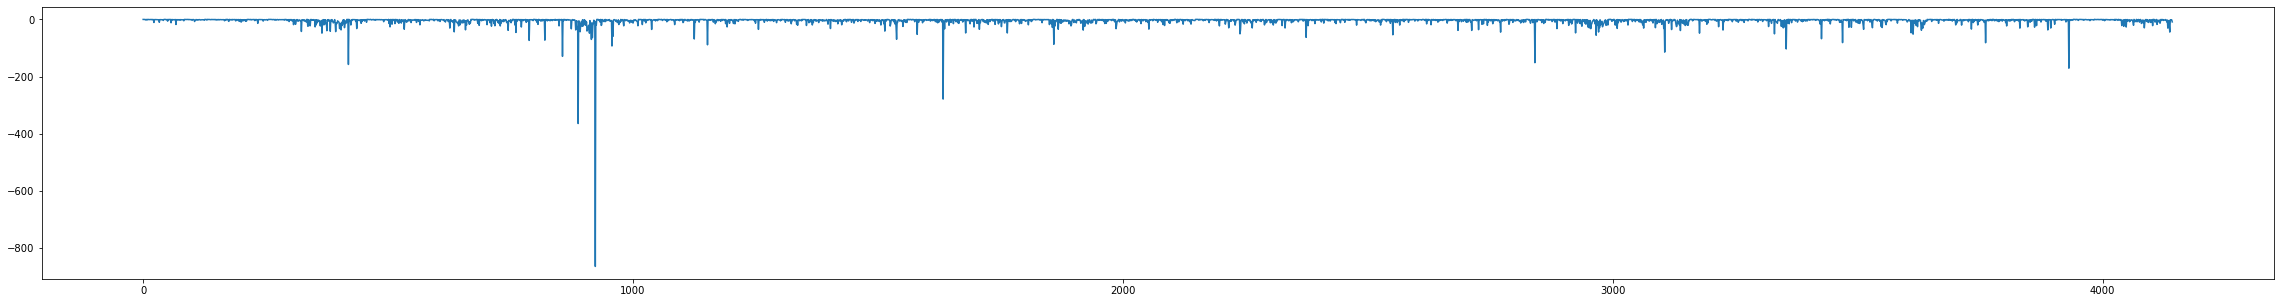

In [67]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(40,5))
plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

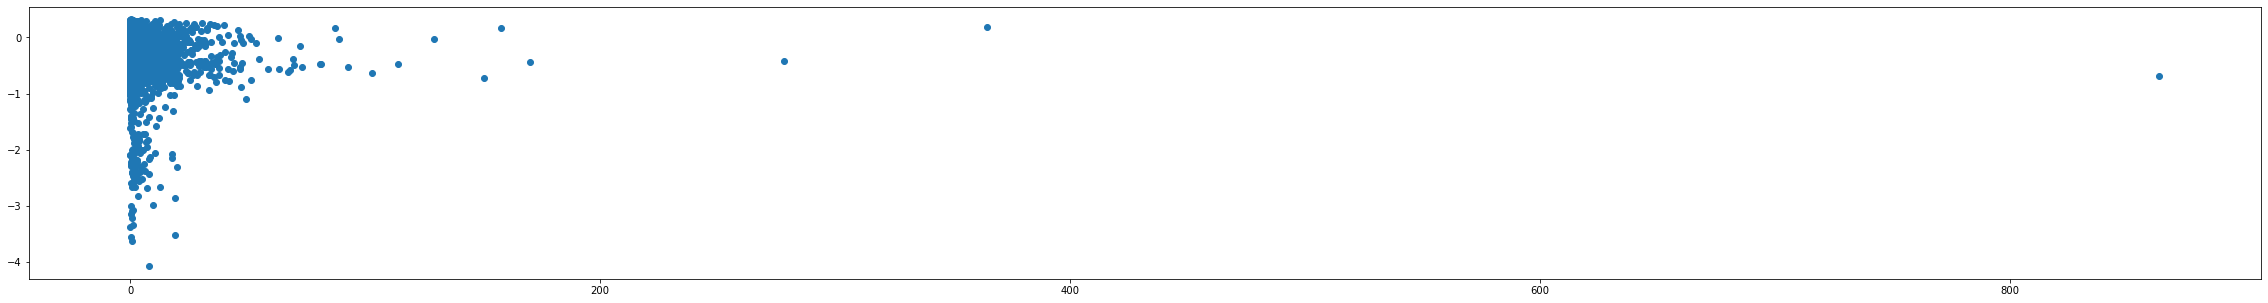

In [68]:
gt = [y.item() for y in y_test.reshape(-1)]
pred = [y.item() for y in pred_y.reshape(-1)]
plt.figure(figsize=(40,5))
plt.scatter(gt, pred)

In [69]:
r = np.corrcoef(gt, pred)
print (r)

import scipy.stats as stat
stat.pearsonr(gt, pred)
res = stat.linregress(gt, pred)
print (res)

[[ 1.         -0.01567202]
 [-0.01567202  1.        ]]
LinregressResult(slope=-0.00039644207018548367, intercept=-0.337836079303233, rvalue=-0.015672024335426613, pvalue=0.3132119682451594, stderr=0.0003930507977896021)


In [70]:
torch.mean(torch.abs((pred_y - y_test)))

tensor(4.7674, device='cuda:0', grad_fn=<MeanBackward0>)

In [71]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f54956a4d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5495621400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54956a49a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5495621ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5495621e20>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

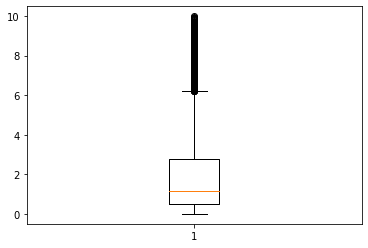

In [72]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


[Text(1, 0, 'BEFORE')]

<Figure size 72x7200 with 0 Axes>

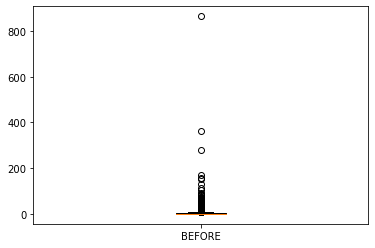

In [73]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [74]:
new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
(new_diff_list).mean()

2.7382073192559164

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5495661af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f549566e220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5495661790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f549566e8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f549566ec40>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

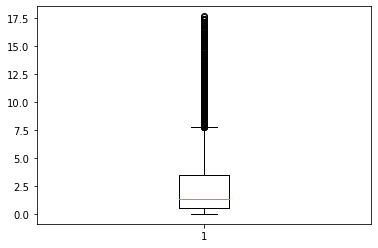

In [75]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot(new_diff_list)

In [76]:
diff_list = np.sort(diff_list)

In [77]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [78]:
q3

4.231547109782696

In [79]:
iqr = q3 - q1

In [80]:
outlier = 1.5*iqr

In [81]:
outlier

5.447239335626364

In [82]:
outlier

5.447239335626364

In [83]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

3644

In [84]:
r.mean()

1.9870720124160144

In [85]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

499

<ipython-input-86-51b7d7383511>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f54955beb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54956820a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f54955be730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54bc097ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54bc090700>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

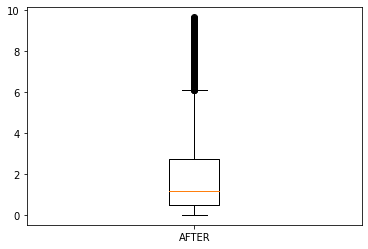

In [86]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [53]:
diff_list_L2 = np.array([np.sqrt(np.power(x.item() - y.item(), 2)) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])

In [70]:
diff_list_L2.mean()

5.806702988741026

In [75]:
diff_list_L1 = np.array([np.abs(np.abs(x.item()) - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])

In [76]:
diff_list_L1.mean()

5.806702988741026

In [74]:
(diff_list_L1 - diff_list_L2).sum()

0.0

# for bar plot

In [256]:
outlier_l1_after = 1.98#np.round(r.mean(), 2)

In [257]:
outlier_l1_before = 4.76#np.round(diff_list.mean(), 2)

In [258]:
outlier_l2_after = np.round(r.mean(), 2)

In [259]:
outlier_l2_before = np.round(diff_list.mean(), 2)

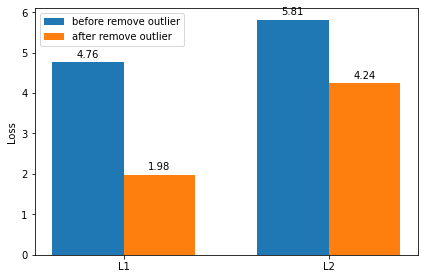

In [264]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [136]:
torch.save(deepmodel2.state_dict(), path+"mv_last_L1.pth")

In [24]:
### FIN

In [25]:
torch.save(deepmodel.state_dict(), path+"mv_last.pth")

In [26]:
##REAL FIN

In [77]:
abs_pred_y = torch.abs(pred_y)

In [78]:
torch.mean(torch.sqrt((abs_pred_y - y_test) ** 2))

tensor(5.8067, device='cuda:0', grad_fn=<MeanBackward0>)

In [55]:
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [56]:
!pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=b3e5664890071da03172721bf52ff133aff5f75bb935cbed79257a1ef2335310
  Stored in directory: /home/jihoon/.cache/pip/wheels/21/c4/af/3efa088be2f95b4953ed4bc8e39a4a95a82d19a7134a4c7a1b
Successfully built torchviz


In [114]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])
        


115


/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


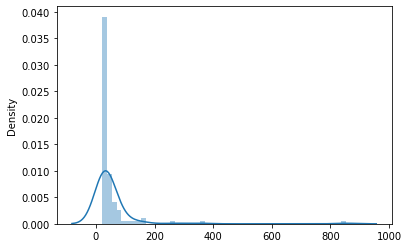

In [115]:
print(cnt)
sns.distplot(tot)

In [116]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
print(len(res))
last = []
for i in range(len(res)):
    if not res[i] > 20:
        last.append(res[i])
        


4143


In [117]:
len(last)

4028

In [118]:
np.mean(last)

4.502831545600565

In [78]:
!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 285 kB 2.2 MB/s eta 0:00:01


/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


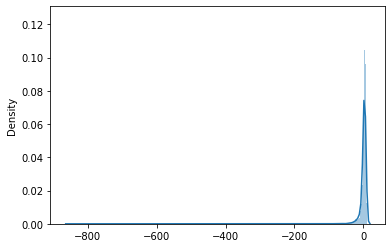

In [84]:
sns.distplot(res, bins=1000)

In [85]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [87]:
res1 = np.array(res)
res1 = (res1 - res1.mean()) / res1.std()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


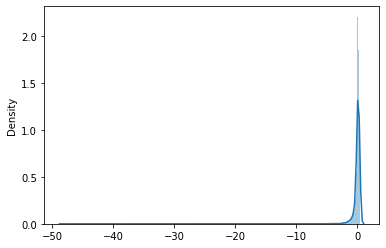

In [90]:
sns.distplot(res1, bins=1000)

In [29]:
df = pd.read_csv('test.csv')

# idx = df[df['TARIFF_AVG'].isnull()].index
# df = df.drop(idx)
# idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
# df = df.drop(idx)
df['TARIFF_AVG'] = df['TARIFF_AVG'].fillna(0.0)
df['TRADE_HSCD_COUNTRYCD'] = df['TRADE_HSCD_COUNTRYCD'].fillna(0.0)


hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = x+1
      break
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = x+1
      break

df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100

df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
df['gdp_percent'] = df['gdp_percent'] / 100
df['KMDIST'] = df['KMDIST']/10000

# arr = df['TRADE_HSCD_COUNTRYCD']

df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM', 'SNDIST', 'PA_NUS_FCRF'])
df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD','TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])
df['KR_TRADE_HSCD_COUNTRYCD'] = 0.0
df.head()

/home/jihoon/anaconda3/envs/iqn_torch/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,KR_TRADE_HSCD_COUNTRYCD
0,1,1,0.270,0.462269,0.995401,0.016089,0.030533,1.030812,0.0
1,1,2,0.012,0.807601,0.832965,0.200713,2.170310,1.078010,0.0
2,1,3,0.028,0.787069,0.828903,0.267390,2.248410,1.090732,0.0
3,1,4,0.028,0.721815,0.872211,0.166672,3.459023,1.081632,0.0
4,1,5,0.171,0.558015,1.836451,0.022029,0.183575,0.914026,0.0


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1015)
device = torch.device("cuda")

x_test = torch.FloatTensor(df.iloc[:,:-1].values).to(device)


deepmodel = DeepModel(8, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"mv_last.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=8, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
percent = (deepmodel(x_test) / 100).reshape(-1)

res = []
for i in range(len(percent)):
    res['KR_TRADE_HSCD_COUNTRYCD'].iloc[i] = (percent[i].item() * res['TRADE_HSCD_COUNTRYCD'].iloc[i])

In [ ]:
res = pd.read_csv('test.csv')


In [47]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,0,12,30.0,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,0,36,0.0,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
2,0,40,0.0,78.856460,82.890293,0.272237,2.326404,105.477932,0.074098
3,0,56,0.0,72.409200,87.221143,0.173844,3.626739,105.666541,0.024586
4,0,76,18.0,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121


In [46]:
df['KMDIST'].min()

9.55651062

In [41]:
y_test.max()

tensor(863.6414, device='cuda:0')

In [35]:
y_test.reshape(-1,1)

tensor([[0.1905],
        [0.0487],
        [0.0264],
        ...,
        [0.4124],
        [0.2739],
        [6.8481]], device='cuda:0')

In [40]:
pred_y.max()

tensor(47.1870, device='cuda:0', grad_fn=<MaxBackward1>)

In [ ]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-7)
n_epochs = 6000

for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
x_test.shape

In [ ]:
y_test.reshape(-1,1)

In [ ]:
pred_y

In [ ]:
df.iloc[tr+te:tr+te + 10]

In [ ]:
df['KMDIST']/100

In [ ]:
pred_y.min()

In [ ]:
x_test[:10]

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
x_train

In [ ]:
class Test(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(Test, self).__init__()
    self.bn = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, out_channel)
  def forward(self, x):
    x = x.to(device)
    return self.bn(x)

  
m = Test(9,1).to(device)
m(x_train)

In [ ]:
df[df['percent'] == df['percent'].min()]

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
torch.mean((pred_y - y_test) ** 2)

In [ ]:
df.head()

In [ ]:
model(new_var)

In [ ]:
import torch

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values)

max(y_train)
# y_train = torch.reshape(y_train, (-1,1))


In [ ]:
W = torch.zeros((9,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr=1e-5)

epochs = 1000
for epoch in range(epochs):
  hypothesis = (x_train.matmul(W) + b)
  cost = torch.mean((hypothesis - y_train) ** 2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print("Ep {} cost : {}".format(epoch, cost.item()))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
batch_size = 16
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3

units = 16
output_size = 3358  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim), activation='relu')
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [ ]:
df_perc = df["percent"].copy()
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_back = df.copy()
df = mean_norm(df)
df["percent"] = df_perc
df.head()

In [ ]:
import torch

x_train = np.array(df.iloc[:tr+te,:-1].values)
y_train = np.array(df.iloc[:tr+te,-1].values)
x_test = np.array(df.iloc[tr+te:,:-1].values)
y_test = np.array(df.iloc[tr+te:,-1].values)

max(y_train)

In [ ]:
## Linear Test Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

In [ ]:
x_train.shape

In [ ]:
x_train[0]

In [ ]:
model = nn.Linear(x_train.shape[1], 1)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
epochs = 20000

In [ ]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

y_train = y_train.reshape(-1,1)

for epoch in range(epochs+1):
    pred = model(x_train)
    
    cost = F.mse_loss(pred, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch : {}/{}, Cost = {}'.format(epoch, epochs, cost.item()))
        

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
new_var = torch.FloatTensor(df.iloc[2][:-1])
new_var = new_var.reshape(1,-1)
new_var

In [ ]:
pred_y = model(new_var)

In [ ]:
pred_y

In [ ]:
df.iloc[2][:-1]

In [ ]:
torch.FloatTensor(x_test[0]).reshape(1,-1)

In [ ]:
import math

err_sum = 0.0
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    err_val = y_test[i] - pred_y
    err_sum += np.sqrt(math.pow(err_val, 2))


In [ ]:
err_sum / x_test.shape[0]

In [ ]:
test_df = pd.read_csv(path + 'test.csv')
test_df.head()

In [ ]:
columns = ["HSCD","COUNTRYCD","TRADE_COUNTRYCD","TRADE_HSCD","TARIFF_AVG","SNDIST","NY_GDP_MKTP_CD","NY_GDP_MKTP_CD_1Y","SP_POP_TOTL","IC_BUS_EASE_DFRN_DB","KMDIST","TRADE_HSCD_COUNTRYCD","KR_TRADE_HSCD_COUNTRYCD"]
test_df = test_df[columns].copy()

test_df['SNDIST'] = test_df['SNDIST'].fillna(test_df['SNDIST'].mean())
test_df['TARIFF_AVG'] = test_df['TARIFF_AVG'].fillna(test_df['TARIFF_AVG'].mean())


test_df = test_df.drop('SNDIST', axis=1).copy()
test_df = test_df.drop('KMDIST', axis=1).copy()


In [ ]:
test_df.head()

In [ ]:
test_df = mean_norm(test_df)
x_test = np.array(test_df.iloc[:,:-2].values)
x_test[0]

In [ ]:
result = pd.read_csv(path + 'test.csv')
pd.options.display.float_format = '{:.5f}'.format
res = []
for i in range(x_test.shape[0]):
    new_var = torch.FloatTensor(x_test[i]).reshape(1,-1)
    pred_y = model(new_var)
    result["KR_TRADE_HSCD_COUNTRYCD"][i] = (result["TRADE_HSCD_COUNTRYCD"][i] * (float(pred_y)/100))



In [ ]:
result.to_csv(path+"filename.csv", mode='w')

In [ ]:
df.head()